<a href="https://colab.research.google.com/github/shyguuy/lab/blob/main/Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1 ЧАСТЬ**

Всего в датафрейме 4967 записей и 8 столбцов, некоторые столбцы имели пропущенные значения, например, столбец "Примечание" имеел только 308 непустых значений, поэтому оптимальным решением было удалить данный столбец.
После анализа всей выборки, было решено удалить столбцы с датой регистрации, изначальной датой, и номером документа, тк они никак не влияли на модель.

In [2]:
import pandas as pd
import numpy as np

df = pd.read_excel('data.xlsx')
df

№ п/п        doc_number   reg_date                 init_date  \
0         1    WSR/1-838/2019 2019-04-09       208-409\n08.04.2019   
1         2    WSR/1-837/2019 2019-04-09        05-338\n09.04.2019   
2         3    WSR/1-835/2019 2019-04-09   И10-14/3137\n09.04.2019   
3         4    WSR/1-834/2019 2019-04-09    Д2/7121-ИС\n03.04.2019   
4         5    WSR/1-833/2019 2019-04-09  15-20/06-911\n08.04.2019   
...     ...               ...        ...                       ...   
4962   4963  WSR/1.-1749/2017 2017-11-01            11\n20.10.2017   
4963   4964  WSR/1.-1751/2017 2017-11-01    ТС-1164/06\n31.10.2017   
4964   4965  WSR/1.-1748/2017 2017-11-01                ЛО-95/06пр   
4965   4966  WSR/1.-1747/2017 2017-11-01    ЛО-93/06пр\n24.10.2017   
4966   4967               NaN        NaT   НА-29/15077\n18.10.2017   

           target                                             author  \
0     Уразов Р.Н.                     Антонова С.В. (АО «Интерфакс»)   
1     Уразов Р.Н.  Картошкин С.А. (Министерство просвещения Росси...   
2     Уразов Р.Н.   Цивилев С.Е. (Администрация Кемеровской области)   
3     Иванюк Л.А.  Волков Г.А. (Министерство транспорта Российско...   
4     Уразов Р.Н.  Атанов И.В. (Ставропольский государственный аг...   
...           ...                                                ...   
4962  Уразов Р.Н.  Медведев Д.А. (Аппарат Правительства Российско...   
4963  Уразов Р.Н.  Синюгина Т.Ю. (Министерство образования и наук...   
4964  Уразов Р.Н.  Огородова Л.М. (Министерство образования и нау...   
4965  Уразов Р.Н.  Огородова Л.М. (Министерство образования и нау...   
4966  Уразов Р.Н.  Асаул Н.А. (Министерство транспорта Российской...   

                                                   brif note  
0     Вх - О возможности использования сетевого изда...  NaN  
1     Вх - Об участии в совещании по вопросу доработ...  NaN  
2     Вх - О командировании Саликовой К. и Глушко Д....  NaN  
3     Вх - Об участии в Чемпионате мира по профессио...  NaN  
4     Вх - Об участии в церемонии открытия Вузовског...  NaN  
...                                                 ...  ...  
4962  Протокол заседания Президиума Совета при Прези...  NaN  
4963  О проведении 21.11.2017 заседания организацион...  NaN  
4964  Протокол заседания рабочей группы приоритетног...  NaN  
4965  Протокол заседания рабочей группы приоритетног...  NaN  
4966  Участие в Чемпионате WorldSkills Hi-Tech Екате...  NaN  

[4967 rows x 8 columns]

In [58]:
df.info() # Инфо о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4967 entries, 0 to 4966
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   № п/п       4967 non-null   int64         
 1   doc_number  4965 non-null   object        
 2   reg_date    4965 non-null   datetime64[ns]
 3   init_date   4967 non-null   object        
 4   target      4967 non-null   object        
 5   author      4967 non-null   object        
 6   brif        4967 non-null   object        
 7   note        308 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 310.6+ KB


In [59]:
df.describe() # Описание датафрейма

№ п/п
count  4967.000000
mean   2484.000000
std    1433.993724
min       1.000000
25%    1242.500000
50%    2484.000000
75%    3725.500000
max    4967.000000

In [60]:
df.columns # Все колонки

Index(['№ п/п', 'doc_number', 'reg_date', 'init_date', 'target', 'author',
       'brif', 'note'],
      dtype='object')

In [61]:
df.isna().sum() # Количество пустых строк

№ п/п            0
doc_number       2
reg_date         2
init_date        0
target           0
author           0
brif             0
note          4659
dtype: int64

In [62]:
df

№ п/п        doc_number   reg_date                 init_date  \
0         1    WSR/1-838/2019 2019-04-09       208-409\n08.04.2019   
1         2    WSR/1-837/2019 2019-04-09        05-338\n09.04.2019   
2         3    WSR/1-835/2019 2019-04-09   И10-14/3137\n09.04.2019   
3         4    WSR/1-834/2019 2019-04-09    Д2/7121-ИС\n03.04.2019   
4         5    WSR/1-833/2019 2019-04-09  15-20/06-911\n08.04.2019   
...     ...               ...        ...                       ...   
4962   4963  WSR/1.-1749/2017 2017-11-01            11\n20.10.2017   
4963   4964  WSR/1.-1751/2017 2017-11-01    ТС-1164/06\n31.10.2017   
4964   4965  WSR/1.-1748/2017 2017-11-01                ЛО-95/06пр   
4965   4966  WSR/1.-1747/2017 2017-11-01    ЛО-93/06пр\n24.10.2017   
4966   4967               NaN        NaT   НА-29/15077\n18.10.2017   

           target                                             author  \
0     Уразов Р.Н.                     Антонова С.В. (АО «Интерфакс»)   
1     Уразов Р.Н.  Картошкин С.А. (Министерство просвещения Росси...   
2     Уразов Р.Н.   Цивилев С.Е. (Администрация Кемеровской области)   
3     Иванюк Л.А.  Волков Г.А. (Министерство транспорта Российско...   
4     Уразов Р.Н.  Атанов И.В. (Ставропольский государственный аг...   
...           ...                                                ...   
4962  Уразов Р.Н.  Медведев Д.А. (Аппарат Правительства Российско...   
4963  Уразов Р.Н.  Синюгина Т.Ю. (Министерство образования и наук...   
4964  Уразов Р.Н.  Огородова Л.М. (Министерство образования и нау...   
4965  Уразов Р.Н.  Огородова Л.М. (Министерство образования и нау...   
4966  Уразов Р.Н.  Асаул Н.А. (Министерство транспорта Российской...   

                                                   brif note  
0     Вх - О возможности использования сетевого изда...  NaN  
1     Вх - Об участии в совещании по вопросу доработ...  NaN  
2     Вх - О командировании Саликовой К. и Глушко Д....  NaN  
3     Вх - Об участии в Чемпионате мира по профессио...  NaN  
4     Вх - Об участии в церемонии открытия Вузовског...  NaN  
...                                                 ...  ...  
4962  Протокол заседания Президиума Совета при Прези...  NaN  
4963  О проведении 21.11.2017 заседания организацион...  NaN  
4964  Протокол заседания рабочей группы приоритетног...  NaN  
4965  Протокол заседания рабочей группы приоритетног...  NaN  
4966  Участие в Чемпионате WorldSkills Hi-Tech Екате...  NaN  

[4967 rows x 8 columns]

In [63]:
df.drop(["reg_date","init_date"], axis = 1, inplace= True) # Данные о датах не влияют на модель

In [ ]:
df

№ п/п        doc_number       target  \
0         1    WSR/1-838/2019  Уразов Р.Н.   
1         2    WSR/1-837/2019  Уразов Р.Н.   
2         3    WSR/1-835/2019  Уразов Р.Н.   
3         4    WSR/1-834/2019  Иванюк Л.А.   
4         5    WSR/1-833/2019  Уразов Р.Н.   
...     ...               ...          ...   
4962   4963  WSR/1.-1749/2017  Уразов Р.Н.   
4963   4964  WSR/1.-1751/2017  Уразов Р.Н.   
4964   4965  WSR/1.-1748/2017  Уразов Р.Н.   
4965   4966  WSR/1.-1747/2017  Уразов Р.Н.   
4966   4967               NaN  Уразов Р.Н.   

                                                 author  \
0                        Антонова С.В. (АО «Интерфакс»)   
1     Картошкин С.А. (Министерство просвещения Росси...   
2      Цивилев С.Е. (Администрация Кемеровской области)   
3     Волков Г.А. (Министерство транспорта Российско...   
4     Атанов И.В. (Ставропольский государственный аг...   
...                                                 ...   
4962  Медведев Д.А. (Аппарат Правительства Российско...   
4963  Синюгина Т.Ю. (Министерство образования и наук...   
4964  Огородова Л.М. (Министерство образования и нау...   
4965  Огородова Л.М. (Министерство образования и нау...   
4966  Асаул Н.А. (Министерство транспорта Российской...   

                                                   brif  
0     Вх - О возможности использования сетевого изда...  
1     Вх - Об участии в совещании по вопросу доработ...  
2     Вх - О командировании Саликовой К. и Глушко Д....  
3     Вх - Об участии в Чемпионате мира по профессио...  
4     Вх - Об участии в церемонии открытия Вузовског...  
...                                                 ...  
4962  Протокол заседания Президиума Совета при Прези...  
4963  О проведении 21.11.2017 заседания организацион...  
4964  Протокол заседания рабочей группы приоритетног...  
4965  Протокол заседания рабочей группы приоритетног...  
4966  Участие в Чемпионате WorldSkills Hi-Tech Екате...  

[4967 rows x 5 columns]

In [64]:
df.drop("note", axis = 1, inplace= True) # В столбце с примечаниями 4659 пустых строк

In [65]:
df

№ п/п        doc_number       target  \
0         1    WSR/1-838/2019  Уразов Р.Н.   
1         2    WSR/1-837/2019  Уразов Р.Н.   
2         3    WSR/1-835/2019  Уразов Р.Н.   
3         4    WSR/1-834/2019  Иванюк Л.А.   
4         5    WSR/1-833/2019  Уразов Р.Н.   
...     ...               ...          ...   
4962   4963  WSR/1.-1749/2017  Уразов Р.Н.   
4963   4964  WSR/1.-1751/2017  Уразов Р.Н.   
4964   4965  WSR/1.-1748/2017  Уразов Р.Н.   
4965   4966  WSR/1.-1747/2017  Уразов Р.Н.   
4966   4967               NaN  Уразов Р.Н.   

                                                 author  \
0                        Антонова С.В. (АО «Интерфакс»)   
1     Картошкин С.А. (Министерство просвещения Росси...   
2      Цивилев С.Е. (Администрация Кемеровской области)   
3     Волков Г.А. (Министерство транспорта Российско...   
4     Атанов И.В. (Ставропольский государственный аг...   
...                                                 ...   
4962  Медведев Д.А. (Аппарат Правительства Российско...   
4963  Синюгина Т.Ю. (Министерство образования и наук...   
4964  Огородова Л.М. (Министерство образования и нау...   
4965  Огородова Л.М. (Министерство образования и нау...   
4966  Асаул Н.А. (Министерство транспорта Российской...   

                                                   brif  
0     Вх - О возможности использования сетевого изда...  
1     Вх - Об участии в совещании по вопросу доработ...  
2     Вх - О командировании Саликовой К. и Глушко Д....  
3     Вх - Об участии в Чемпионате мира по профессио...  
4     Вх - Об участии в церемонии открытия Вузовског...  
...                                                 ...  
4962  Протокол заседания Президиума Совета при Прези...  
4963  О проведении 21.11.2017 заседания организацион...  
4964  Протокол заседания рабочей группы приоритетног...  
4965  Протокол заседания рабочей группы приоритетног...  
4966  Участие в Чемпионате WorldSkills Hi-Tech Екате...  

[4967 rows x 5 columns]

In [66]:
df.dropna() # Удаляем пустые строки

№ п/п        doc_number       target  \
0         1    WSR/1-838/2019  Уразов Р.Н.   
1         2    WSR/1-837/2019  Уразов Р.Н.   
2         3    WSR/1-835/2019  Уразов Р.Н.   
3         4    WSR/1-834/2019  Иванюк Л.А.   
4         5    WSR/1-833/2019  Уразов Р.Н.   
...     ...               ...          ...   
4961   4962  WSR/1.-1750/2017  Уразов Р.Н.   
4962   4963  WSR/1.-1749/2017  Уразов Р.Н.   
4963   4964  WSR/1.-1751/2017  Уразов Р.Н.   
4964   4965  WSR/1.-1748/2017  Уразов Р.Н.   
4965   4966  WSR/1.-1747/2017  Уразов Р.Н.   

                                                 author  \
0                        Антонова С.В. (АО «Интерфакс»)   
1     Картошкин С.А. (Министерство просвещения Росси...   
2      Цивилев С.Е. (Администрация Кемеровской области)   
3     Волков Г.А. (Министерство транспорта Российско...   
4     Атанов И.В. (Ставропольский государственный аг...   
...                                                 ...   
4961  Черноскутова И.А. (Министерство образования и ...   
4962  Медведев Д.А. (Аппарат Правительства Российско...   
4963  Синюгина Т.Ю. (Министерство образования и наук...   
4964  Огородова Л.М. (Министерство образования и нау...   
4965  Огородова Л.М. (Министерство образования и нау...   

                                                   brif  
0     Вх - О возможности использования сетевого изда...  
1     Вх - Об участии в совещании по вопросу доработ...  
2     Вх - О командировании Саликовой К. и Глушко Д....  
3     Вх - Об участии в Чемпионате мира по профессио...  
4     Вх - Об участии в церемонии открытия Вузовског...  
...                                                 ...  
4961  О заседании рабочей группы приоритетного проек...  
4962  Протокол заседания Президиума Совета при Прези...  
4963  О проведении 21.11.2017 заседания организацион...  
4964  Протокол заседания рабочей группы приоритетног...  
4965  Протокол заседания рабочей группы приоритетног...  

[4965 rows x 5 columns]

In [67]:
df['company_author']= df['author'].str.extract(r'\((.*?)\)') # Разбиваем поле "Автор" на ФИО автора и компанию
df

№ п/п        doc_number       target  \
0         1    WSR/1-838/2019  Уразов Р.Н.   
1         2    WSR/1-837/2019  Уразов Р.Н.   
2         3    WSR/1-835/2019  Уразов Р.Н.   
3         4    WSR/1-834/2019  Иванюк Л.А.   
4         5    WSR/1-833/2019  Уразов Р.Н.   
...     ...               ...          ...   
4962   4963  WSR/1.-1749/2017  Уразов Р.Н.   
4963   4964  WSR/1.-1751/2017  Уразов Р.Н.   
4964   4965  WSR/1.-1748/2017  Уразов Р.Н.   
4965   4966  WSR/1.-1747/2017  Уразов Р.Н.   
4966   4967               NaN  Уразов Р.Н.   

                                                 author  \
0                        Антонова С.В. (АО «Интерфакс»)   
1     Картошкин С.А. (Министерство просвещения Росси...   
2      Цивилев С.Е. (Администрация Кемеровской области)   
3     Волков Г.А. (Министерство транспорта Российско...   
4     Атанов И.В. (Ставропольский государственный аг...   
...                                                 ...   
4962  Медведев Д.А. (Аппарат Правительства Российско...   
4963  Синюгина Т.Ю. (Министерство образования и наук...   
4964  Огородова Л.М. (Министерство образования и нау...   
4965  Огородова Л.М. (Министерство образования и нау...   
4966  Асаул Н.А. (Министерство транспорта Российской...   

                                                   brif  \
0     Вх - О возможности использования сетевого изда...   
1     Вх - Об участии в совещании по вопросу доработ...   
2     Вх - О командировании Саликовой К. и Глушко Д....   
3     Вх - Об участии в Чемпионате мира по профессио...   
4     Вх - Об участии в церемонии открытия Вузовског...   
...                                                 ...   
4962  Протокол заседания Президиума Совета при Прези...   
4963  О проведении 21.11.2017 заседания организацион...   
4964  Протокол заседания рабочей группы приоритетног...   
4965  Протокол заседания рабочей группы приоритетног...   
4966  Участие в Чемпионате WorldSkills Hi-Tech Екате...   

                                         company_author  
0                                        АО «Интерфакс»  
1         Министерство просвещения Российской Федерации  
2                     Администрация Кемеровской области  
3          Министерство транспорта Российской Федерации  
4     Ставропольский государственный аграрный универ...  
...                                                 ...  
4962         Аппарат Правительства Российской Федерации  
4963  Министерство образования и науки РФ. Заместите...  
4964  Министерство образования и науки Российской Фе...  
4965  Министерство образования и науки Российской Фе...  
4966       Министерство транспорта Российской Федерации  

[4967 rows x 6 columns]

In [68]:
df['name_author'] = df['author'].str.replace(r'\([^)]*\)', '', regex=True)
df

№ п/п        doc_number       target  \
0         1    WSR/1-838/2019  Уразов Р.Н.   
1         2    WSR/1-837/2019  Уразов Р.Н.   
2         3    WSR/1-835/2019  Уразов Р.Н.   
3         4    WSR/1-834/2019  Иванюк Л.А.   
4         5    WSR/1-833/2019  Уразов Р.Н.   
...     ...               ...          ...   
4962   4963  WSR/1.-1749/2017  Уразов Р.Н.   
4963   4964  WSR/1.-1751/2017  Уразов Р.Н.   
4964   4965  WSR/1.-1748/2017  Уразов Р.Н.   
4965   4966  WSR/1.-1747/2017  Уразов Р.Н.   
4966   4967               NaN  Уразов Р.Н.   

                                                 author  \
0                        Антонова С.В. (АО «Интерфакс»)   
1     Картошкин С.А. (Министерство просвещения Росси...   
2      Цивилев С.Е. (Администрация Кемеровской области)   
3     Волков Г.А. (Министерство транспорта Российско...   
4     Атанов И.В. (Ставропольский государственный аг...   
...                                                 ...   
4962  Медведев Д.А. (Аппарат Правительства Российско...   
4963  Синюгина Т.Ю. (Министерство образования и наук...   
4964  Огородова Л.М. (Министерство образования и нау...   
4965  Огородова Л.М. (Министерство образования и нау...   
4966  Асаул Н.А. (Министерство транспорта Российской...   

                                                   brif  \
0     Вх - О возможности использования сетевого изда...   
1     Вх - Об участии в совещании по вопросу доработ...   
2     Вх - О командировании Саликовой К. и Глушко Д....   
3     Вх - Об участии в Чемпионате мира по профессио...   
4     Вх - Об участии в церемонии открытия Вузовског...   
...                                                 ...   
4962  Протокол заседания Президиума Совета при Прези...   
4963  О проведении 21.11.2017 заседания организацион...   
4964  Протокол заседания рабочей группы приоритетног...   
4965  Протокол заседания рабочей группы приоритетног...   
4966  Участие в Чемпионате WorldSkills Hi-Tech Екате...   

                                         company_author      name_author  
0                                        АО «Интерфакс»   Антонова С.В.   
1         Министерство просвещения Российской Федерации  Картошкин С.А.   
2                     Администрация Кемеровской области    Цивилев С.Е.   
3          Министерство транспорта Российской Федерации     Волков Г.А.   
4     Ставропольский государственный аграрный универ...     Атанов И.В.   
...                                                 ...              ...  
4962         Аппарат Правительства Российской Федерации   Медведев Д.А.   
4963  Министерство образования и науки РФ. Заместите...   Синюгина Т.Ю.   
4964  Министерство образования и науки Российской Фе...  Огородова Л.М.   
4965  Министерство образования и науки Российской Фе...  Огородова Л.М.   
4966       Министерство транспорта Российской Федерации      Асаул Н.А.   

[4967 rows x 7 columns]

In [69]:
df.drop("author", axis = 1, inplace= True) # Удаляем изначальный столбец "Автор"
df

№ п/п        doc_number       target  \
0         1    WSR/1-838/2019  Уразов Р.Н.   
1         2    WSR/1-837/2019  Уразов Р.Н.   
2         3    WSR/1-835/2019  Уразов Р.Н.   
3         4    WSR/1-834/2019  Иванюк Л.А.   
4         5    WSR/1-833/2019  Уразов Р.Н.   
...     ...               ...          ...   
4962   4963  WSR/1.-1749/2017  Уразов Р.Н.   
4963   4964  WSR/1.-1751/2017  Уразов Р.Н.   
4964   4965  WSR/1.-1748/2017  Уразов Р.Н.   
4965   4966  WSR/1.-1747/2017  Уразов Р.Н.   
4966   4967               NaN  Уразов Р.Н.   

                                                   brif  \
0     Вх - О возможности использования сетевого изда...   
1     Вх - Об участии в совещании по вопросу доработ...   
2     Вх - О командировании Саликовой К. и Глушко Д....   
3     Вх - Об участии в Чемпионате мира по профессио...   
4     Вх - Об участии в церемонии открытия Вузовског...   
...                                                 ...   
4962  Протокол заседания Президиума Совета при Прези...   
4963  О проведении 21.11.2017 заседания организацион...   
4964  Протокол заседания рабочей группы приоритетног...   
4965  Протокол заседания рабочей группы приоритетног...   
4966  Участие в Чемпионате WorldSkills Hi-Tech Екате...   

                                         company_author      name_author  
0                                        АО «Интерфакс»   Антонова С.В.   
1         Министерство просвещения Российской Федерации  Картошкин С.А.   
2                     Администрация Кемеровской области    Цивилев С.Е.   
3          Министерство транспорта Российской Федерации     Волков Г.А.   
4     Ставропольский государственный аграрный универ...     Атанов И.В.   
...                                                 ...              ...  
4962         Аппарат Правительства Российской Федерации   Медведев Д.А.   
4963  Министерство образования и науки РФ. Заместите...   Синюгина Т.Ю.   
4964  Министерство образования и науки Российской Фе...  Огородова Л.М.   
4965  Министерство образования и науки Российской Фе...  Огородова Л.М.   
4966       Министерство транспорта Российской Федерации      Асаул Н.А.   

[4967 rows x 6 columns]

In [ ]:
#В пункте 1.3 нам необходимо провести кластеризацию, однако из-за ограниченного количества времени, было решено пропустить данный пункт.
#Для кластеризации данных, нам нужно определить признаки, которые могут помочь в распределении документов по кластерам. В нашем случае мы можем рассмотреть следующие признаки:

#1.Отправитель:
#Первые лица министерств.
#Организации, имеющие особый статус отправителя.

#2.Адресат:
#Генеральный директор.
#Сотрудники, ответственные за обработку определенных типов документов.

#3.Содержание письма:
#Ключевые слова или фразы в содержании, которые могут указывать на особые типы документов или их направление.

#4.Контекст:
#Информация из предыдущих писем, которая может подсказать о том, кому следует направить новое письмо.

#После получения данных признаков, мы можем использовать алгоритмы кластеризации, такие как k-means, иерархическая кластеризация или DBSCAN.

#Примерно как:
# Выбираем признаки для кластеризации
# Заполняем пропущенные значения (если есть)
# Приводим данные к числовому виду (если необходимо)
# Кластеризуем данные с использованием любого из методов(например k-means)


In [70]:
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer() # Преобразование текста
count = count.fit_transform(df["brif"])
count = count.toarray()

In [71]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_copy = df.copy()

df_copy['target'] = le.fit_transform(df_copy['target'])
df_copy['target'].unique()

array([143,  48,  71, 132,  57,   2,  18,   5,  73,  45,  76,  80,  92,
       111,  60, 104,  36,  87,  32,  22,  75, 119, 118,  46,  47,  54,
         6,  77,  40,  13,  96,   1, 155, 123,  79,  63,  37,  16, 137,
        20,  50,  74, 110,  23, 129,  72,  43, 135,  38, 131, 127,  90,
       144, 152,  59,  21,  51, 159,  28,  55,  56, 116,  35,  99,   9,
        65,  98, 139,  58,  17,  25,  62,  78,  29,  11,  83, 156,  68,
        49, 125,  97, 160,  19, 134,  84,  15, 114, 141, 138,  24, 136,
        44,  86,  91, 102,  69, 103, 140,  88, 113,  34, 157, 124, 109,
        82, 115,  66,   8,  30,  81,  64, 107, 121, 153, 120, 108,  10,
       146,  12,  70,  39,  94, 122,   7,  33, 128,  89,   0,  93,  14,
         4, 133, 142, 101, 126, 130, 117, 149,  27, 100,  95, 158,   3,
        61,  42,  41, 112, 150, 148, 145,  31,  67, 105,  52,  85, 154,
        26, 147, 151, 106,  53])

In [72]:
df_copy

№ п/п        doc_number  target  \
0         1    WSR/1-838/2019     143   
1         2    WSR/1-837/2019     143   
2         3    WSR/1-835/2019     143   
3         4    WSR/1-834/2019      48   
4         5    WSR/1-833/2019     143   
...     ...               ...     ...   
4962   4963  WSR/1.-1749/2017     143   
4963   4964  WSR/1.-1751/2017     143   
4964   4965  WSR/1.-1748/2017     143   
4965   4966  WSR/1.-1747/2017     143   
4966   4967               NaN     143   

                                                   brif  \
0     Вх - О возможности использования сетевого изда...   
1     Вх - Об участии в совещании по вопросу доработ...   
2     Вх - О командировании Саликовой К. и Глушко Д....   
3     Вх - Об участии в Чемпионате мира по профессио...   
4     Вх - Об участии в церемонии открытия Вузовског...   
...                                                 ...   
4962  Протокол заседания Президиума Совета при Прези...   
4963  О проведении 21.11.2017 заседания организацион...   
4964  Протокол заседания рабочей группы приоритетног...   
4965  Протокол заседания рабочей группы приоритетног...   
4966  Участие в Чемпионате WorldSkills Hi-Tech Екате...   

                                         company_author      name_author  
0                                        АО «Интерфакс»   Антонова С.В.   
1         Министерство просвещения Российской Федерации  Картошкин С.А.   
2                     Администрация Кемеровской области    Цивилев С.Е.   
3          Министерство транспорта Российской Федерации     Волков Г.А.   
4     Ставропольский государственный аграрный универ...     Атанов И.В.   
...                                                 ...              ...  
4962         Аппарат Правительства Российской Федерации   Медведев Д.А.   
4963  Министерство образования и науки РФ. Заместите...   Синюгина Т.Ю.   
4964  Министерство образования и науки Российской Фе...  Огородова Л.М.   
4965  Министерство образования и науки Российской Фе...  Огородова Л.М.   
4966       Министерство транспорта Российской Федерации      Асаул Н.А.   

[4967 rows x 6 columns]

In [73]:
from sklearn.manifold import TSNE

couX_embedded = TSNE(n_components=2).fit_transform(count)

Визуализация данных на 2-мерном графике.

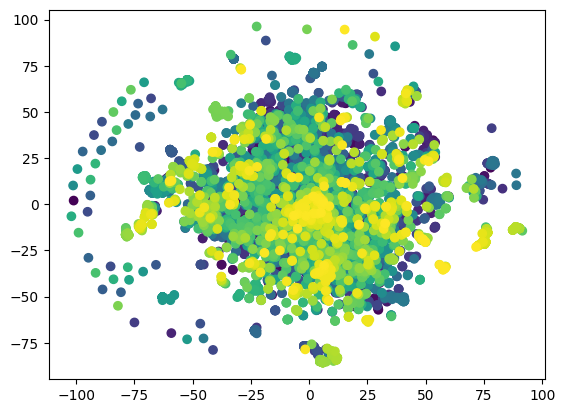

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(couX_embedded[:, 0], couX_embedded[:, 1],  c=[i for i, _ in enumerate(df.target)])
plt.show()

Данная визуализация отображает кластер без учета стоп-слов.
Вывод: текстовые документы, адресованные разным получателям, имеют схожее содержание и/или структуру.
Это указывает необходимость дальнейшего анализа содержания сообщений для выявления паттернов или взаимосвязей, которые могли быть упущены при первичном анализе.

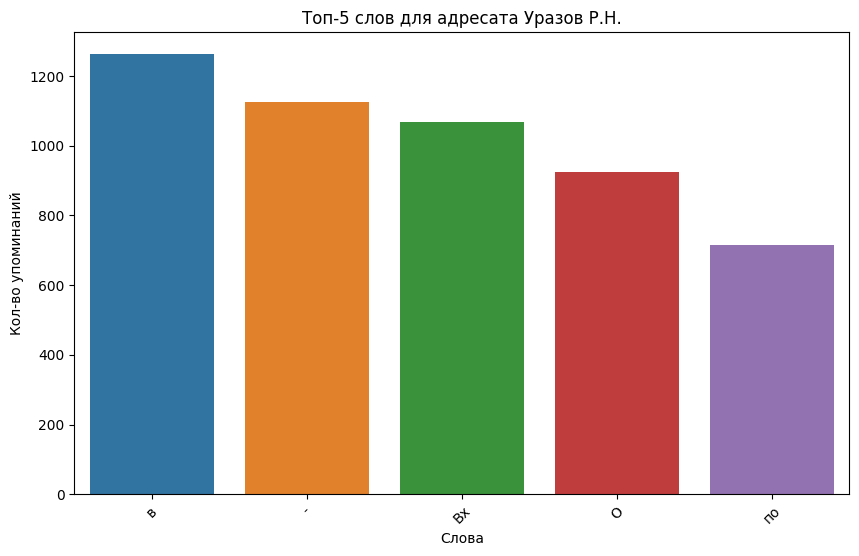

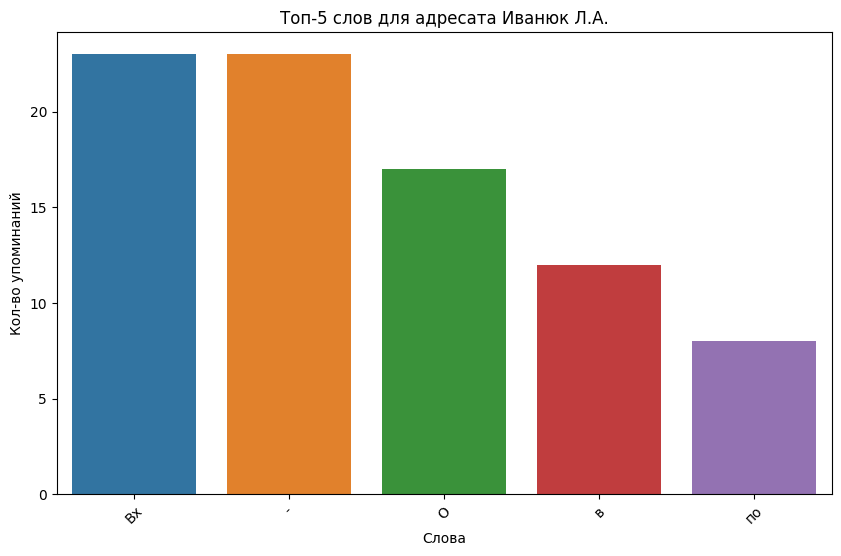

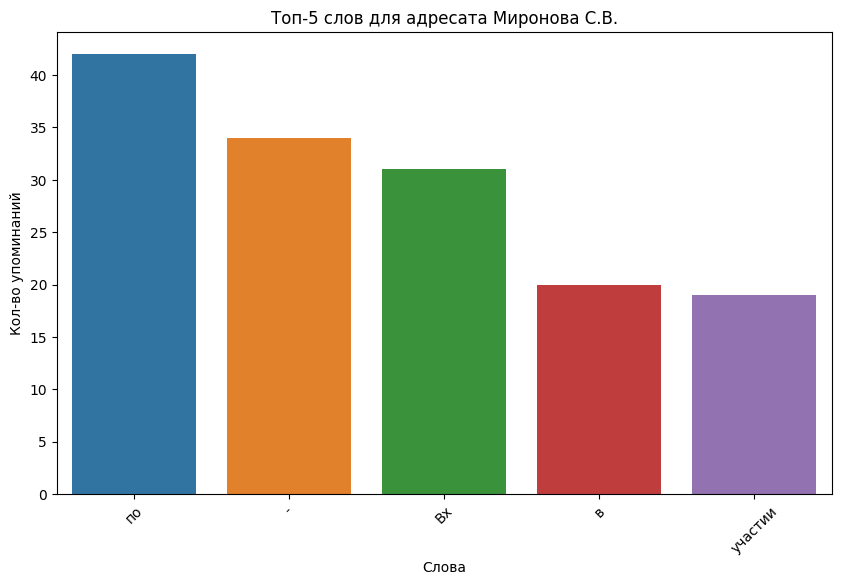

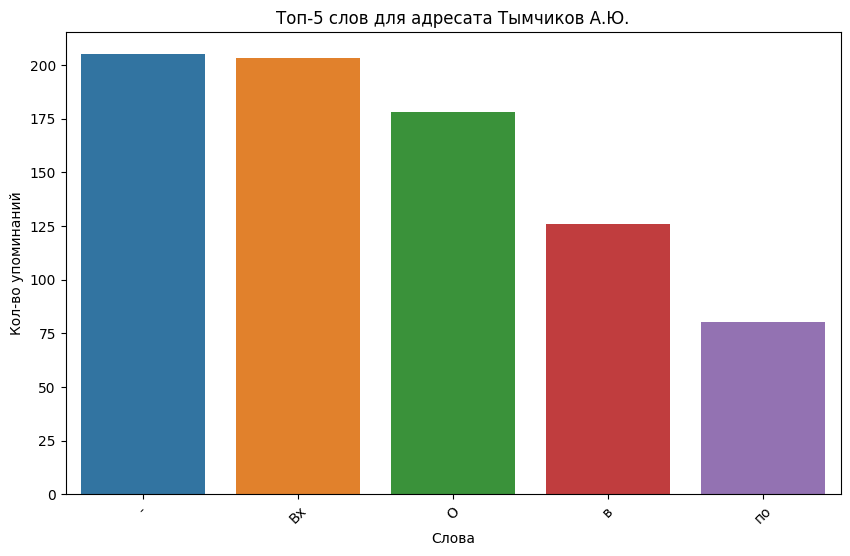

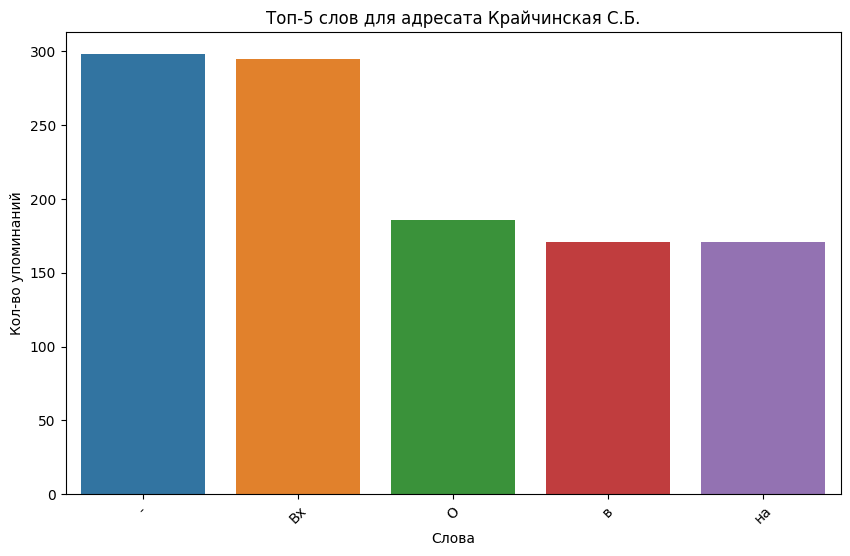

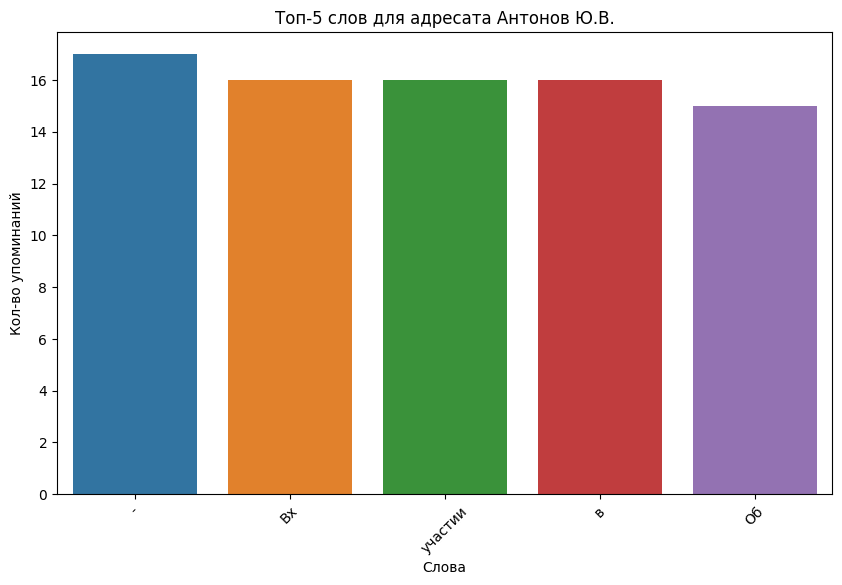

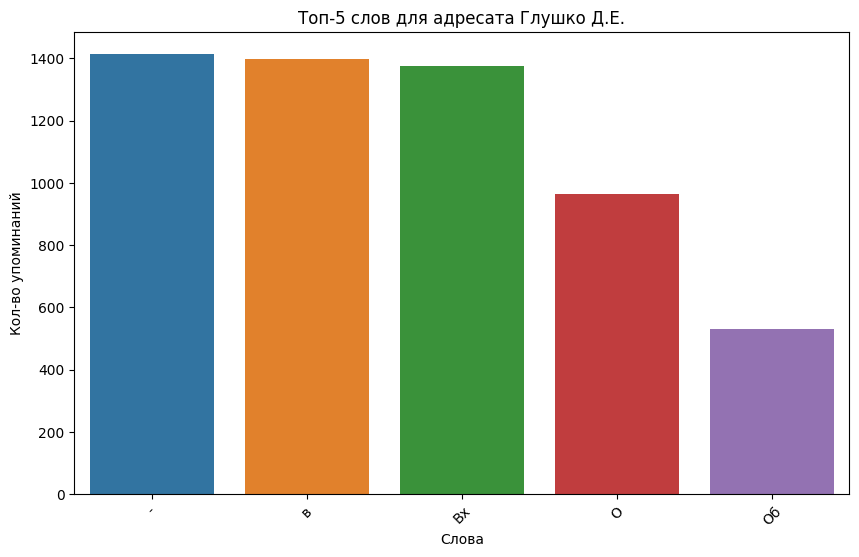

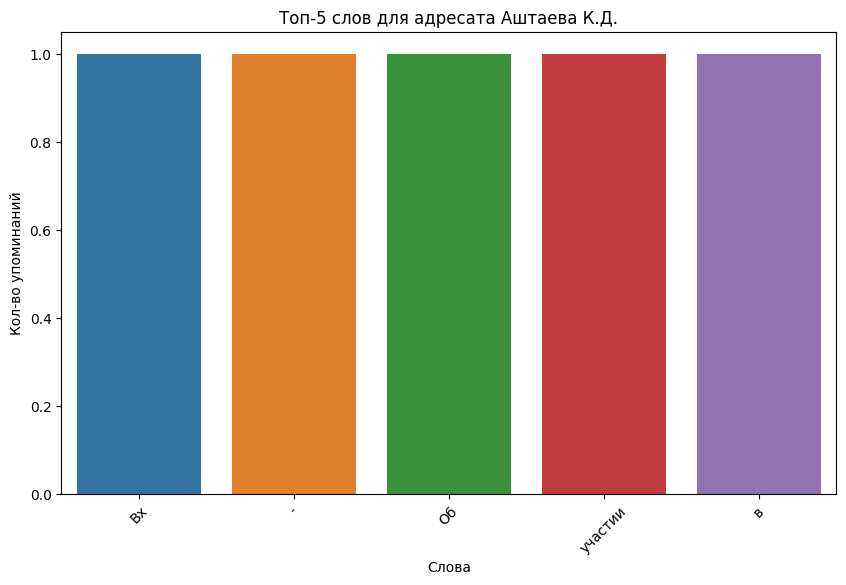

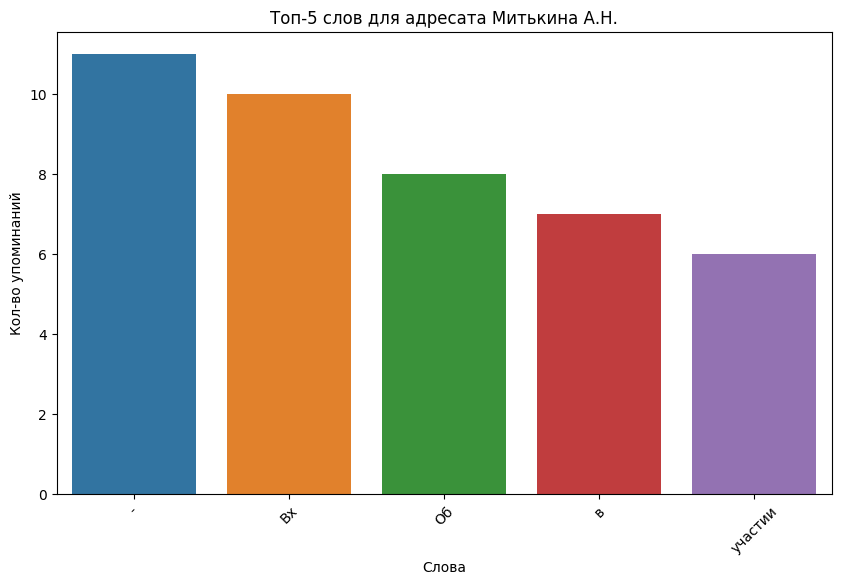

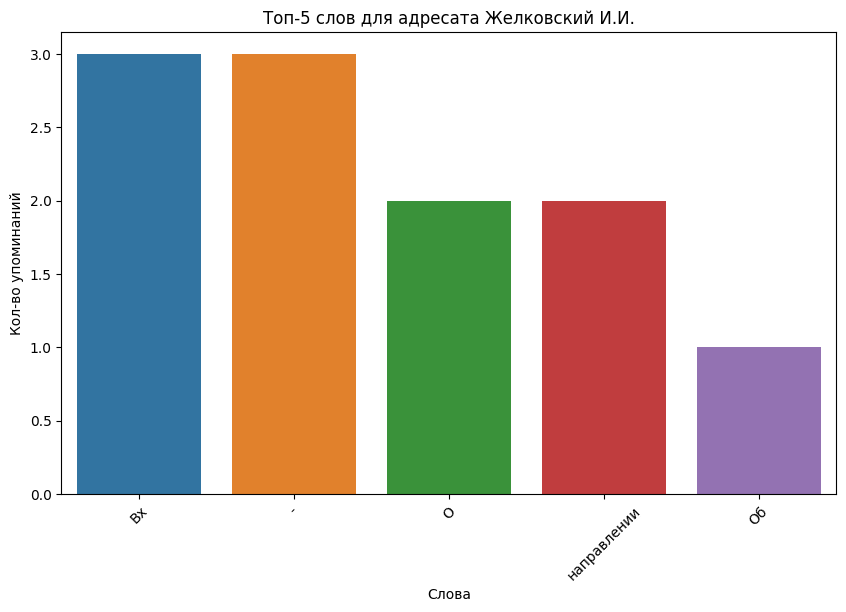

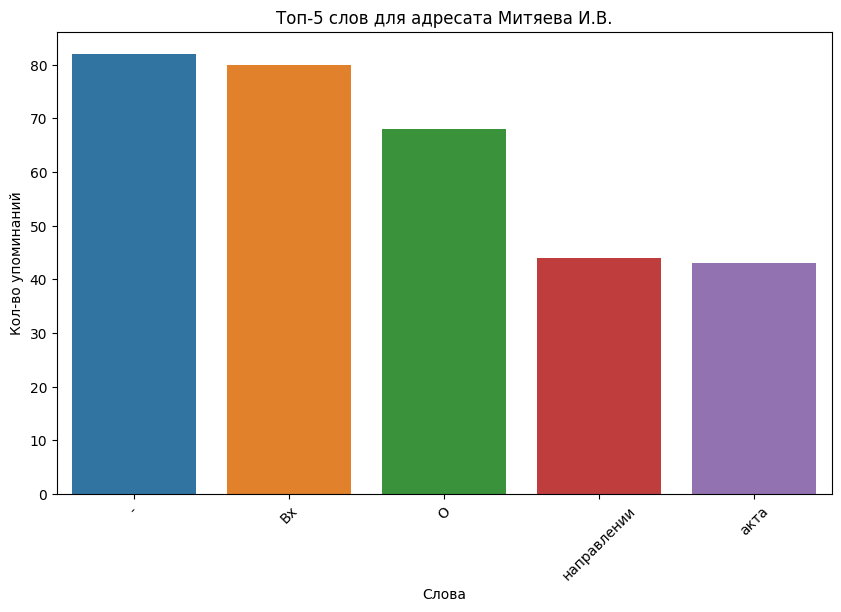

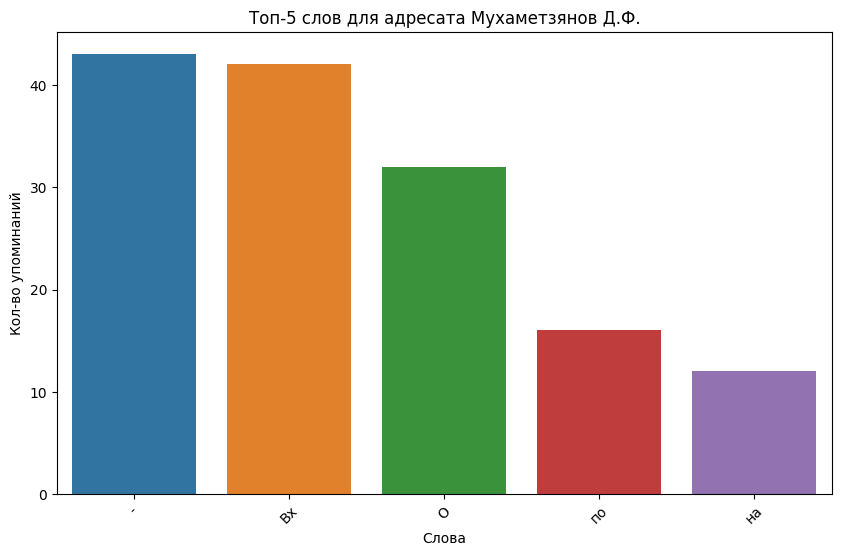

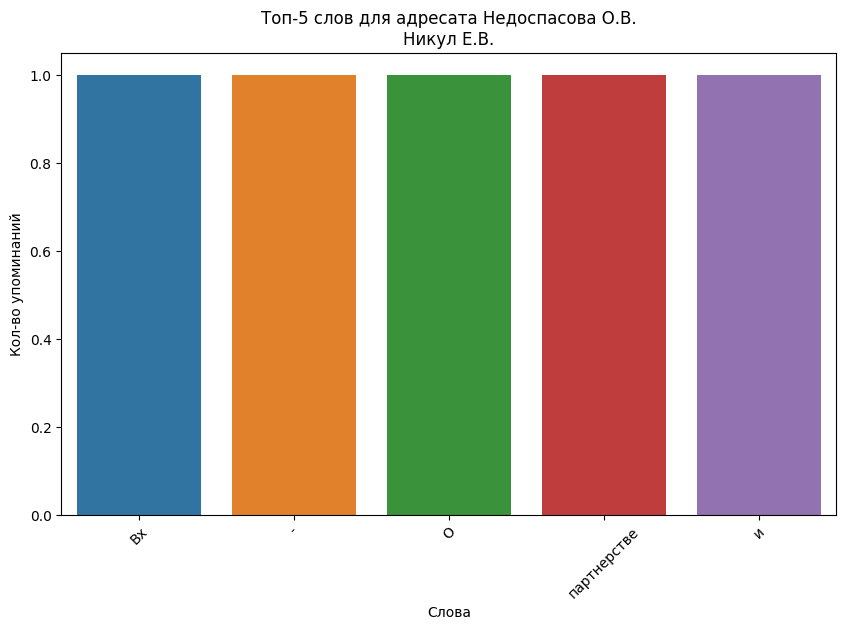

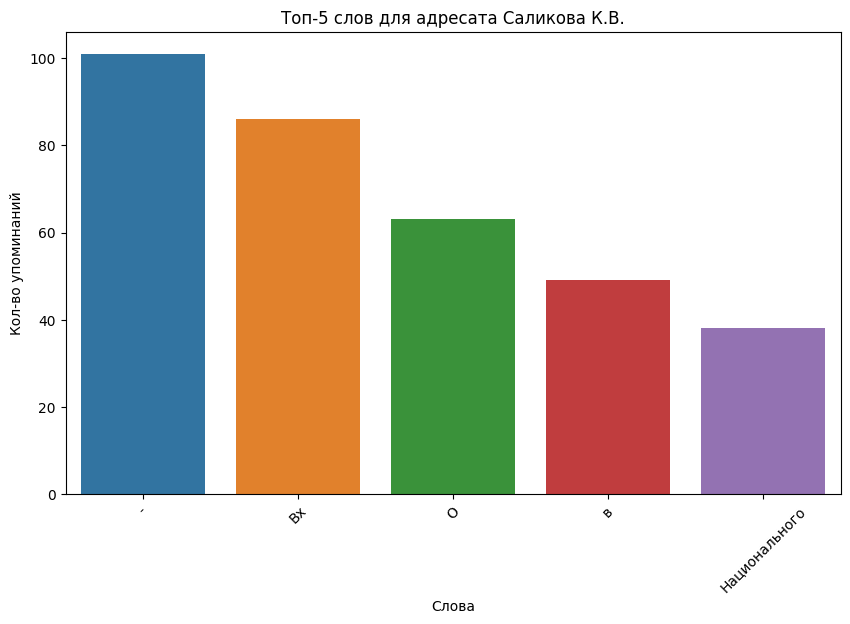

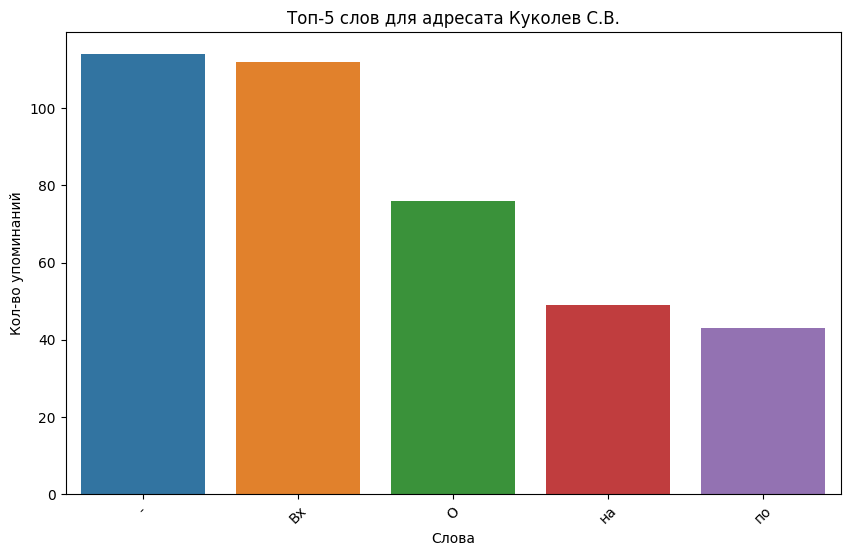

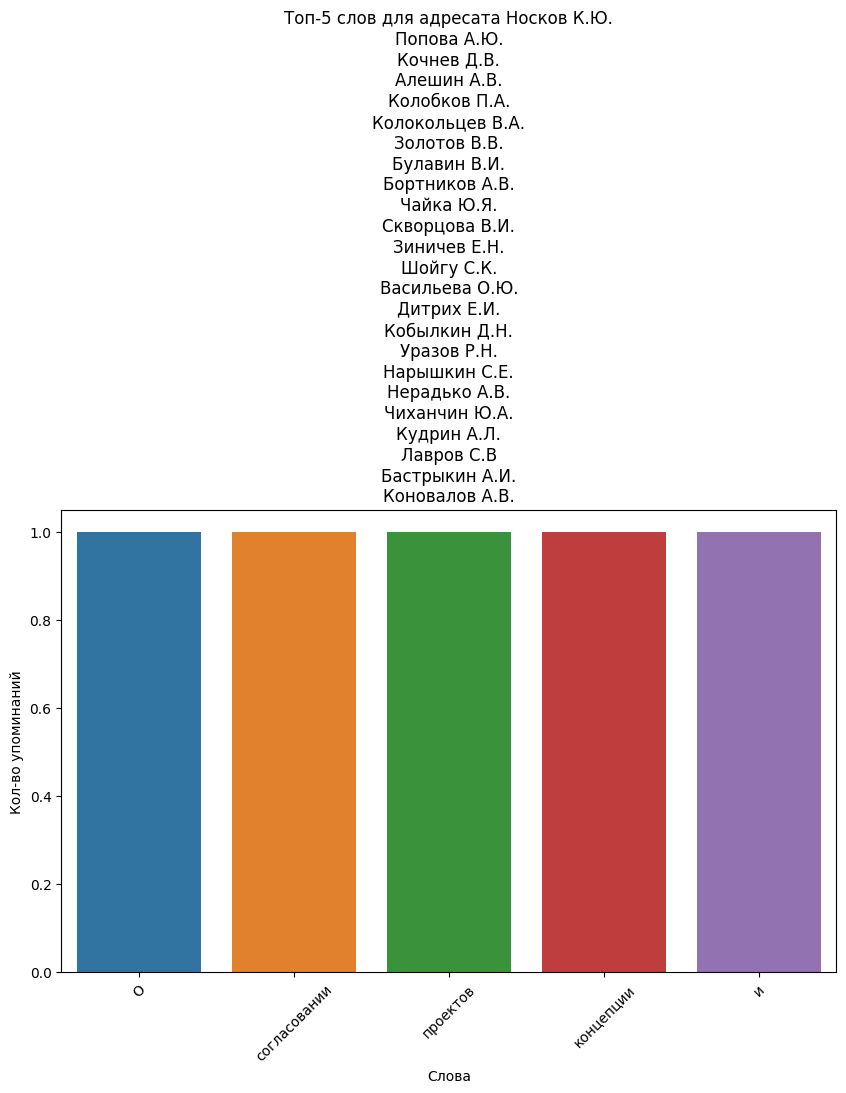

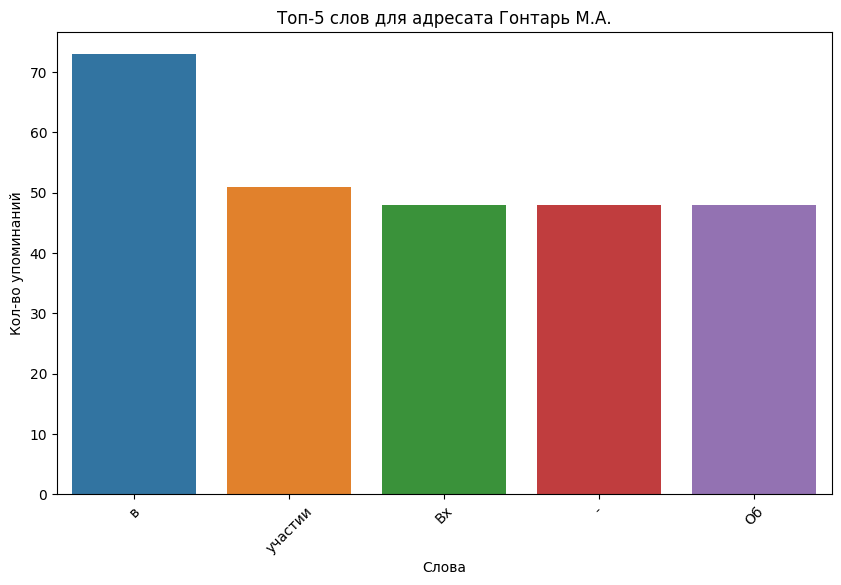

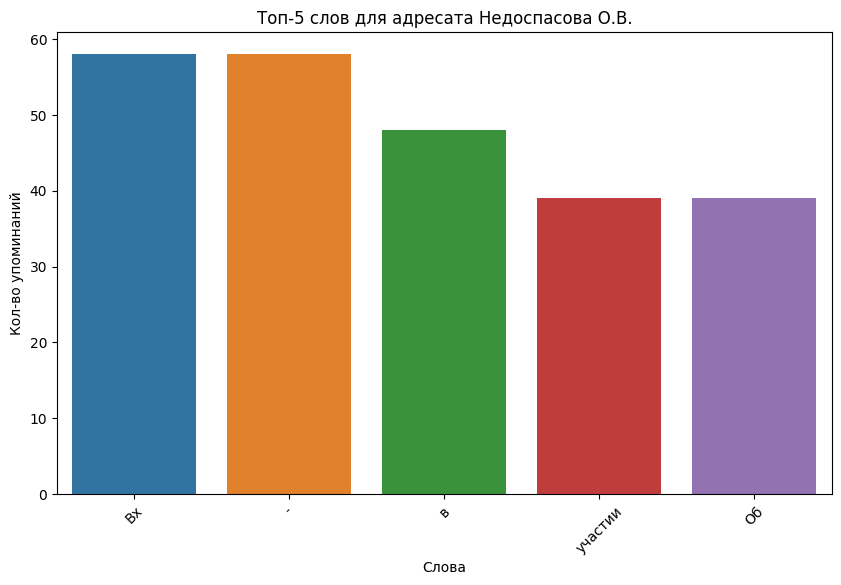

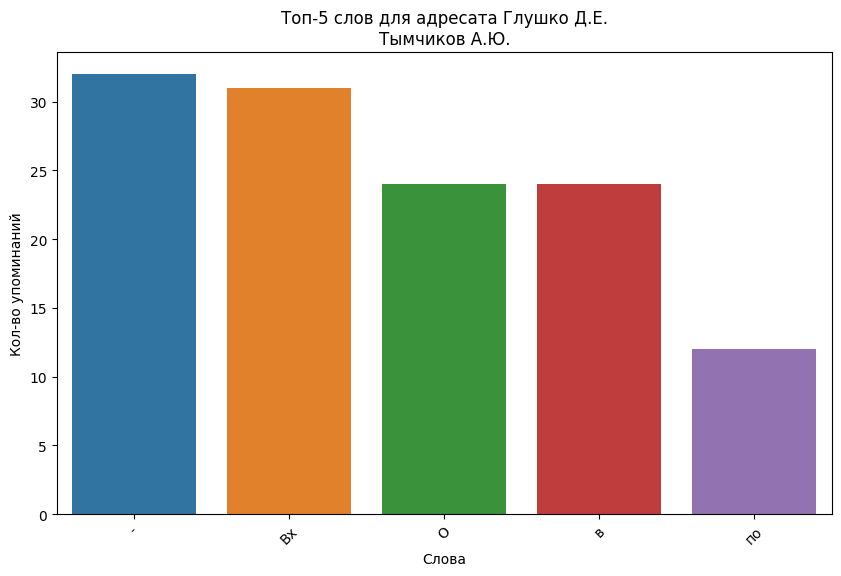

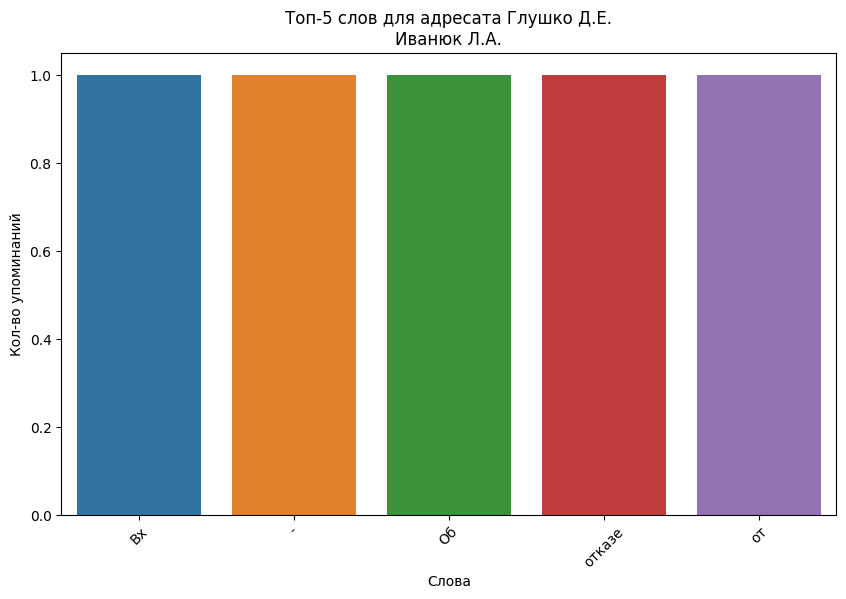

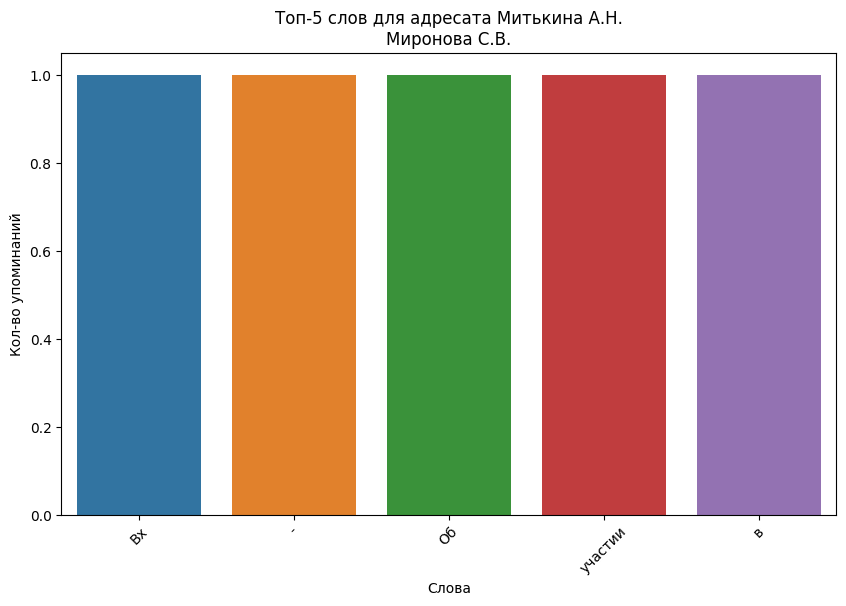

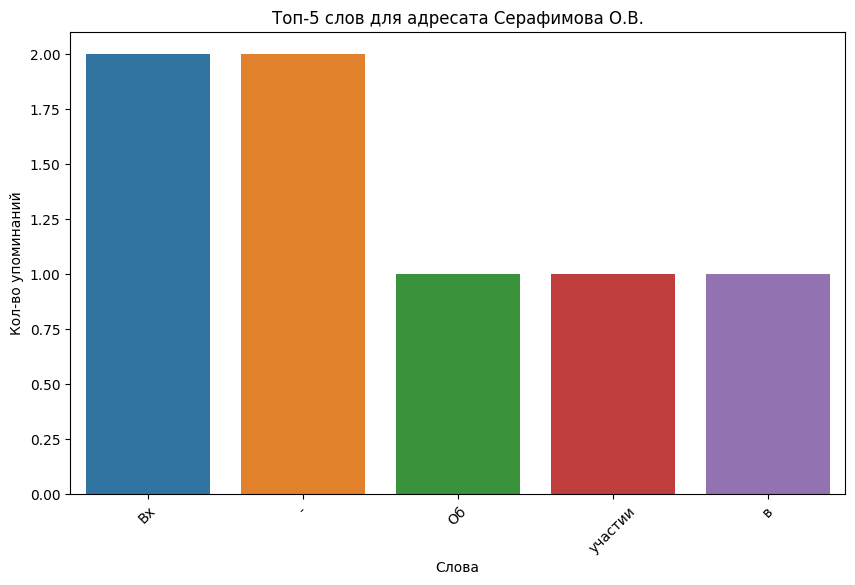

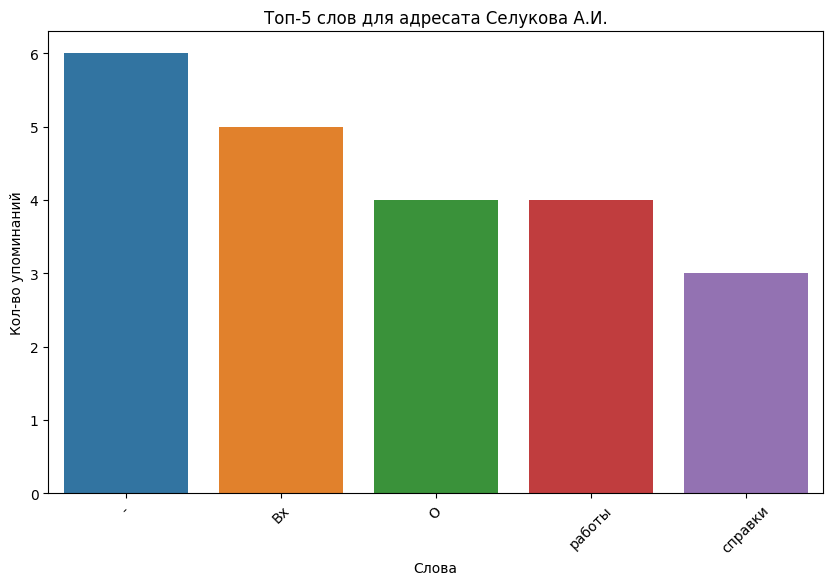

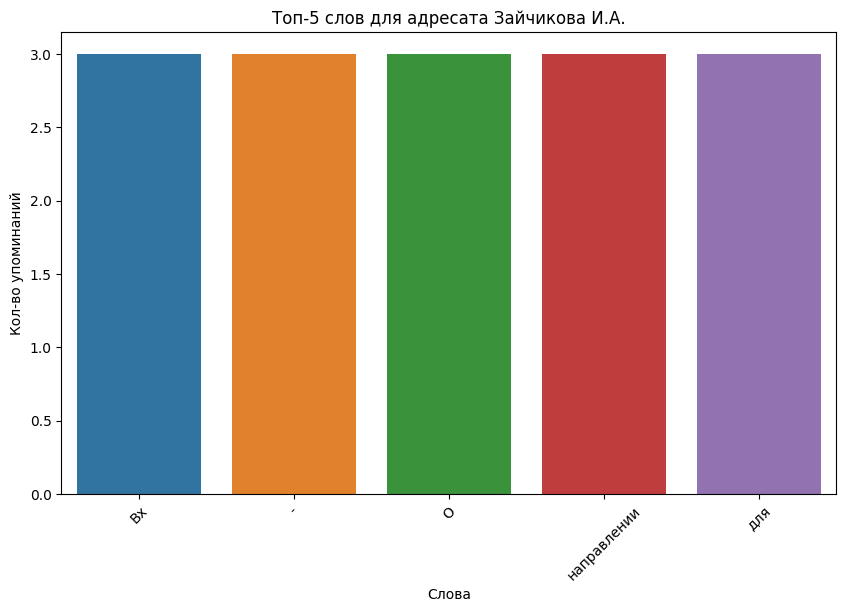

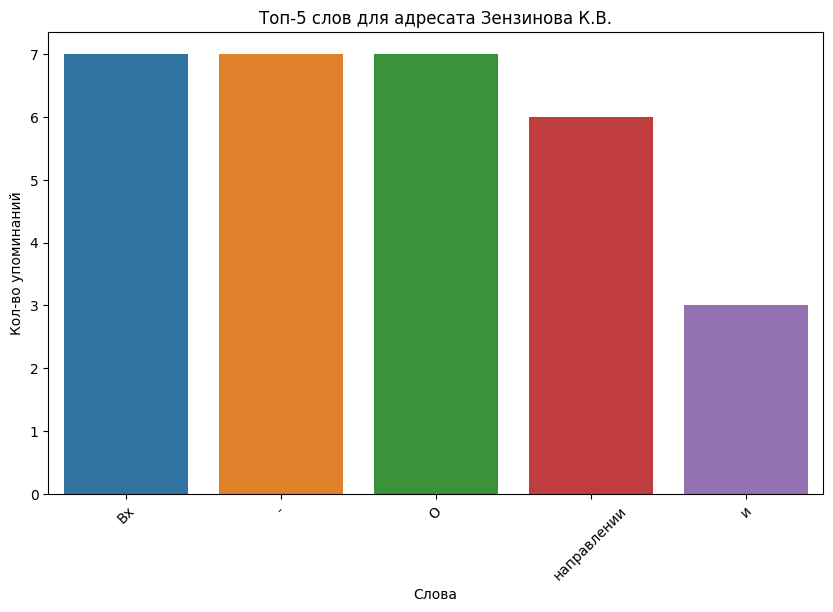

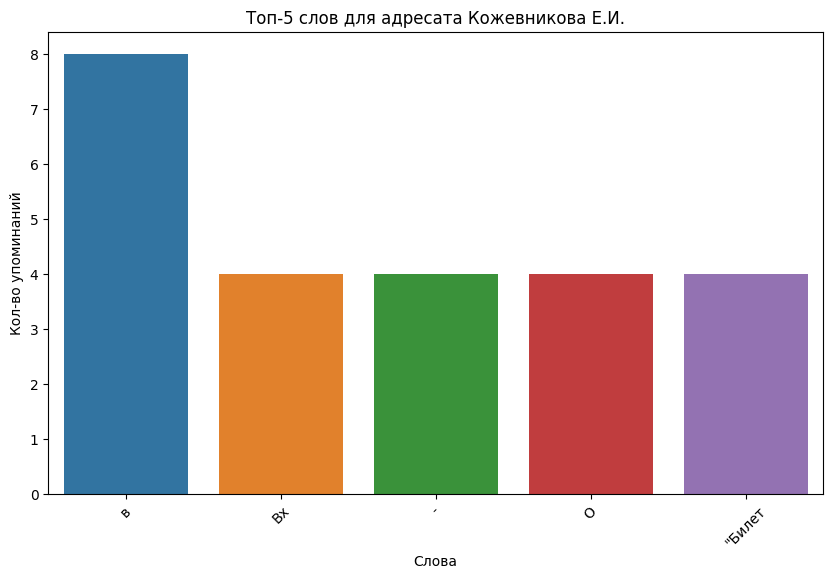

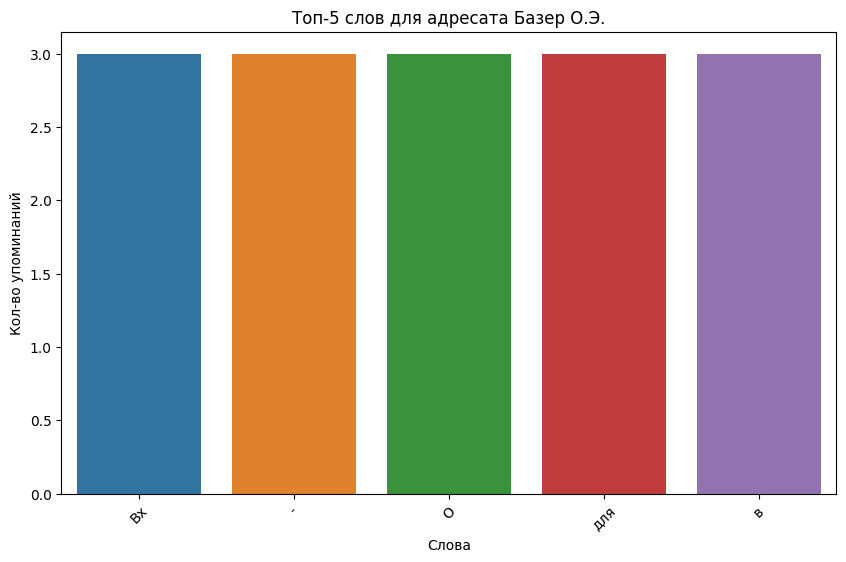

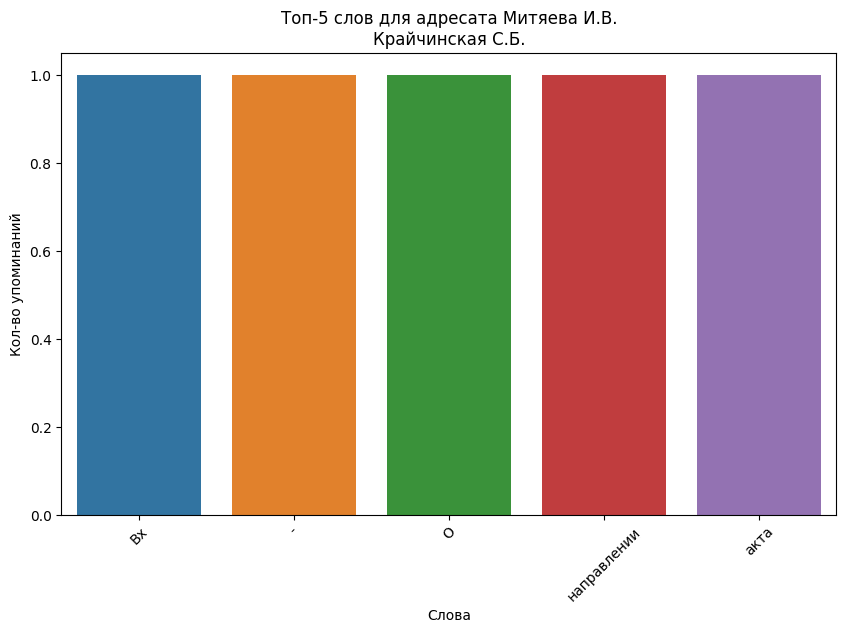

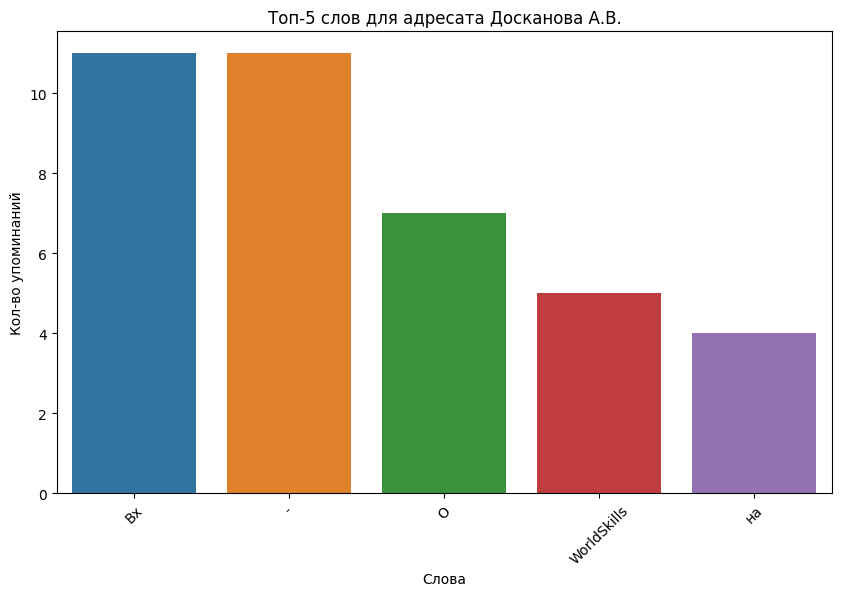

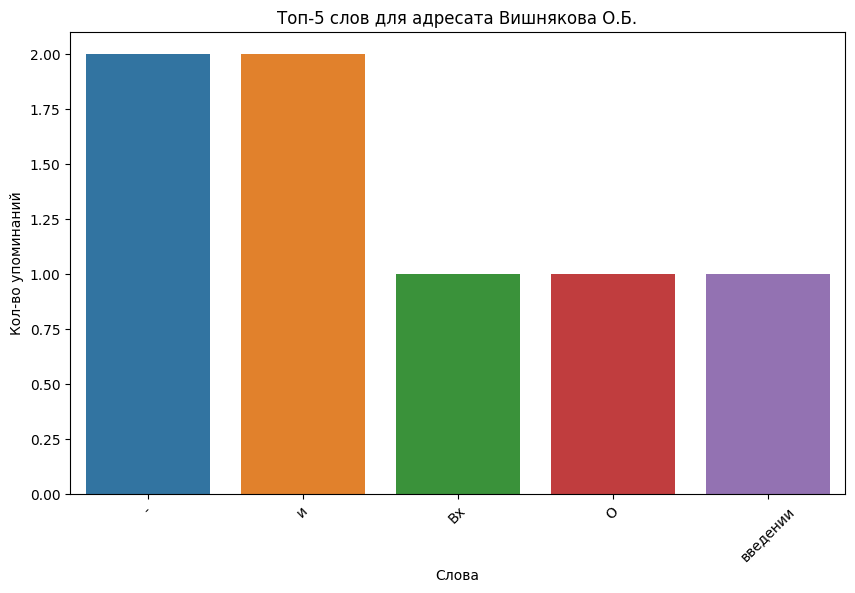

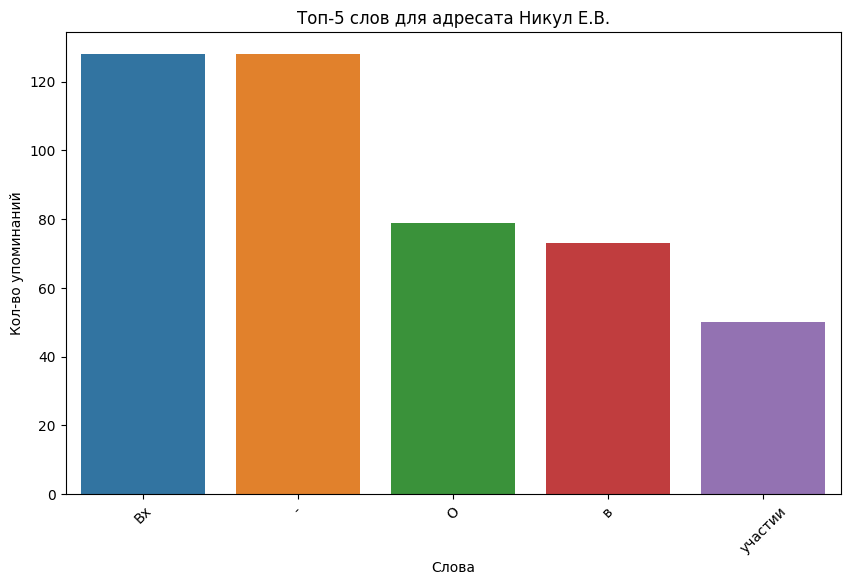

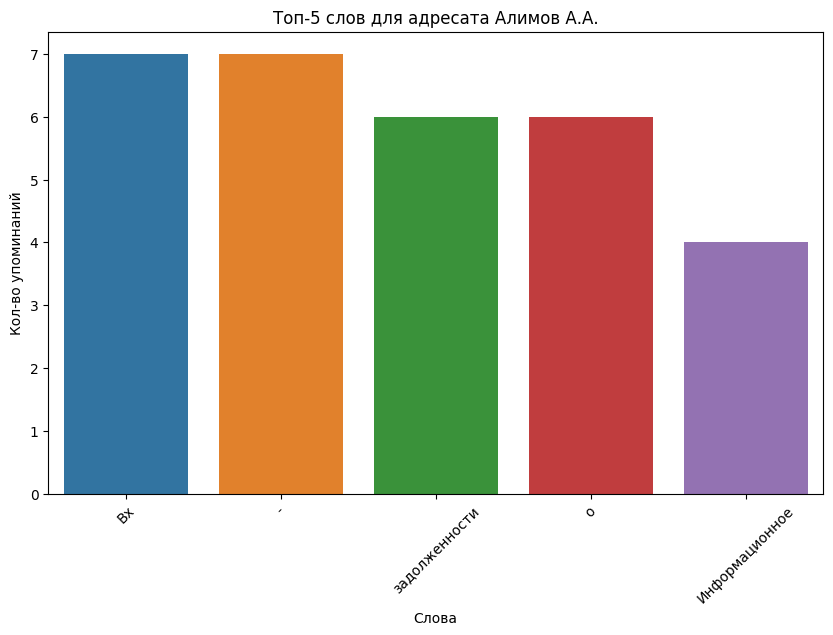

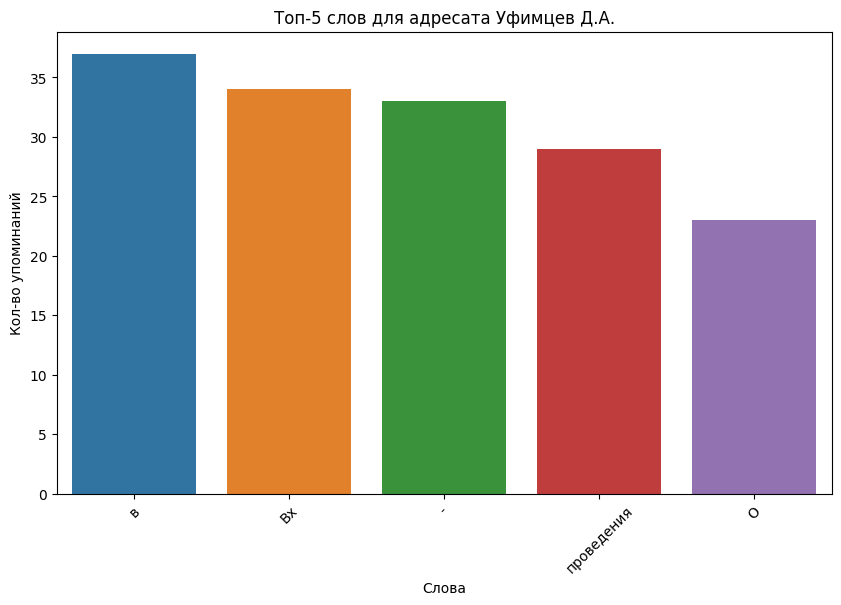

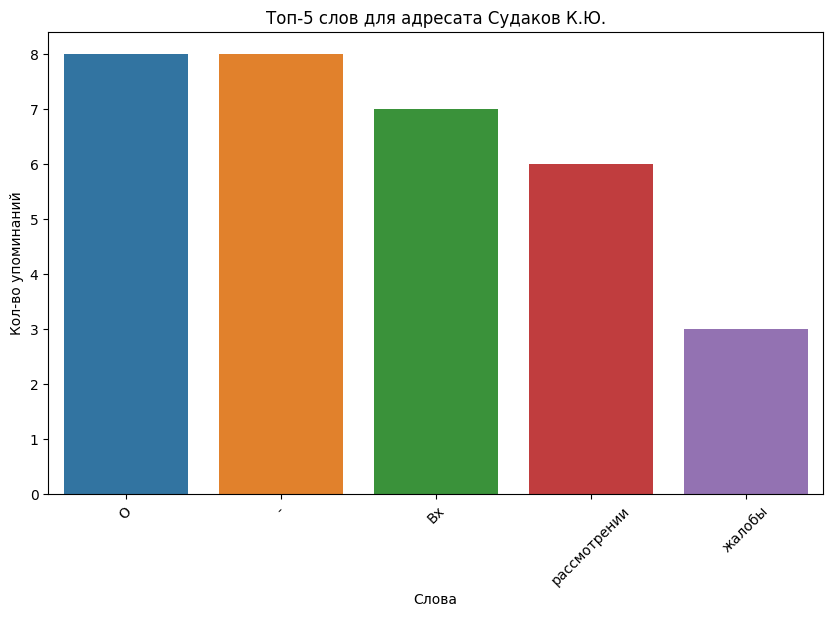

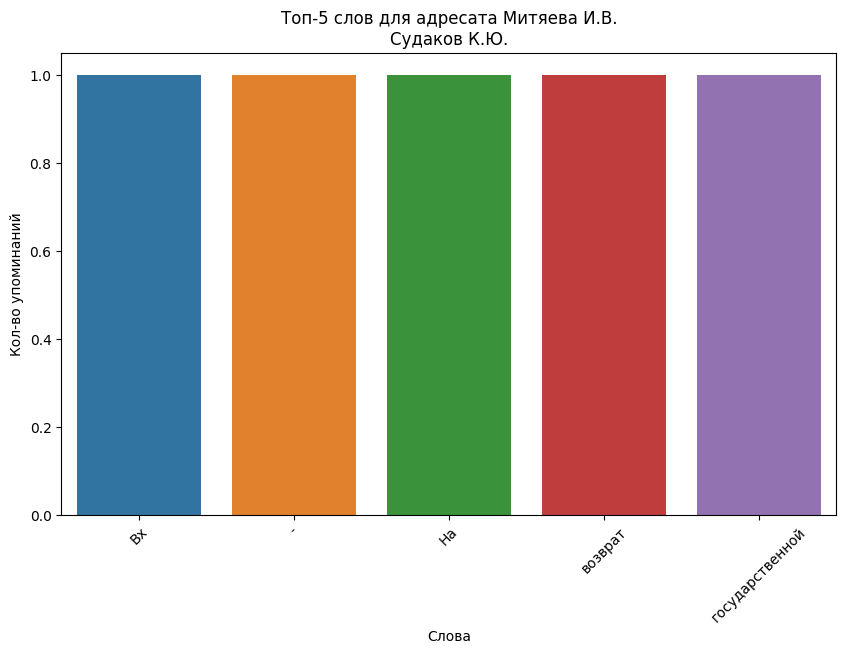

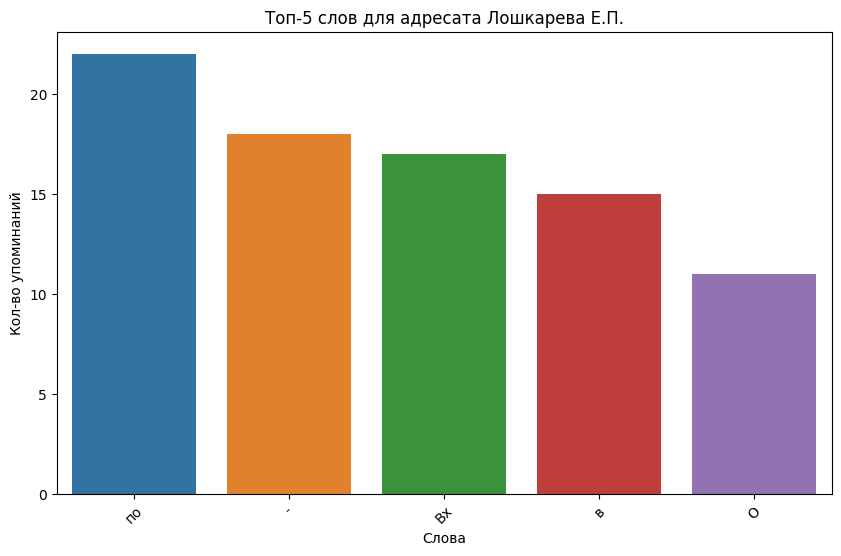

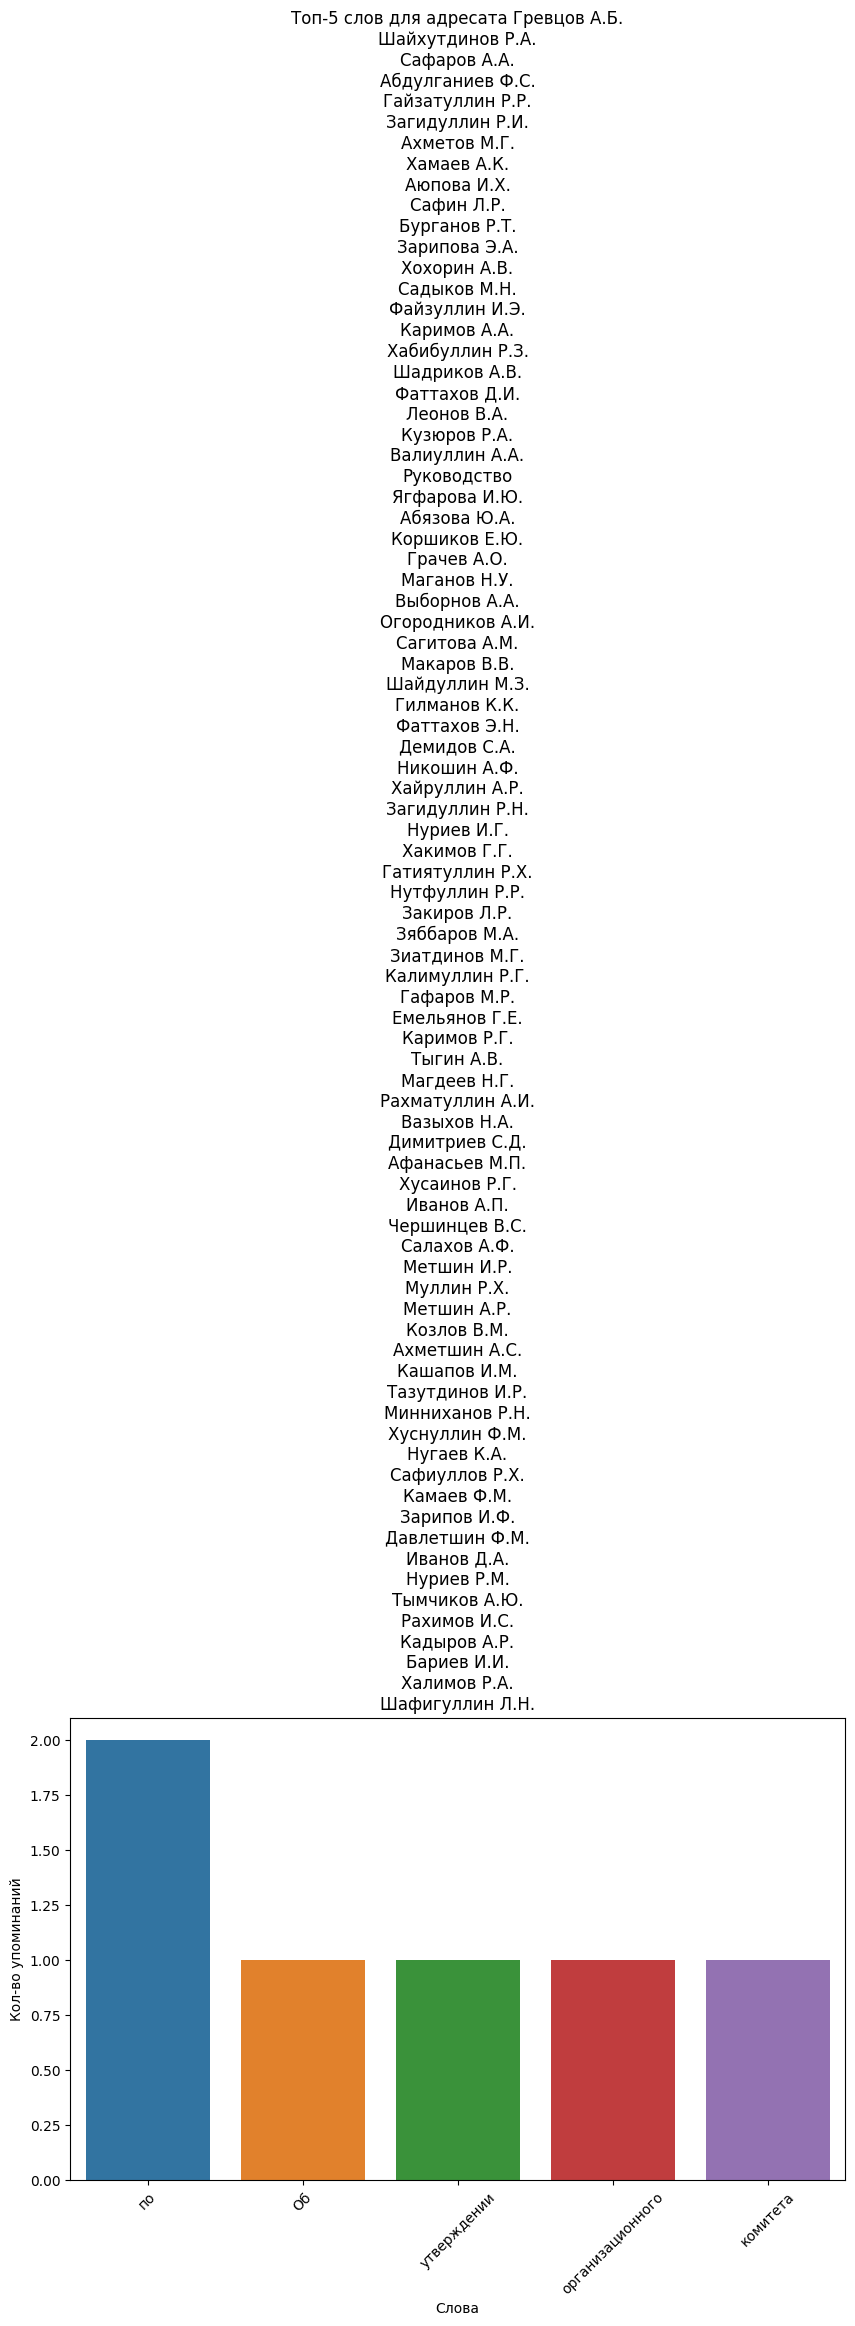

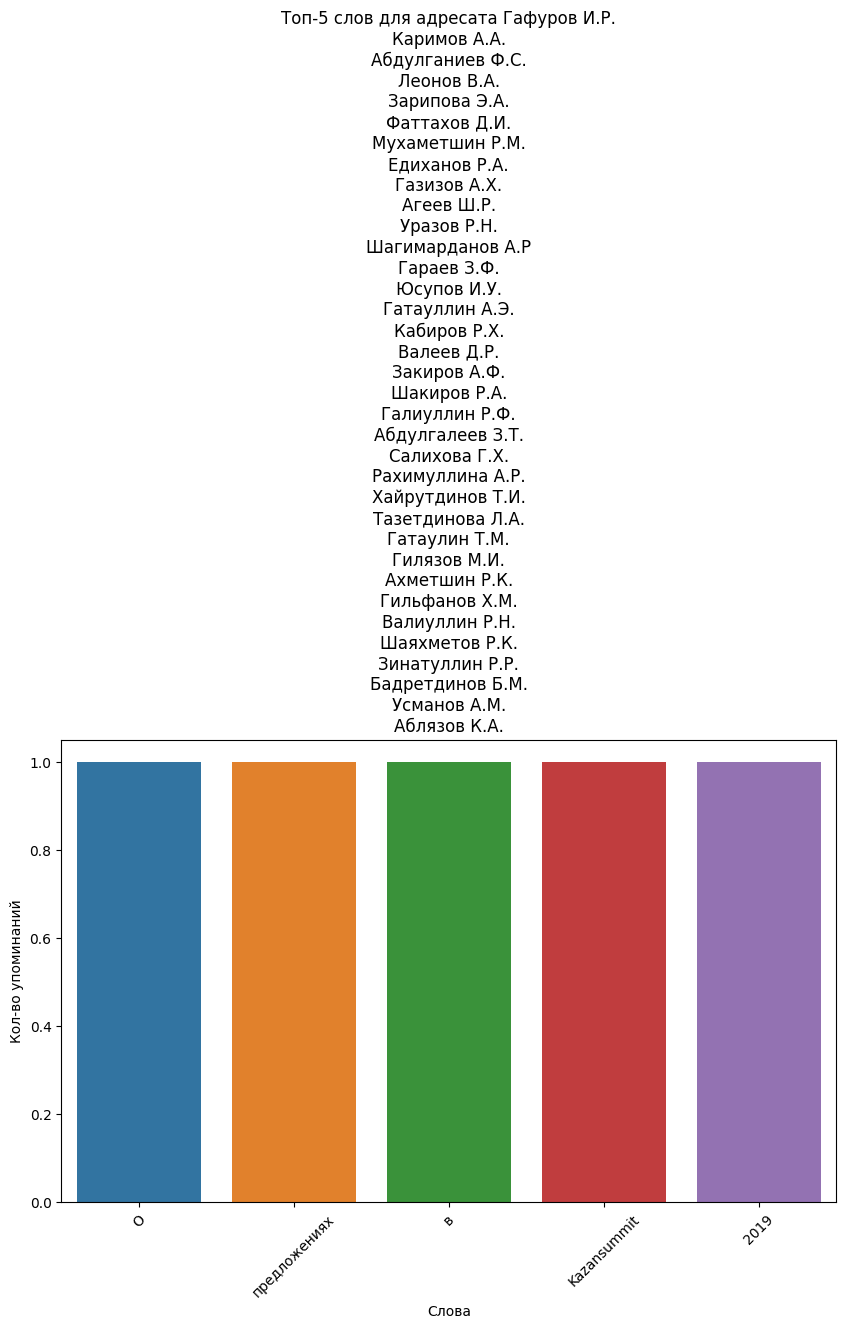

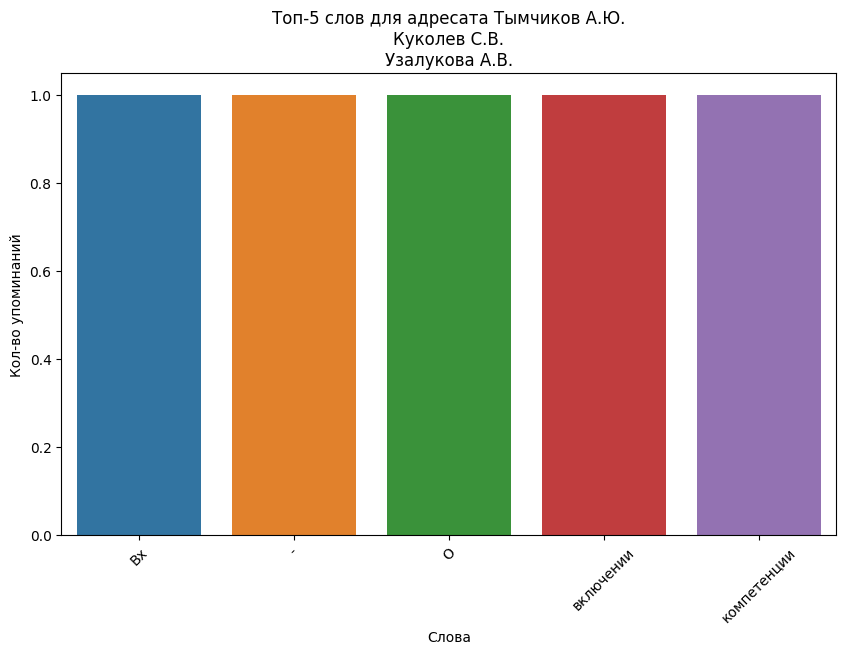

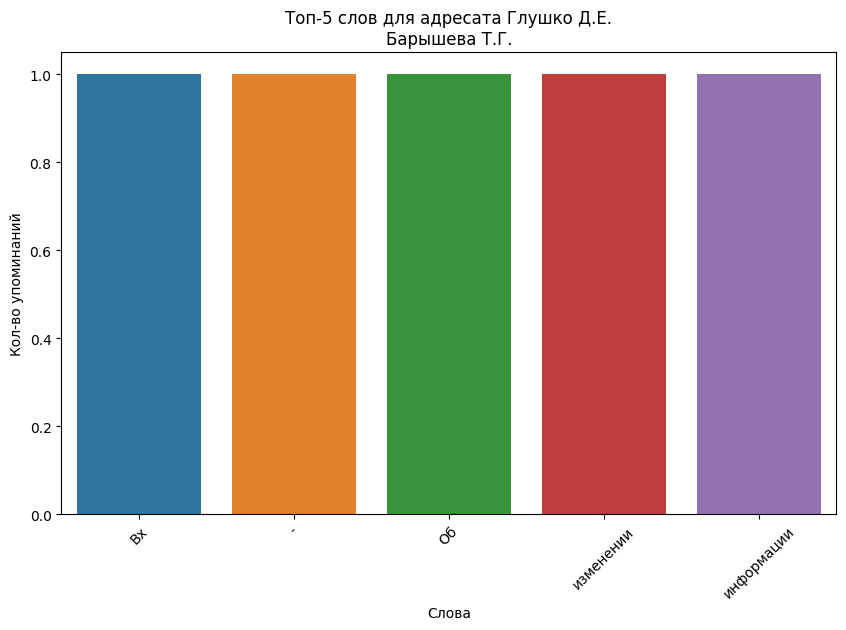

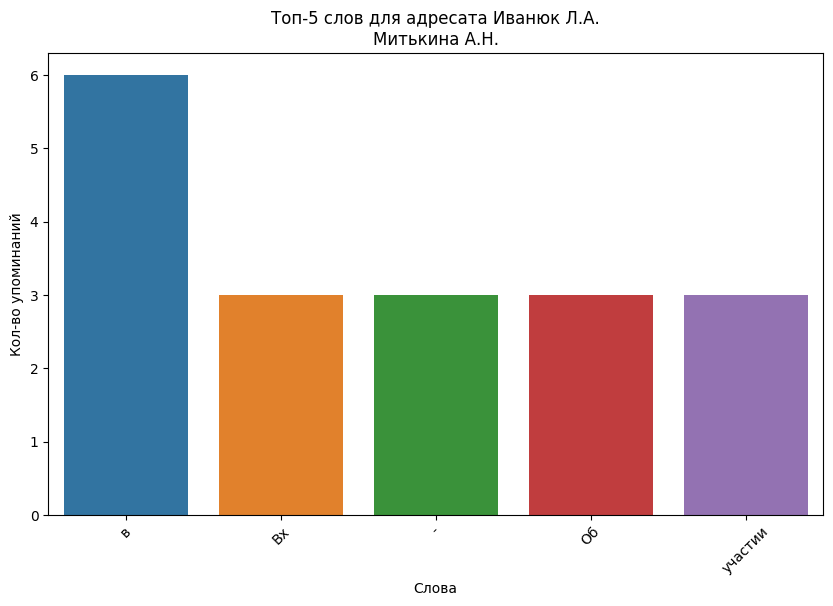

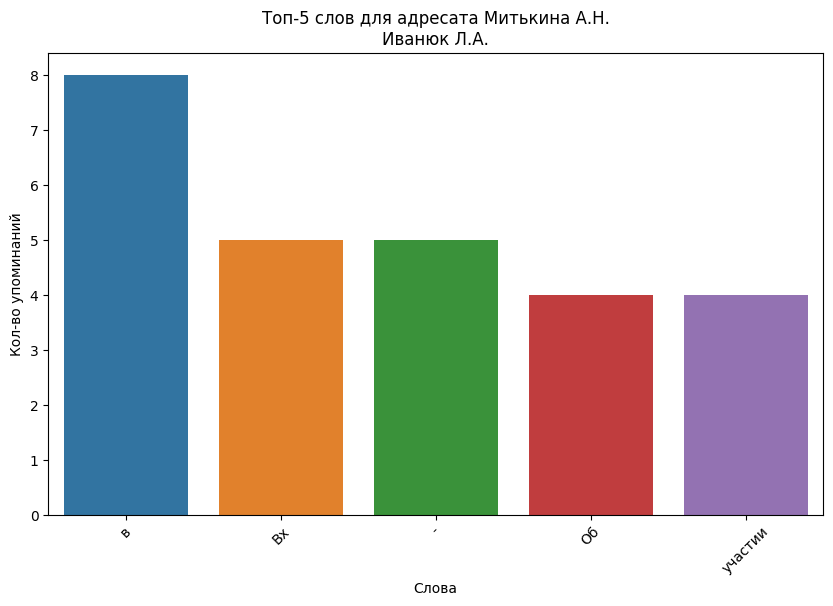

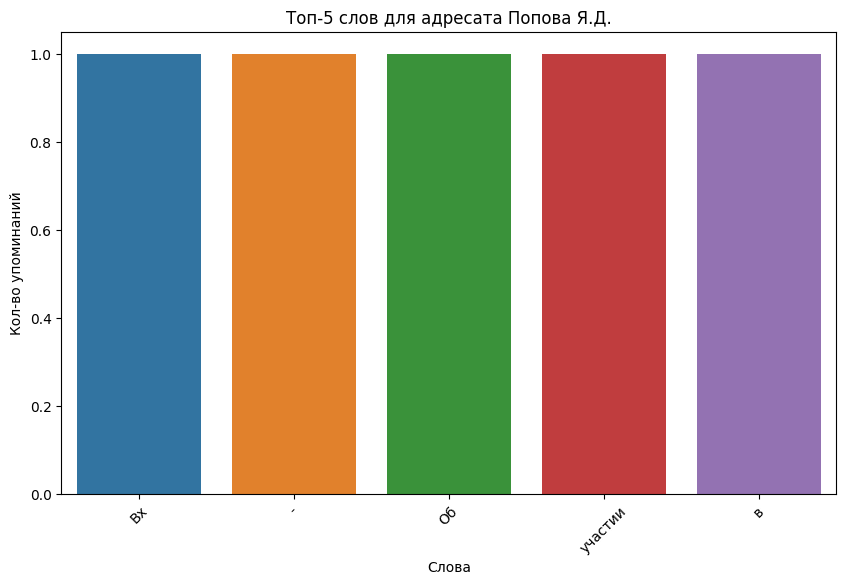

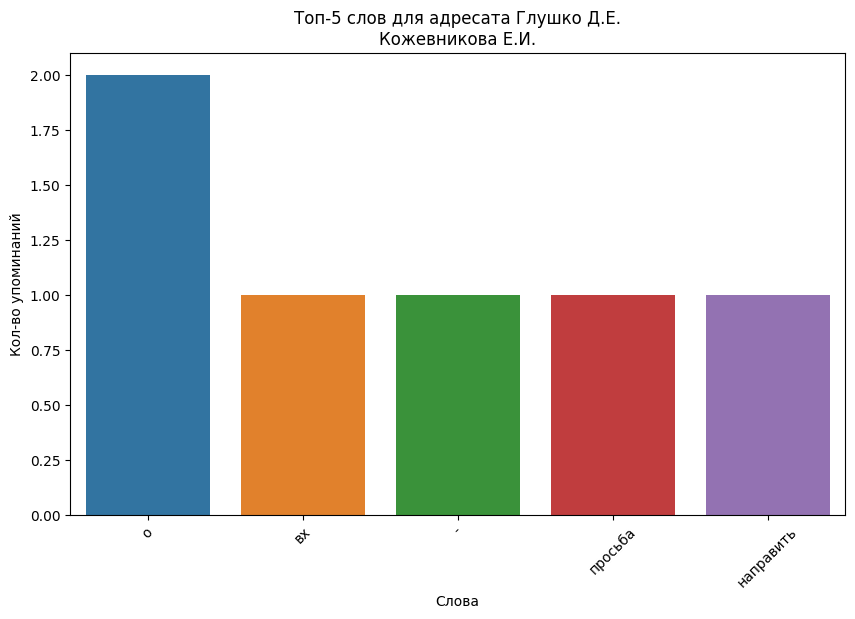

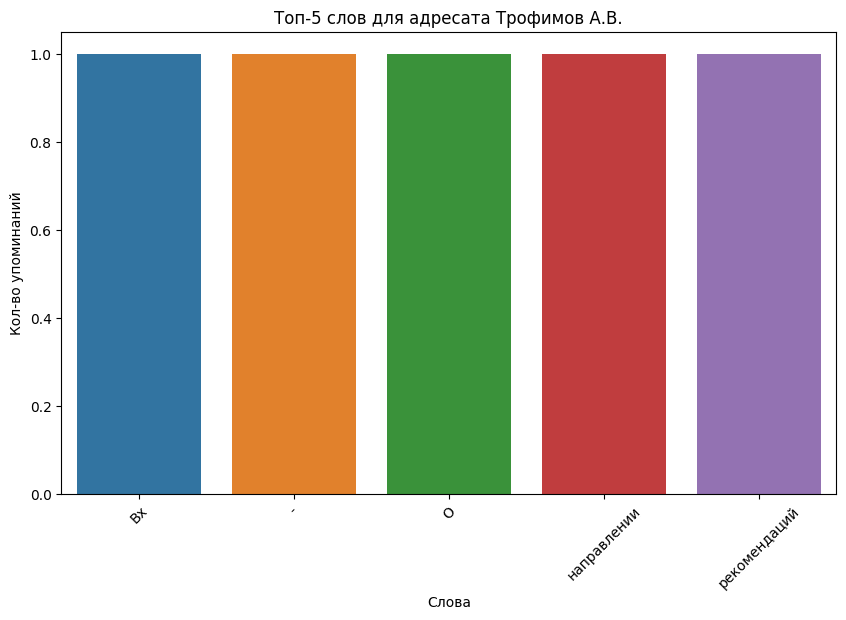

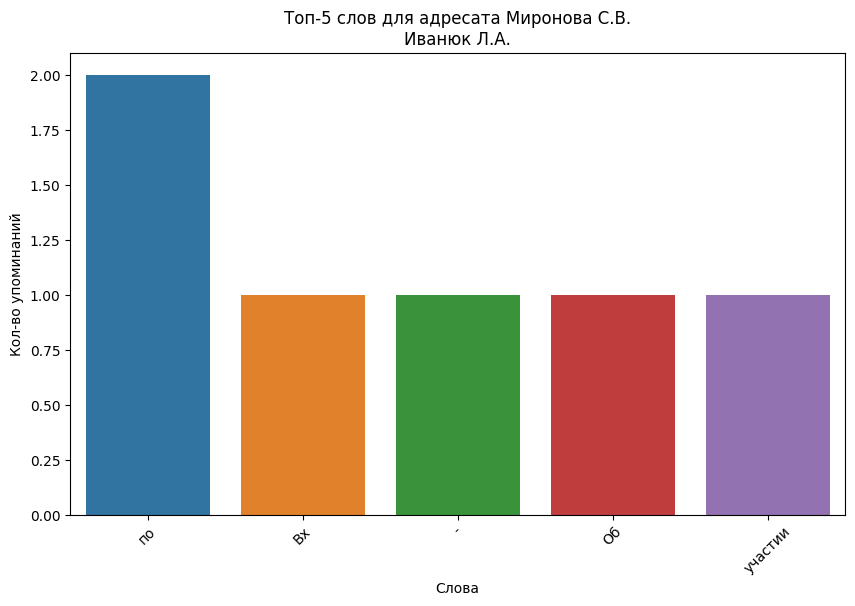

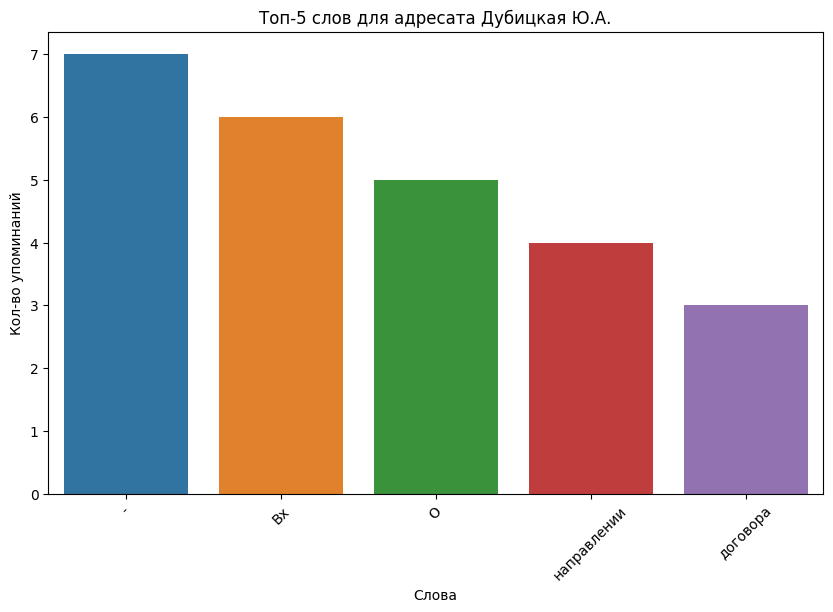

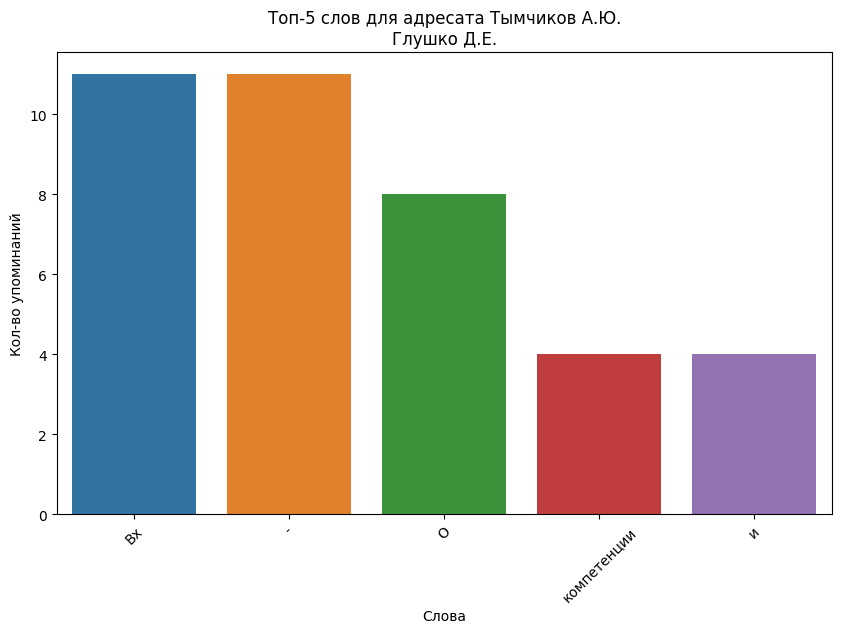

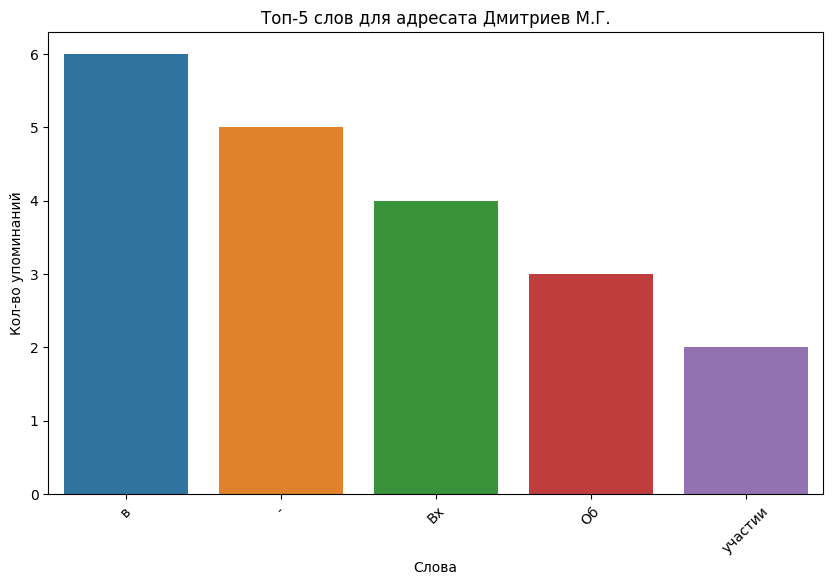

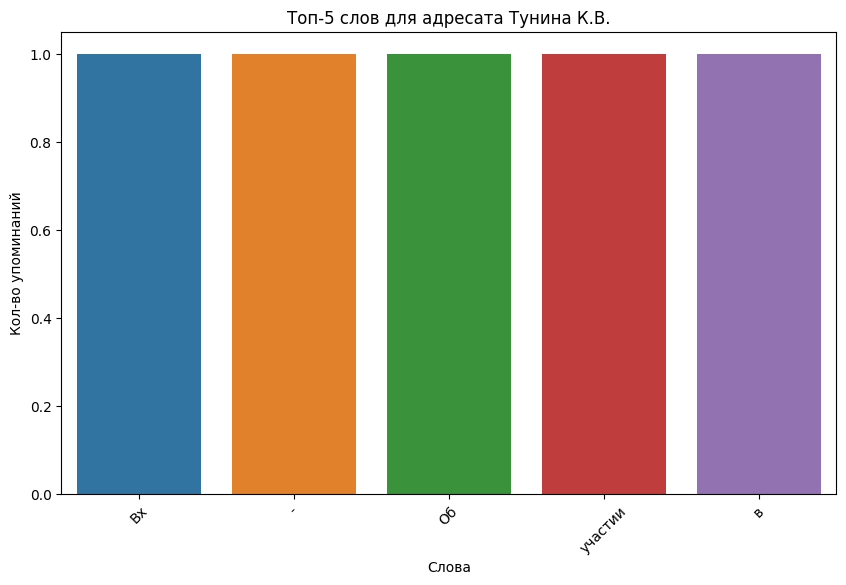

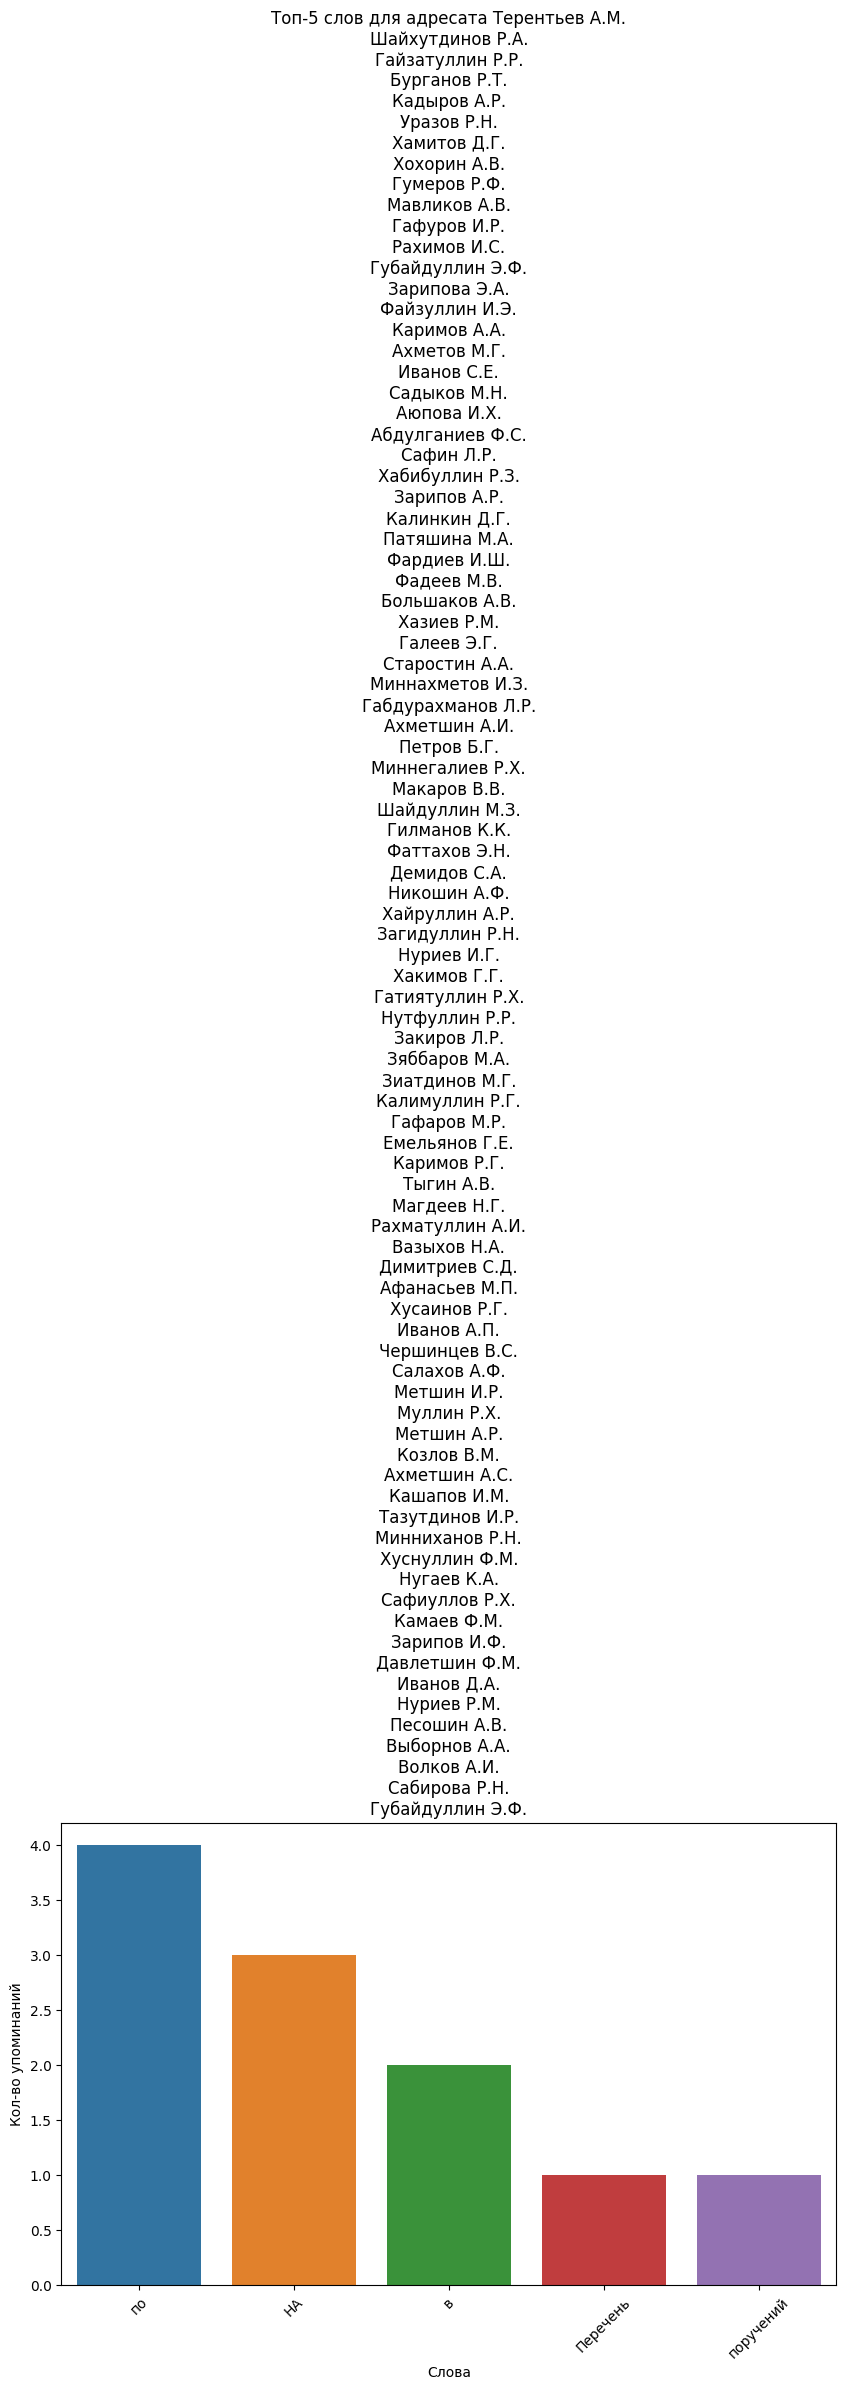

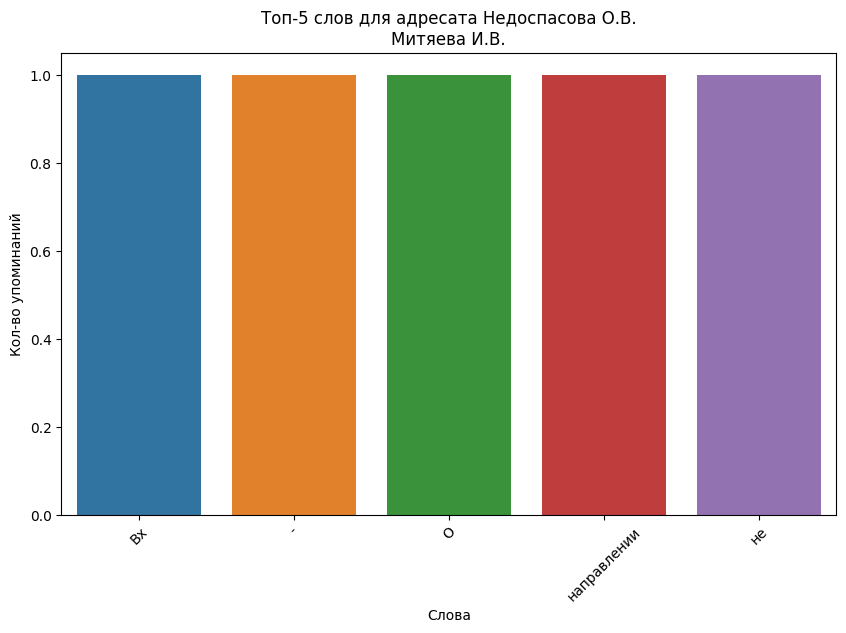

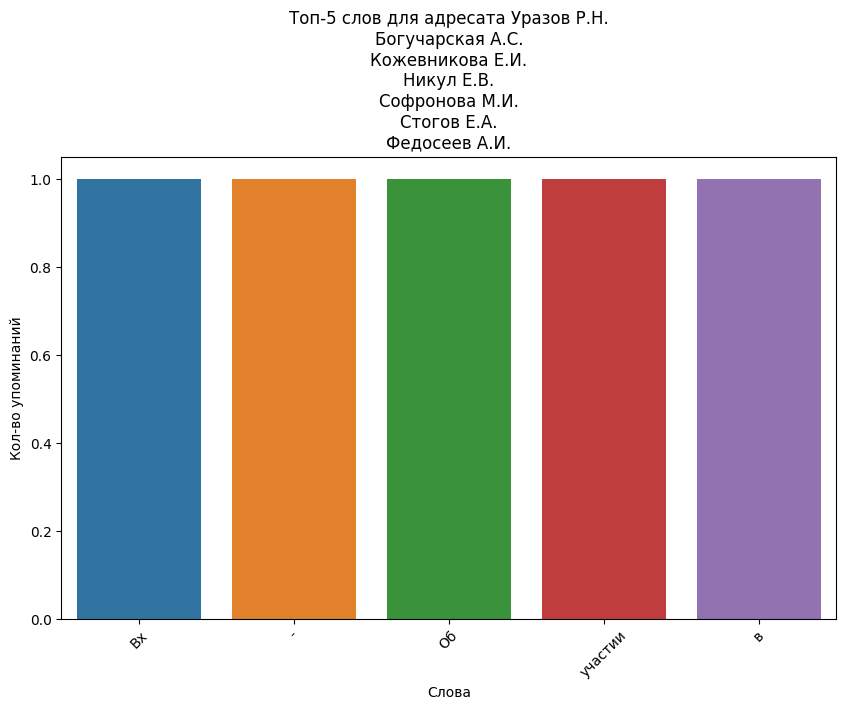

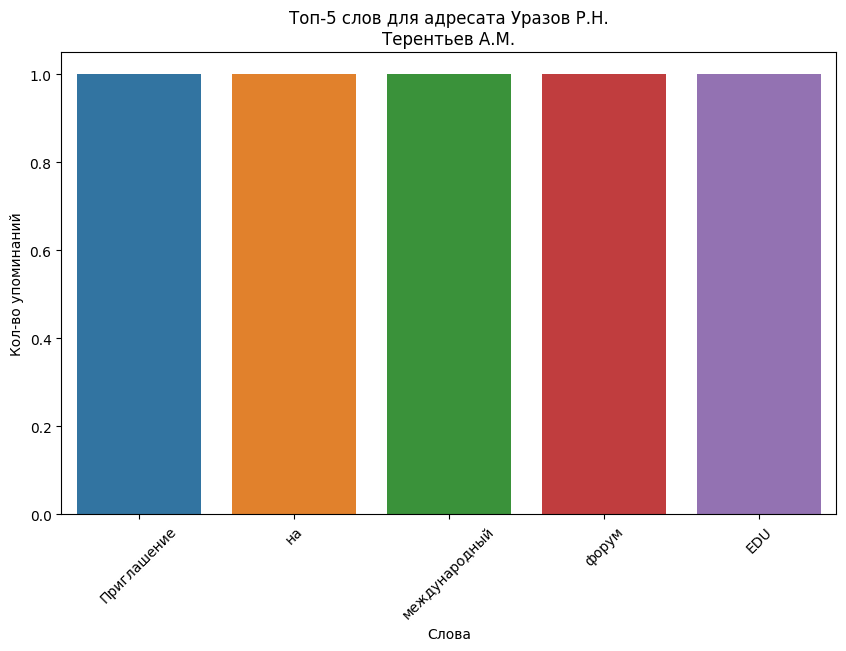

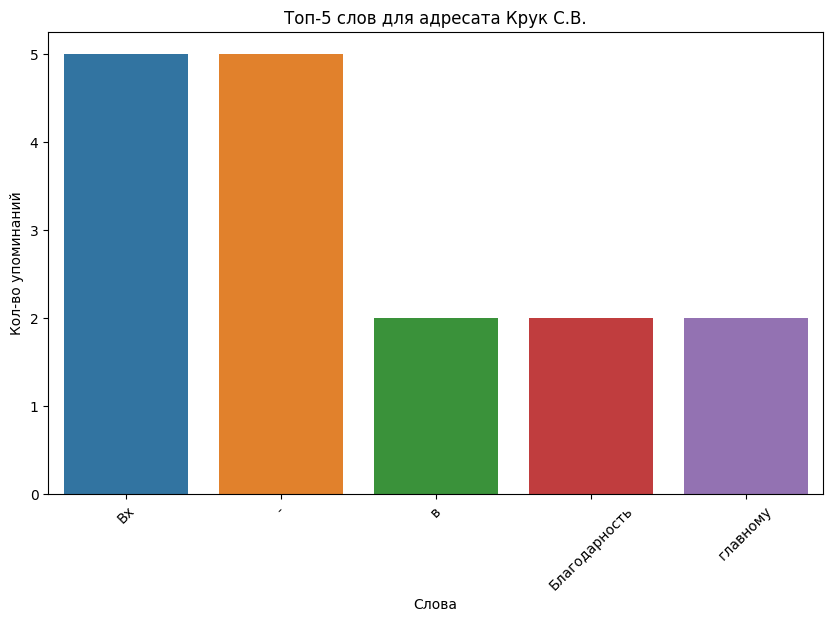

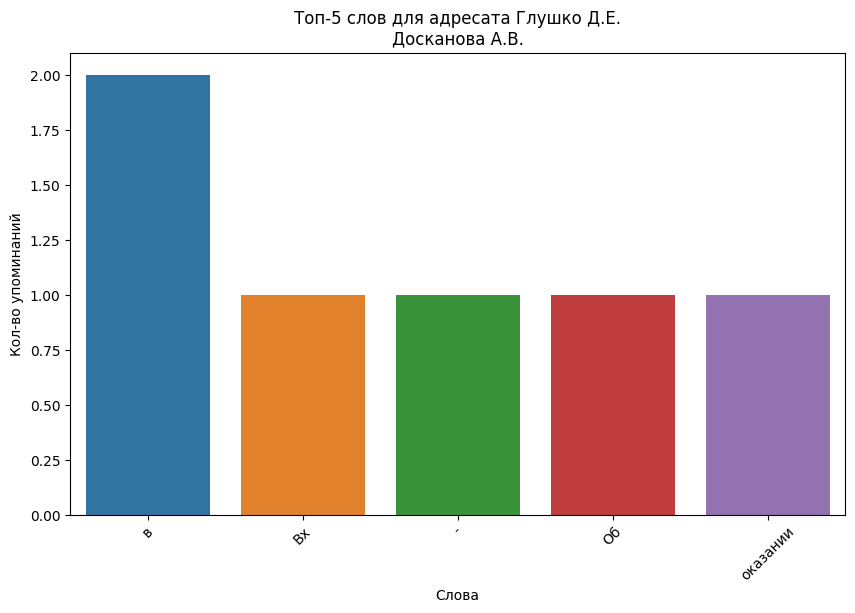

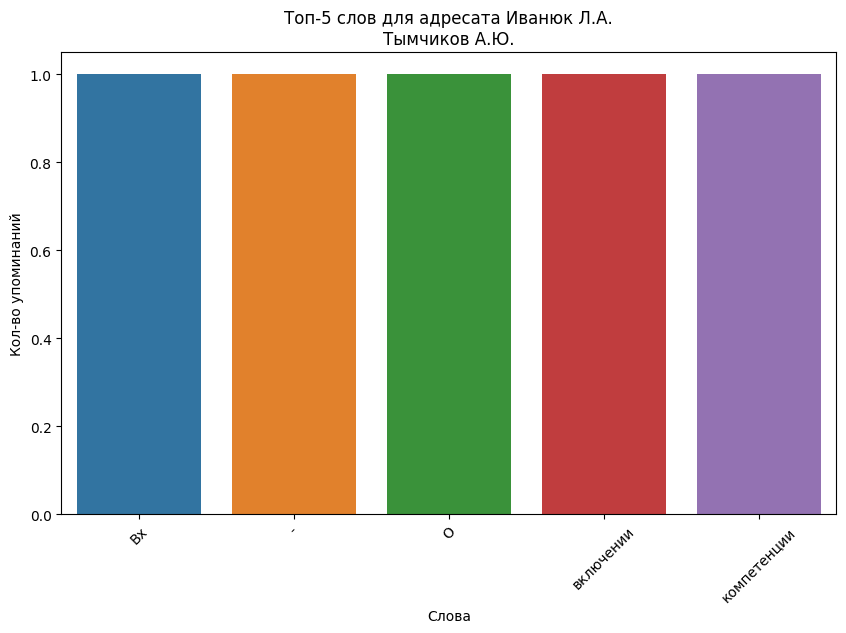

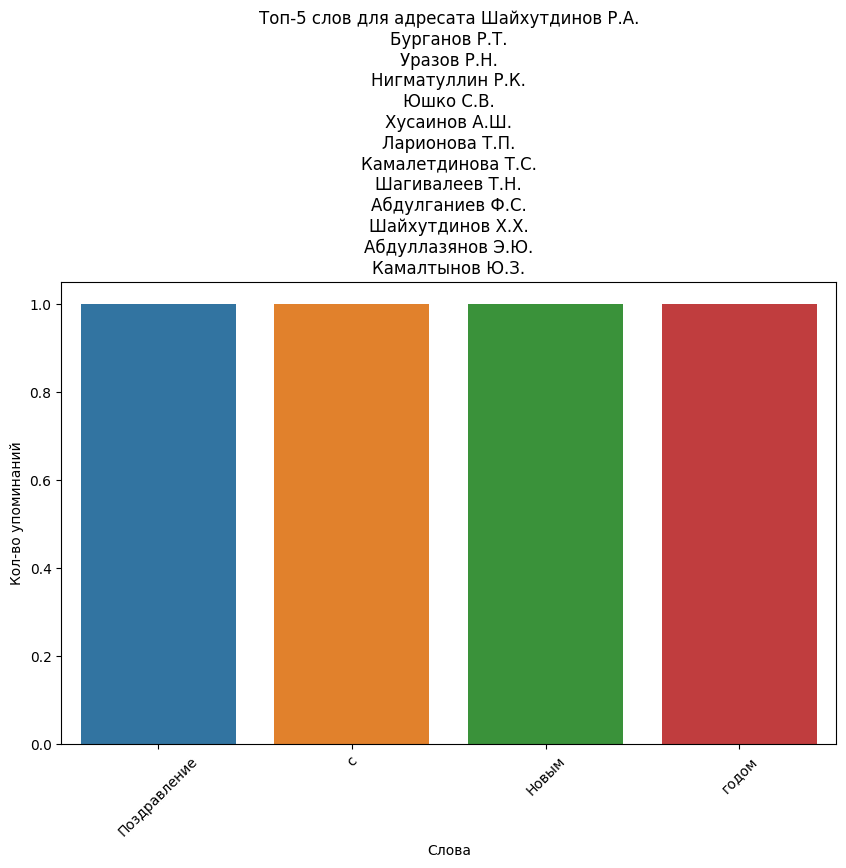

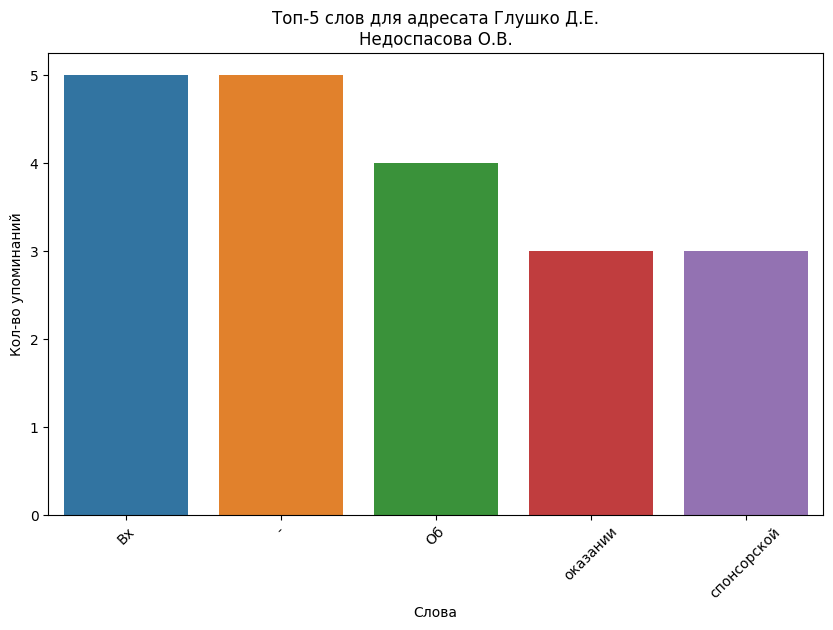

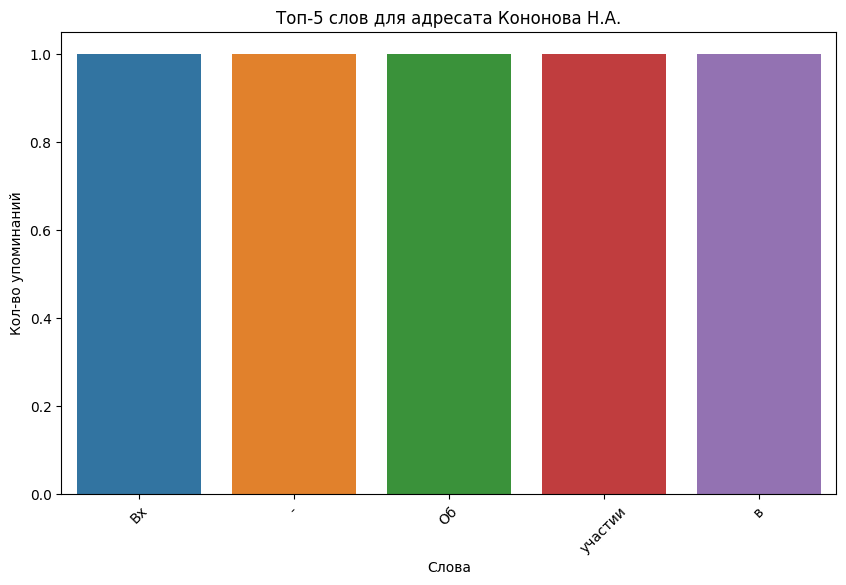

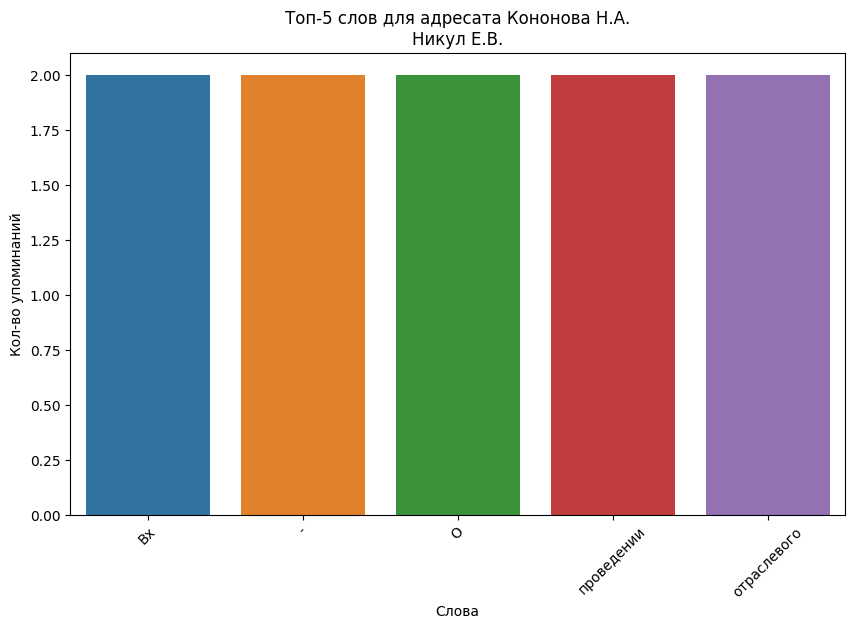

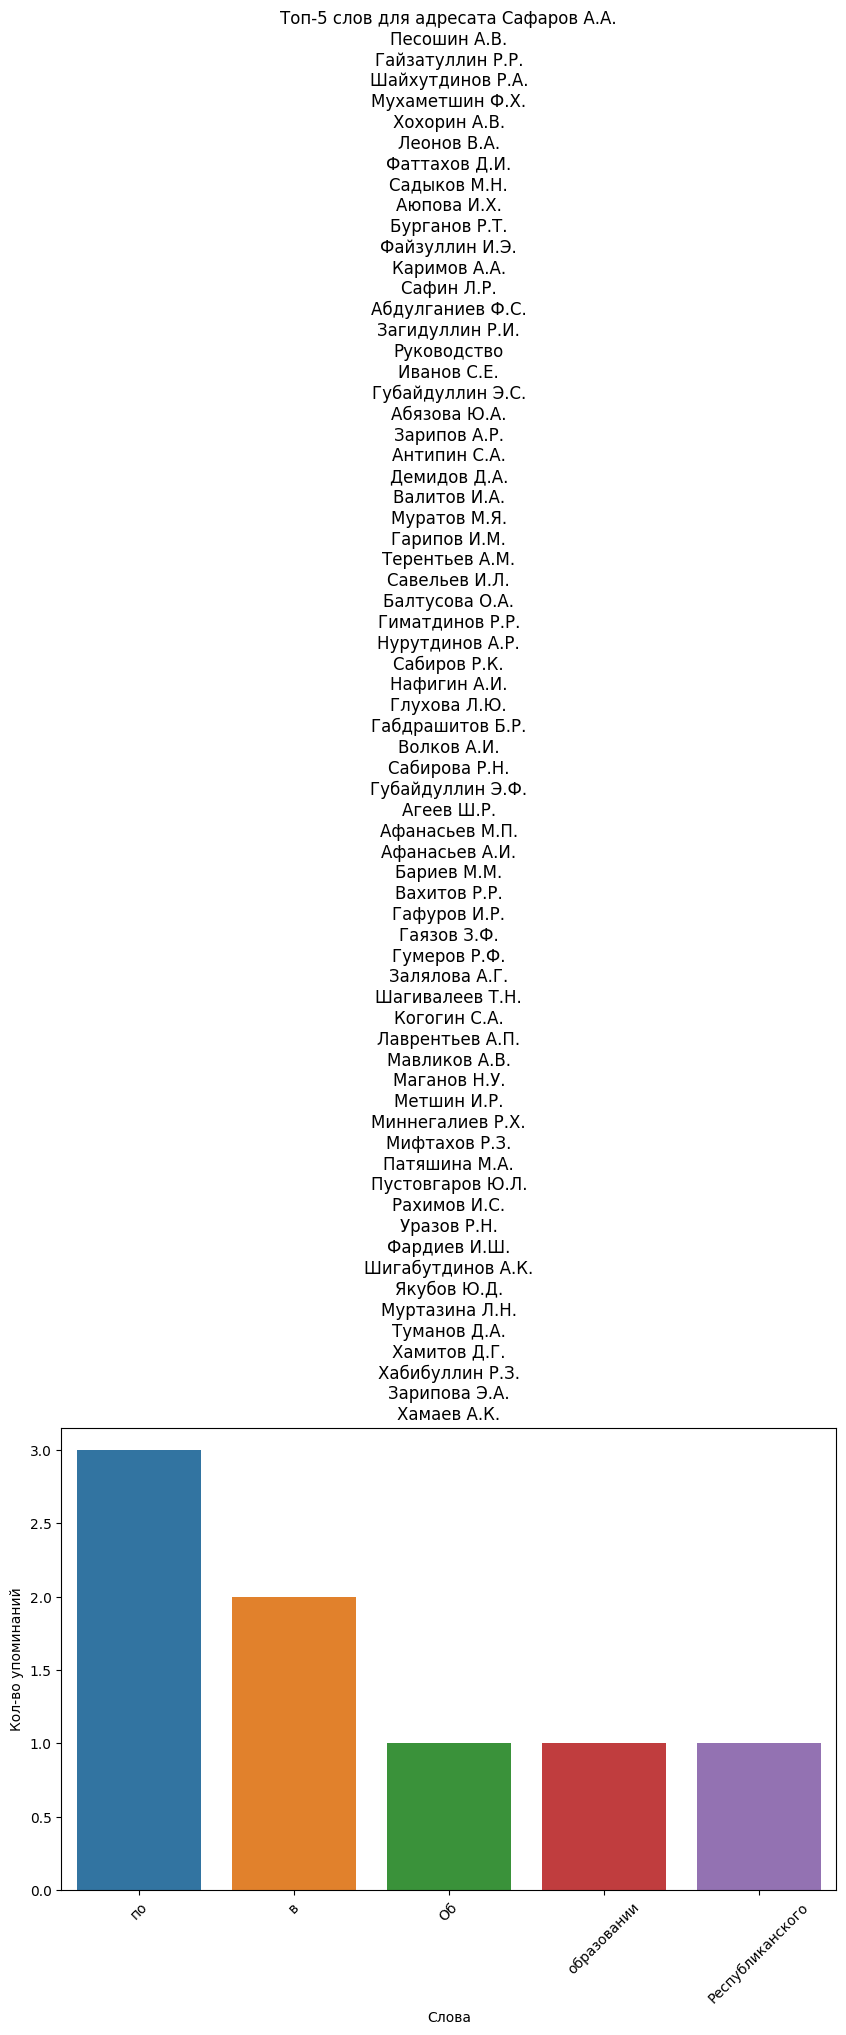

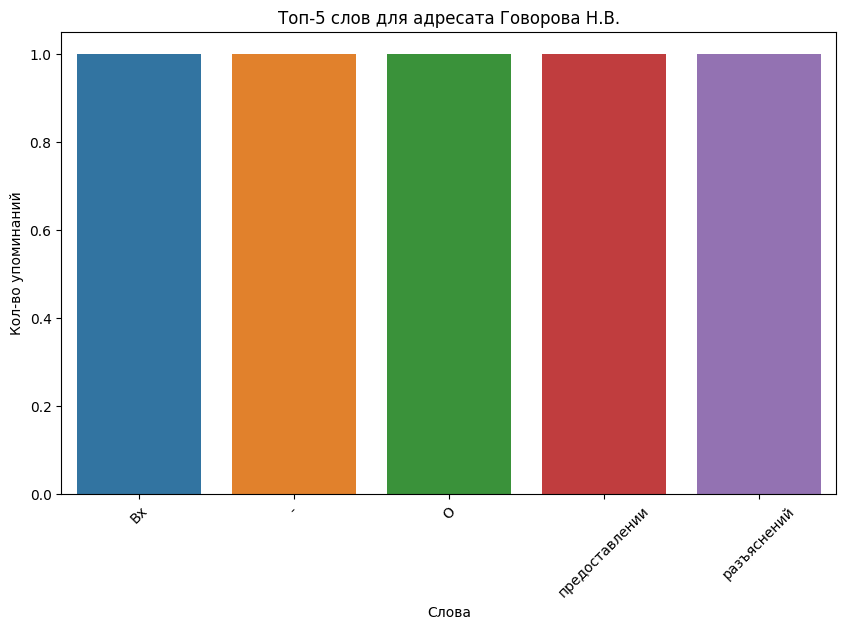

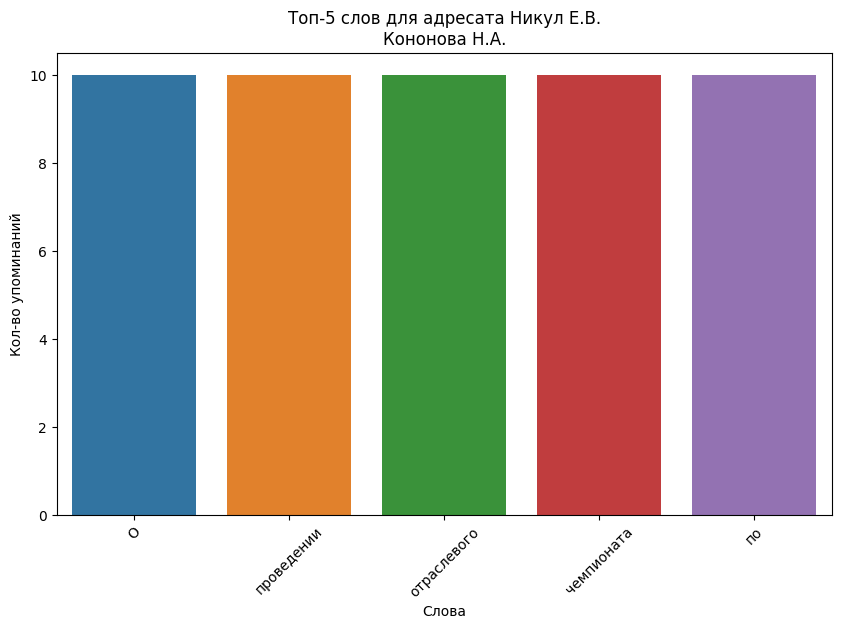

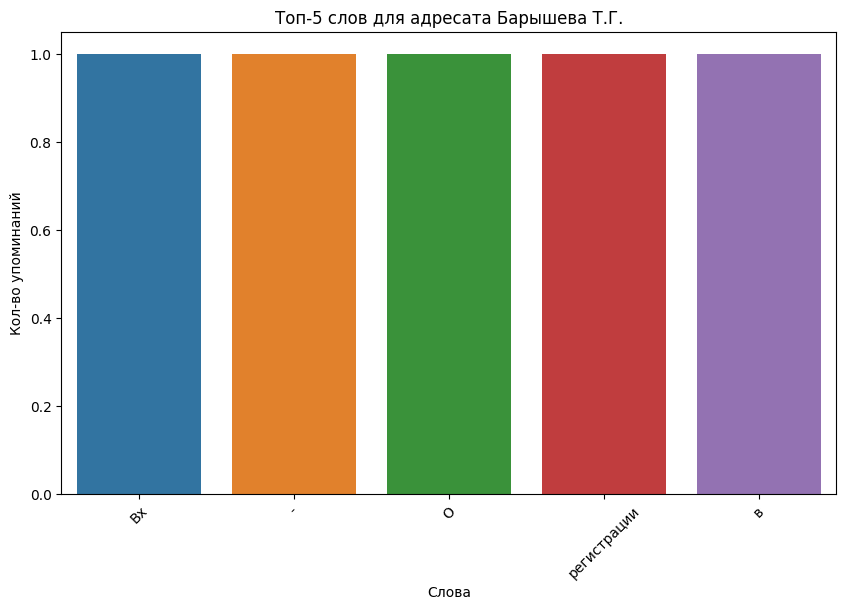

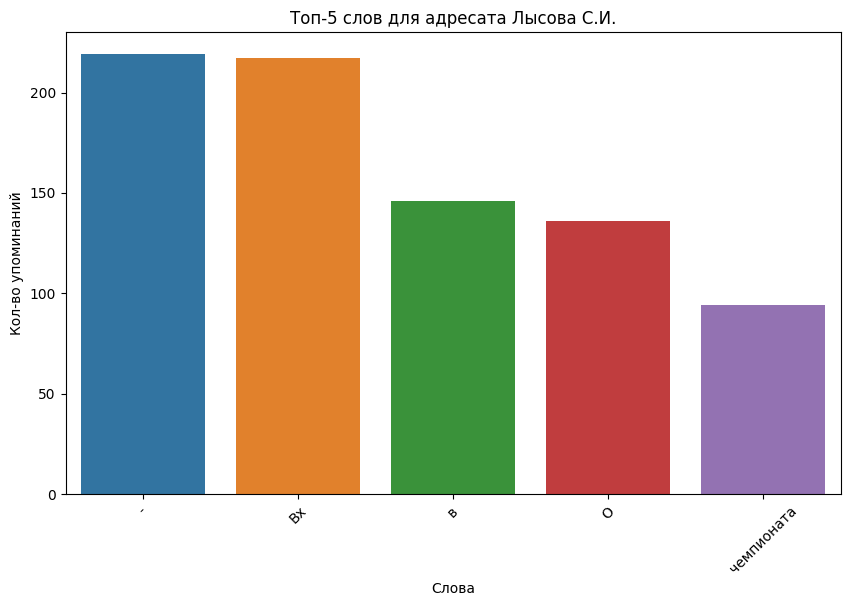

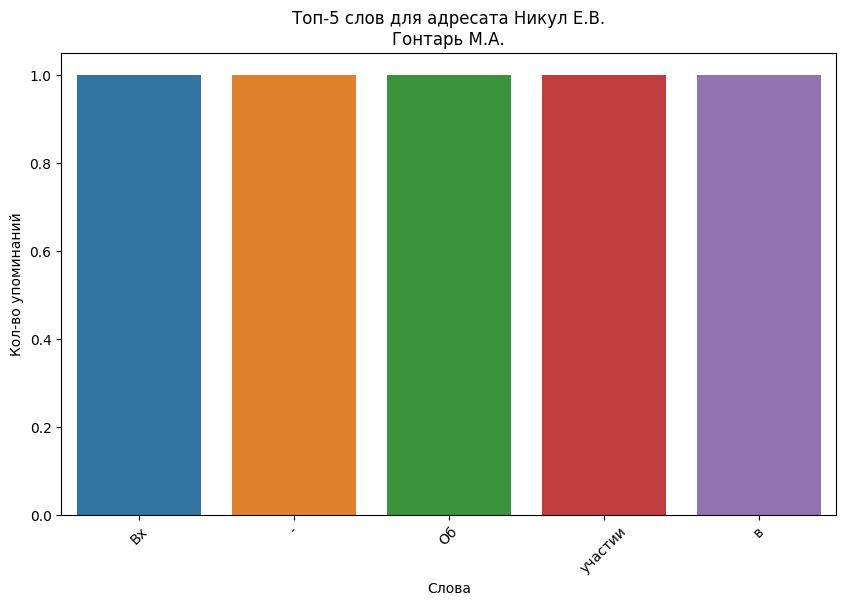

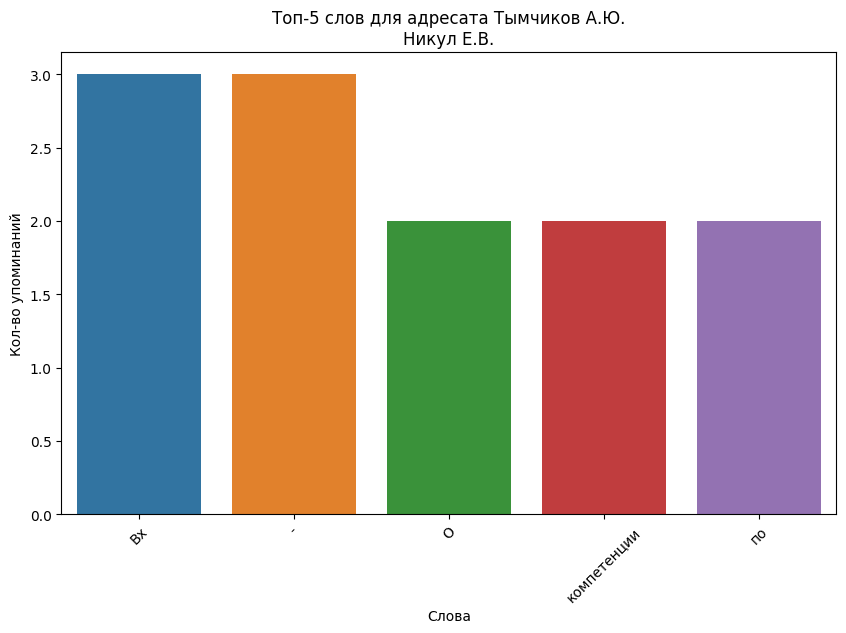

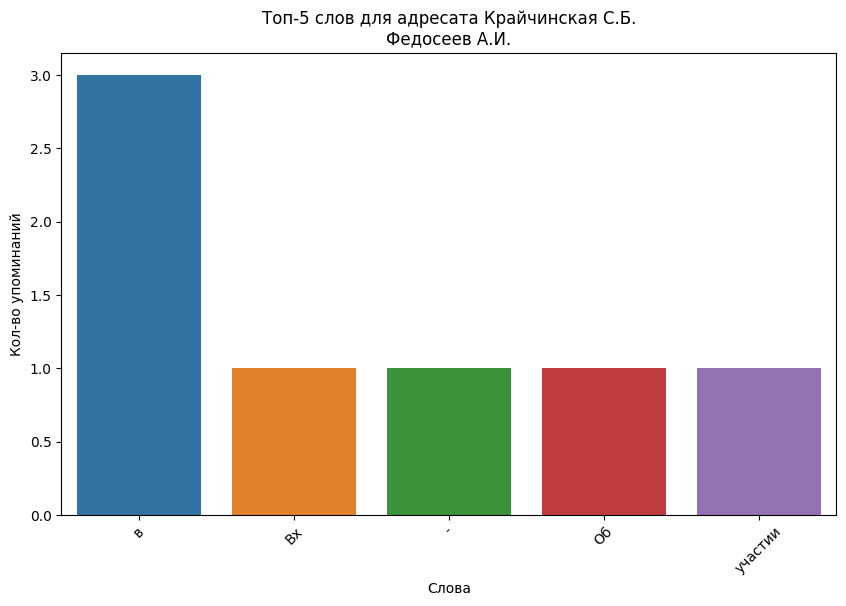

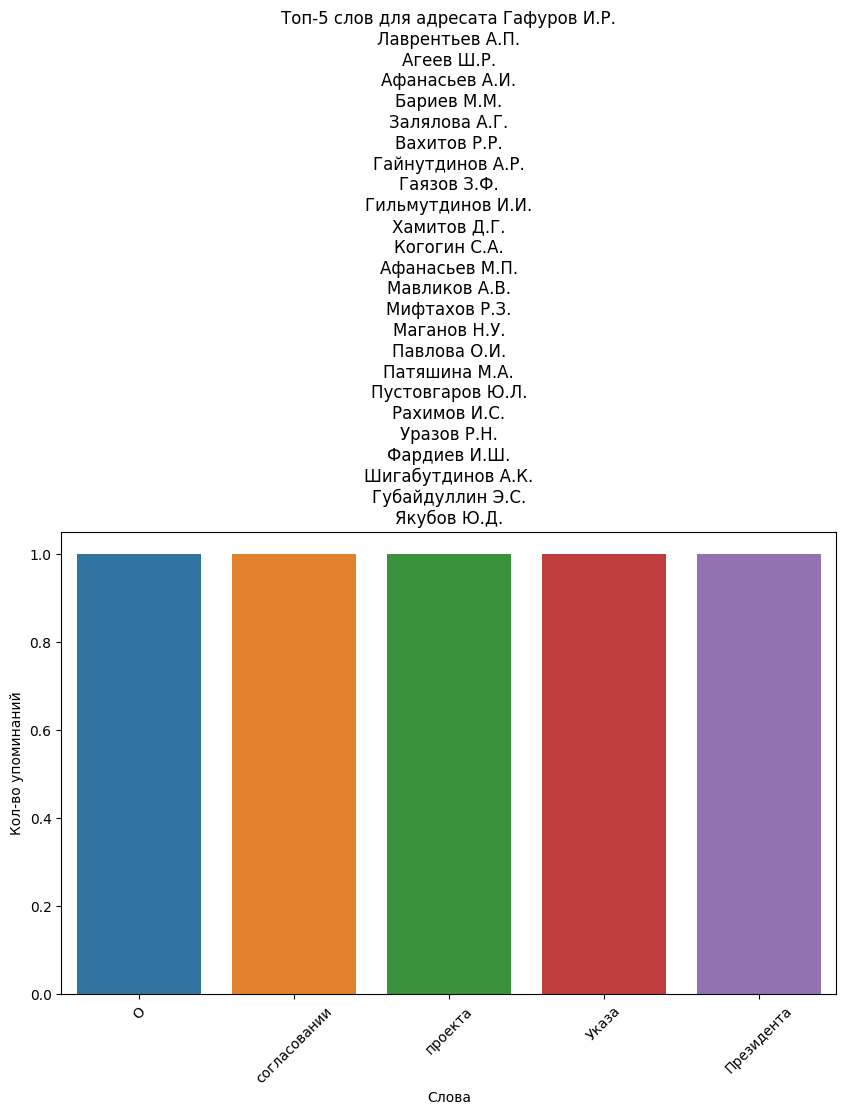

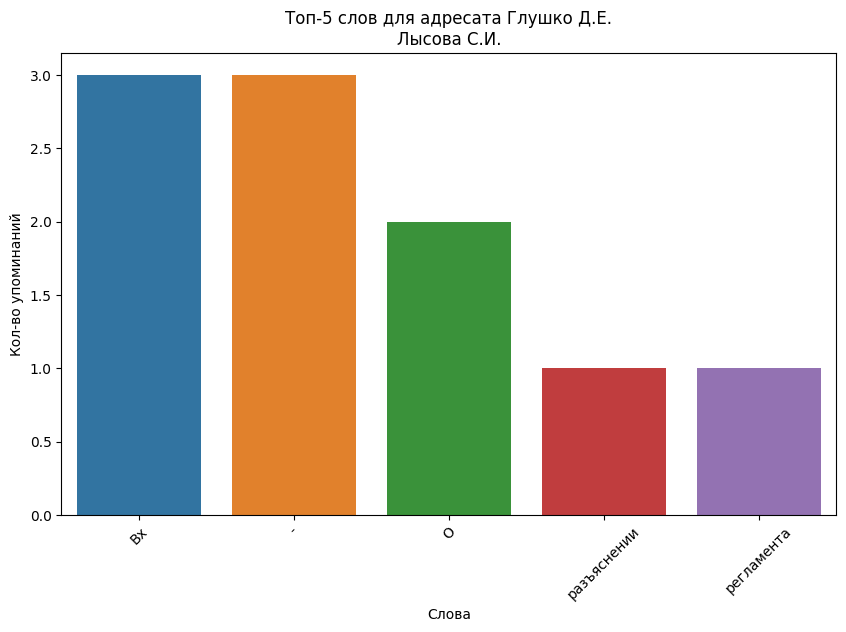

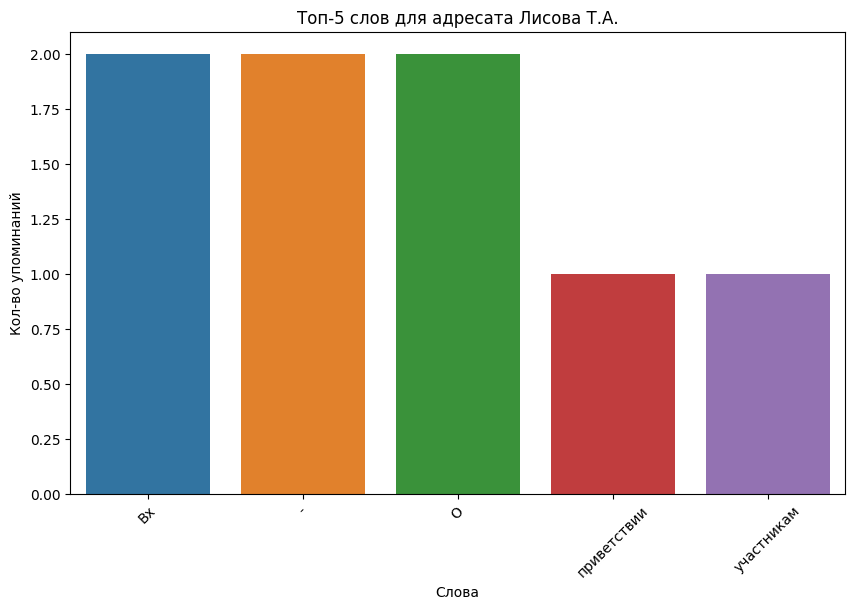

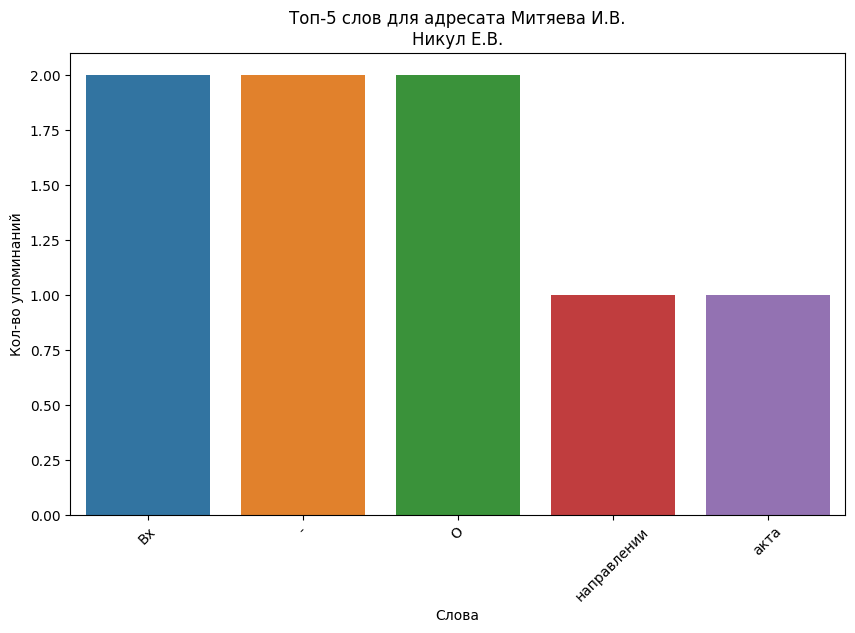

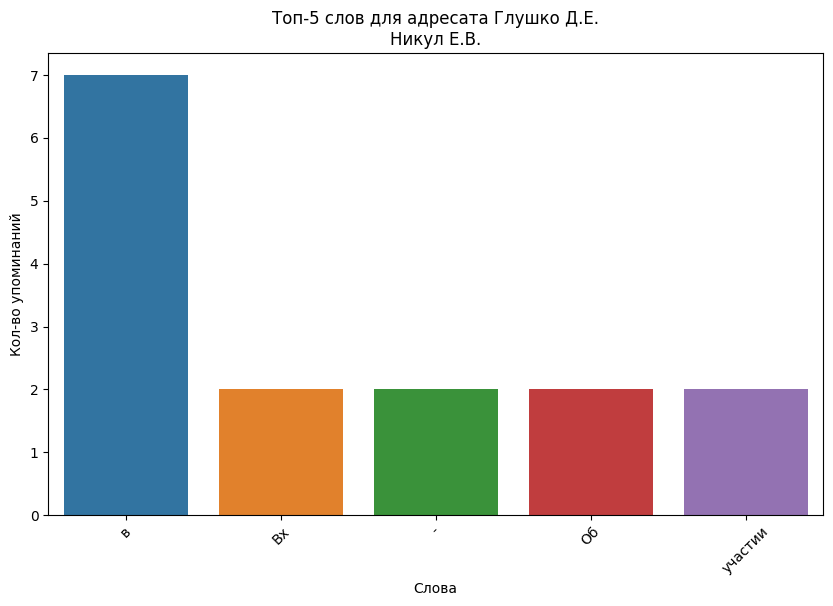

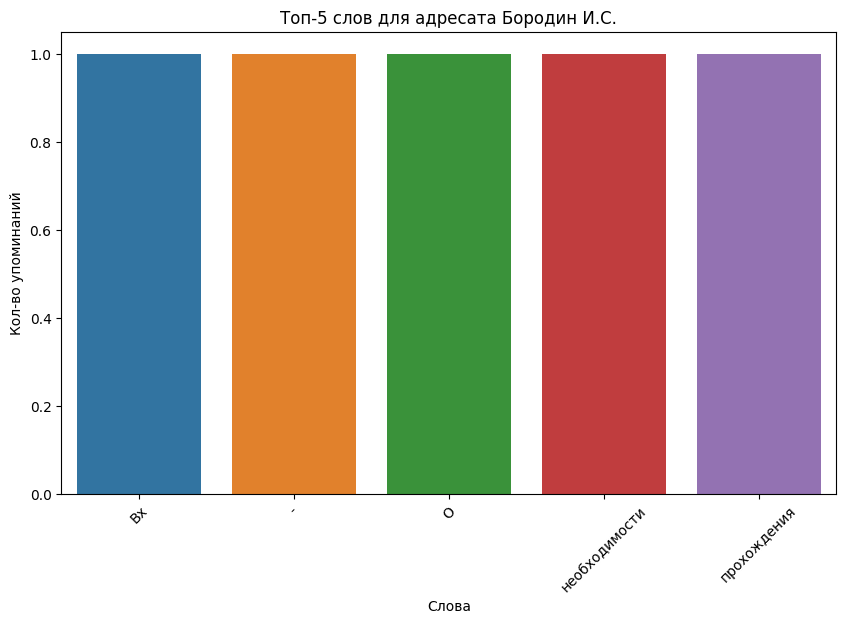

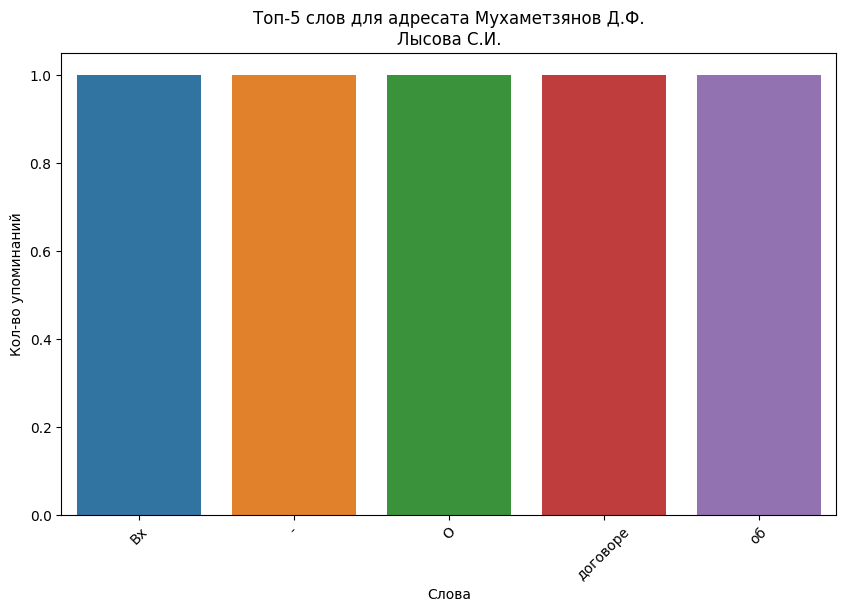

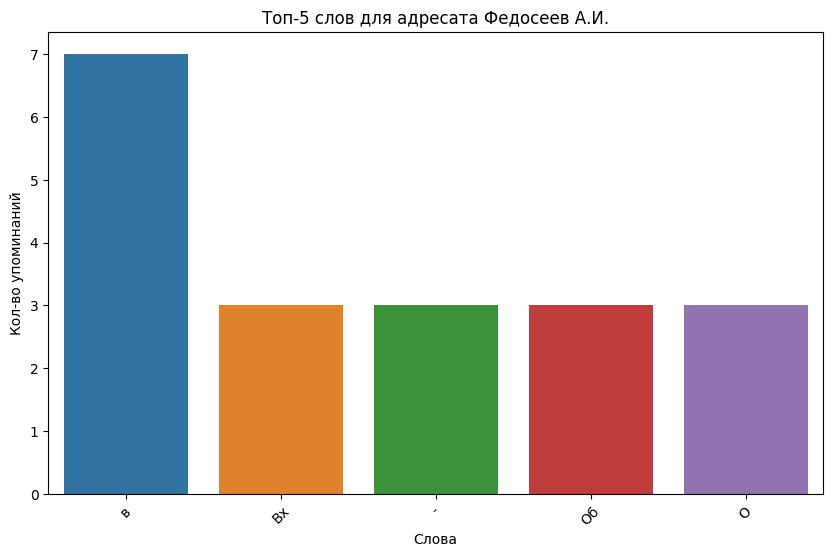

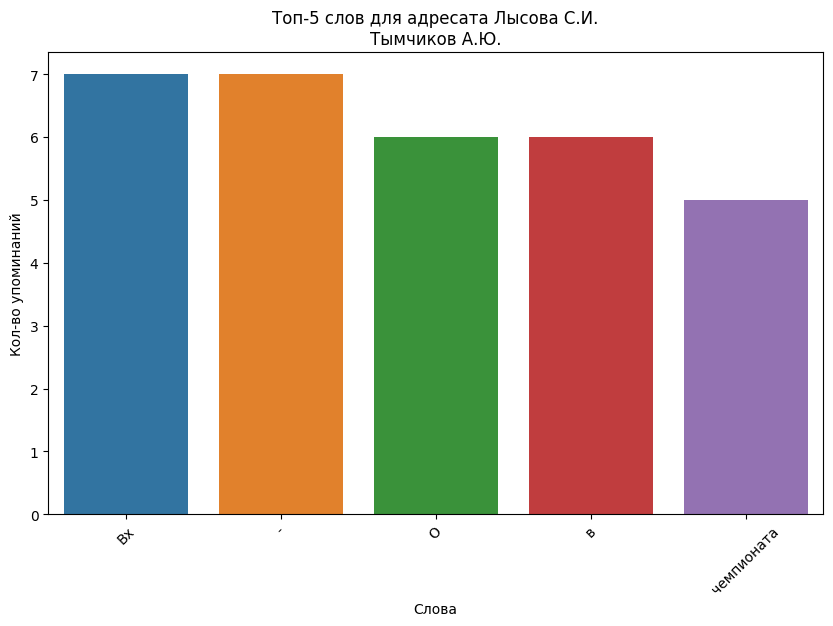

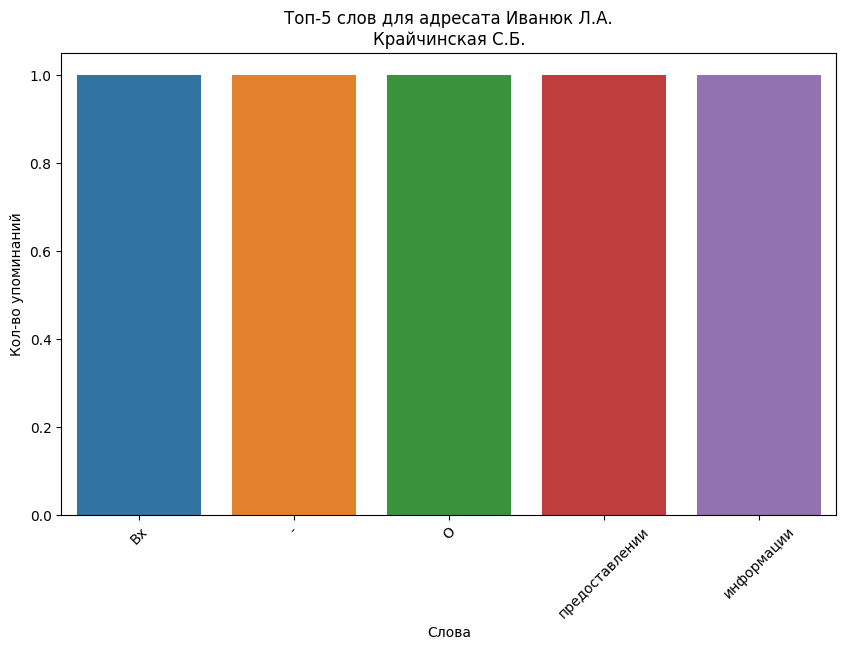

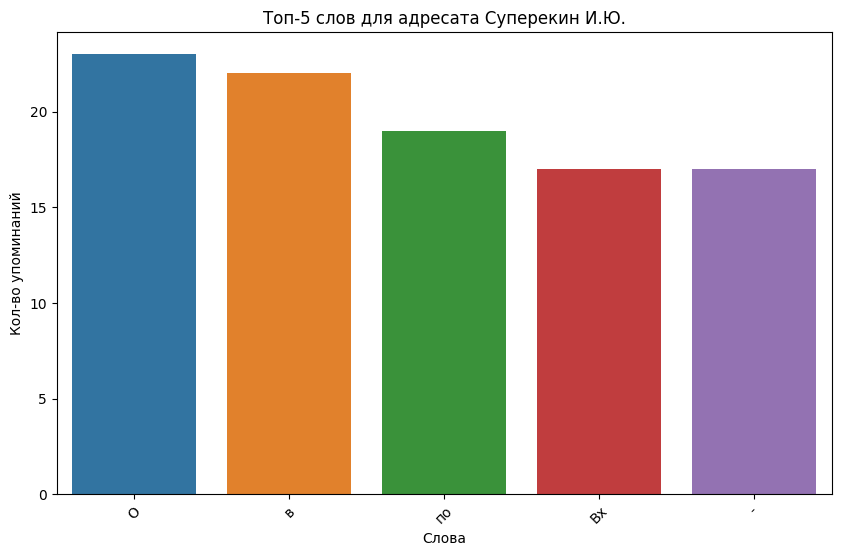

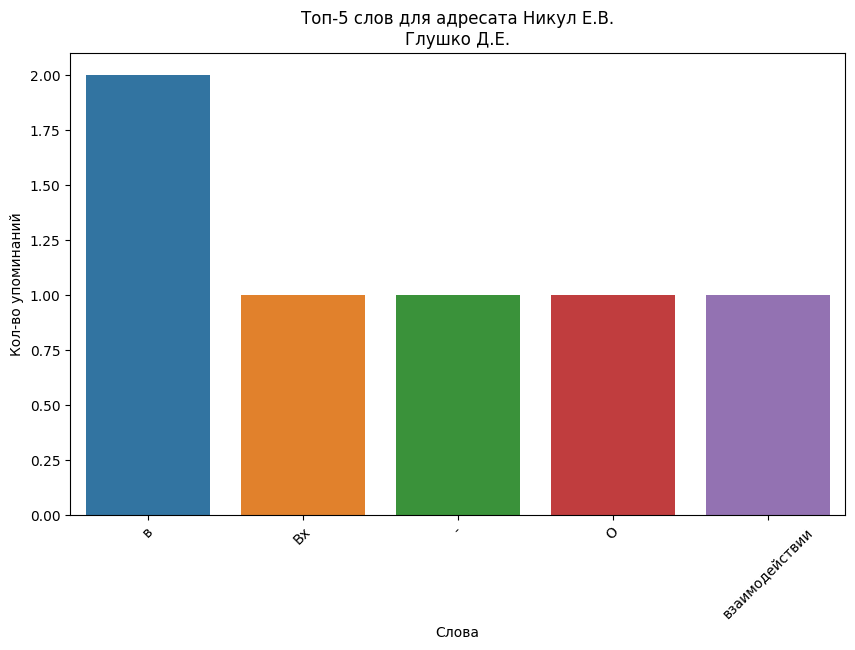

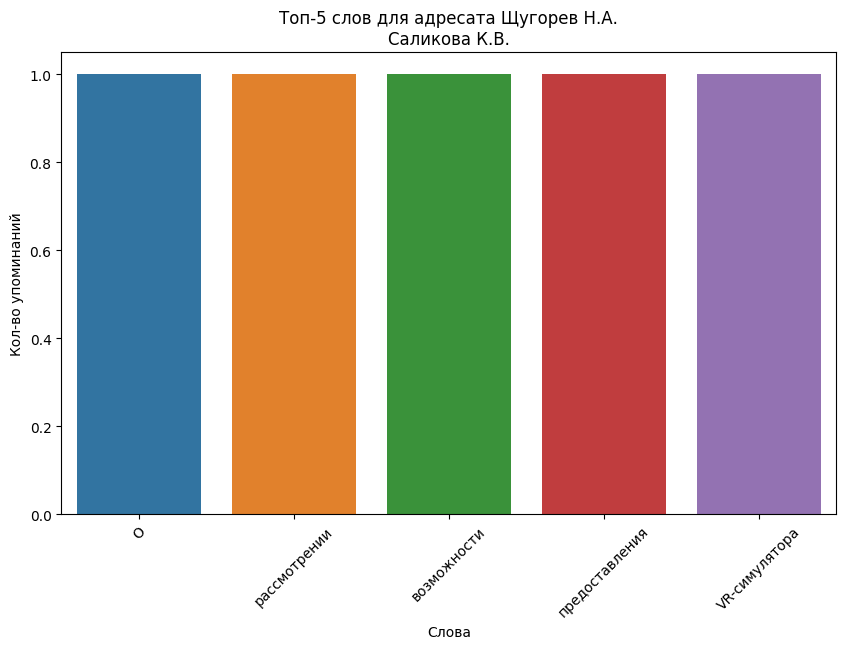

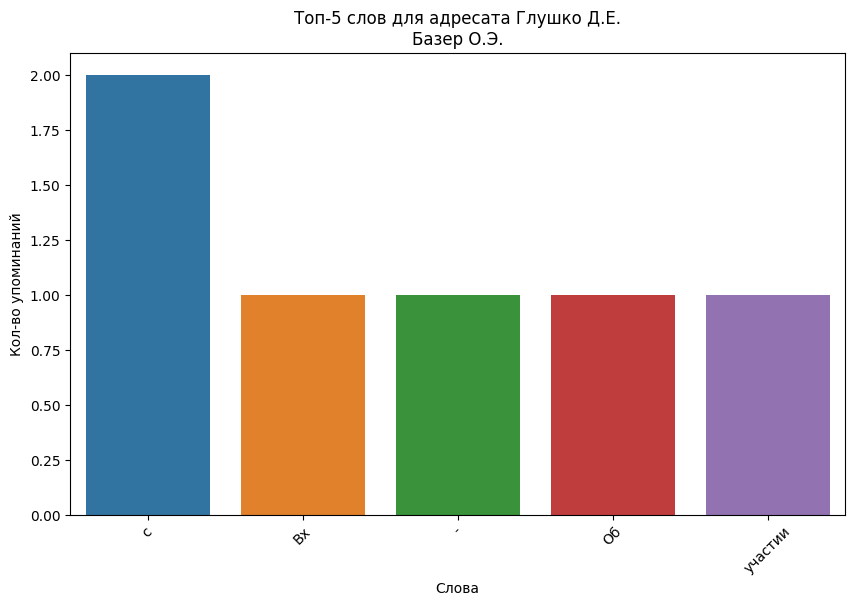

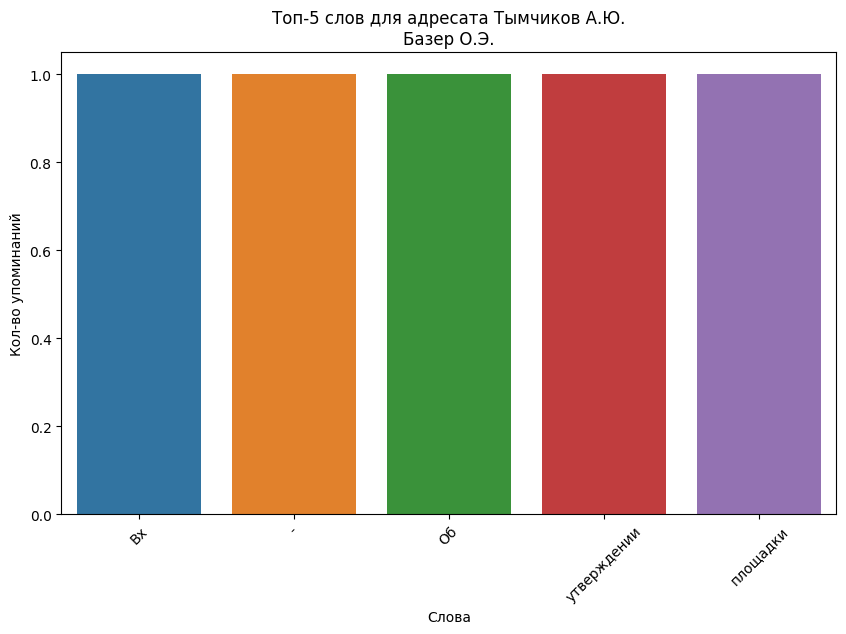

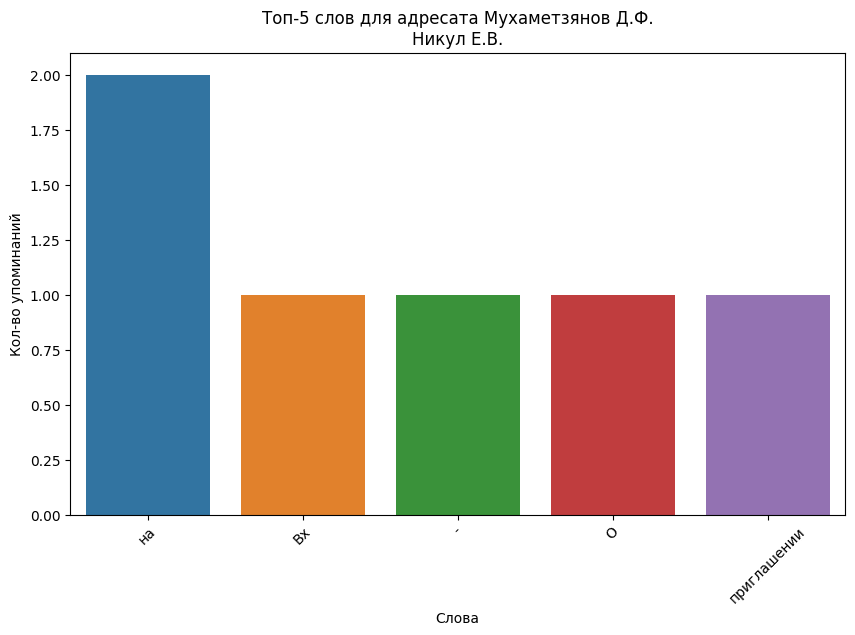

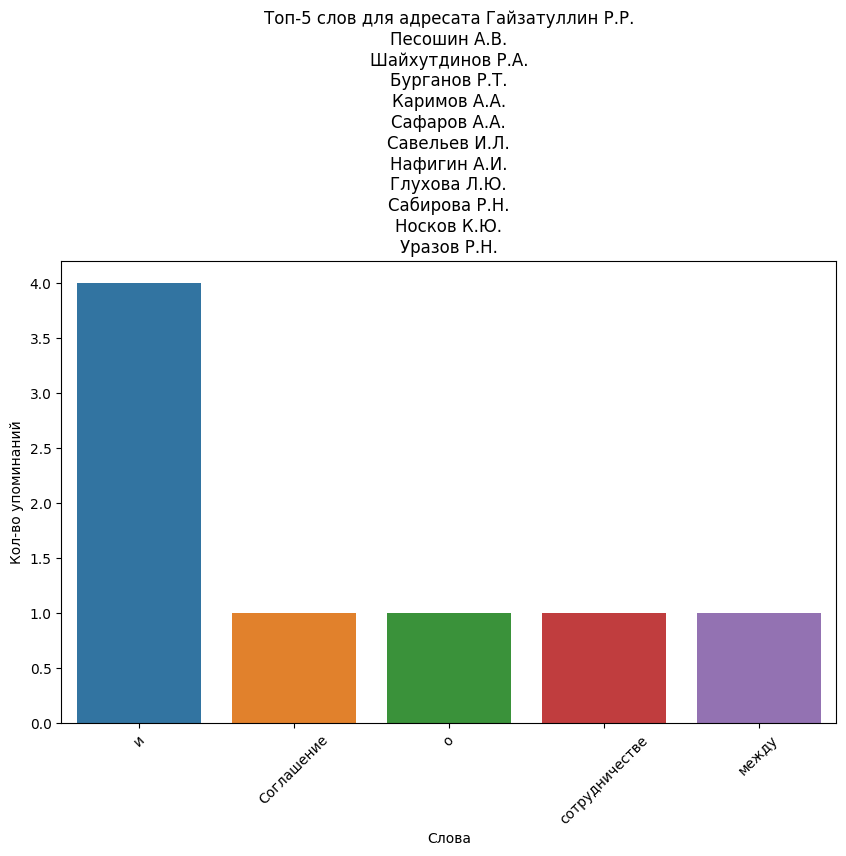

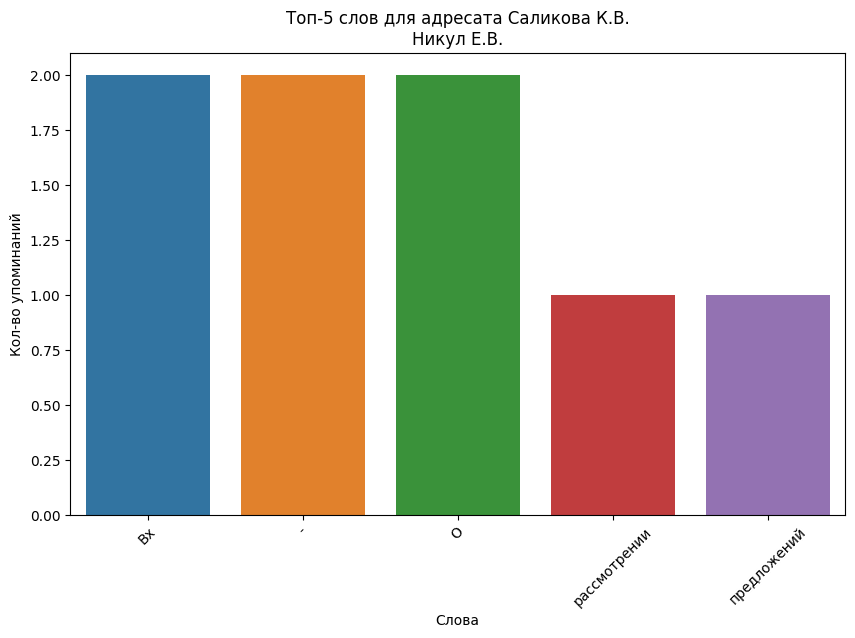

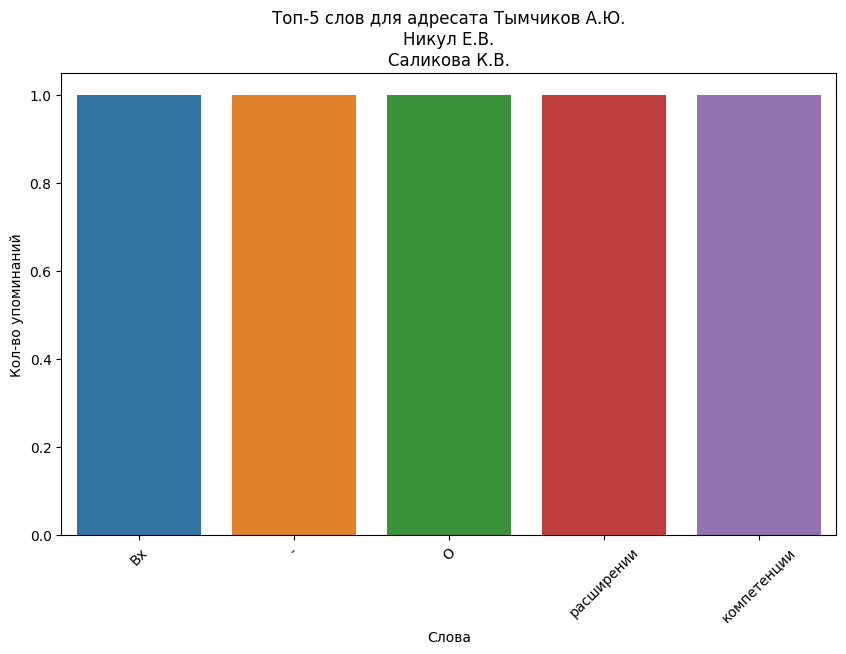

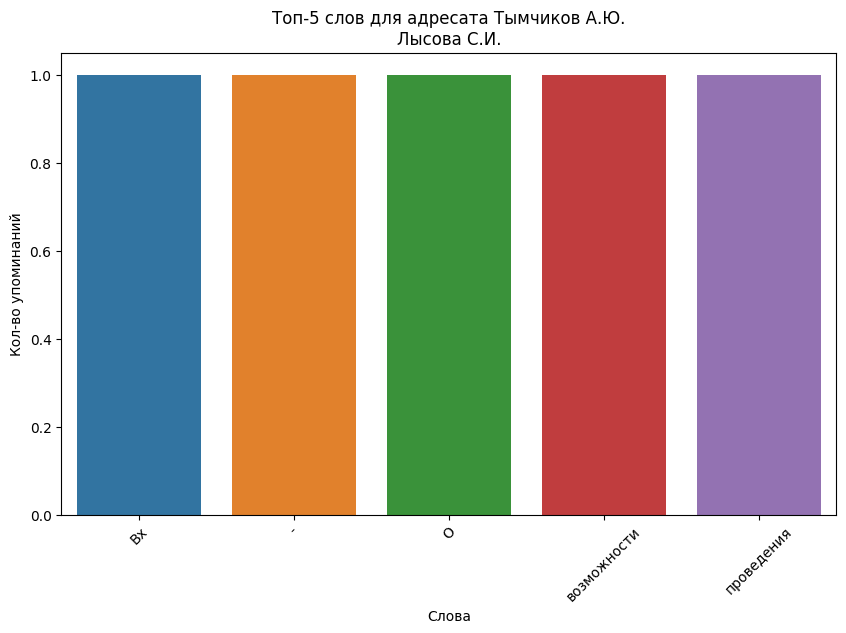

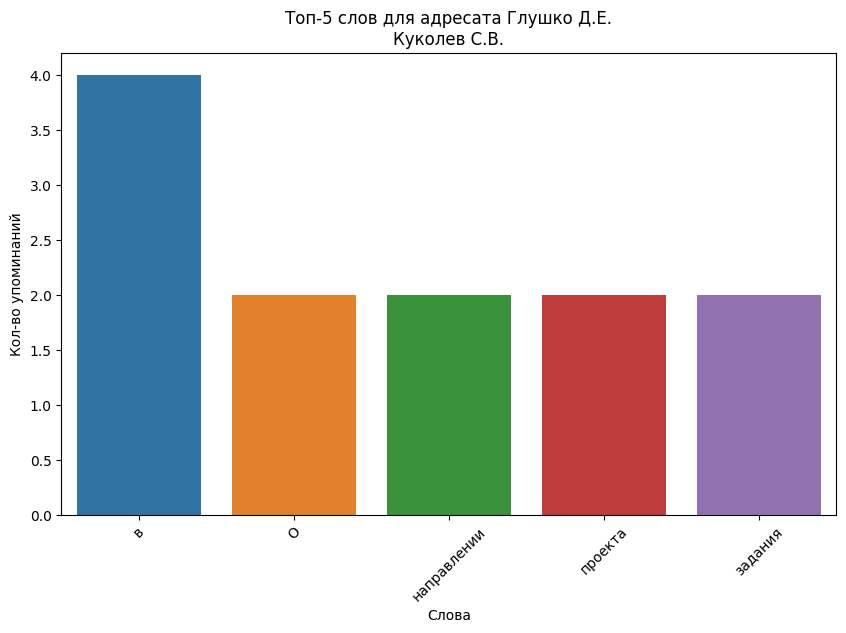

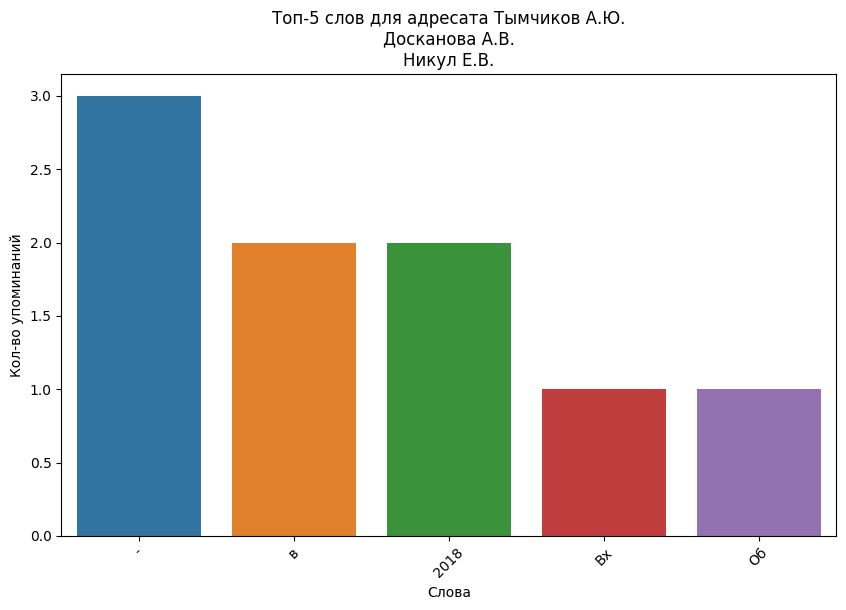

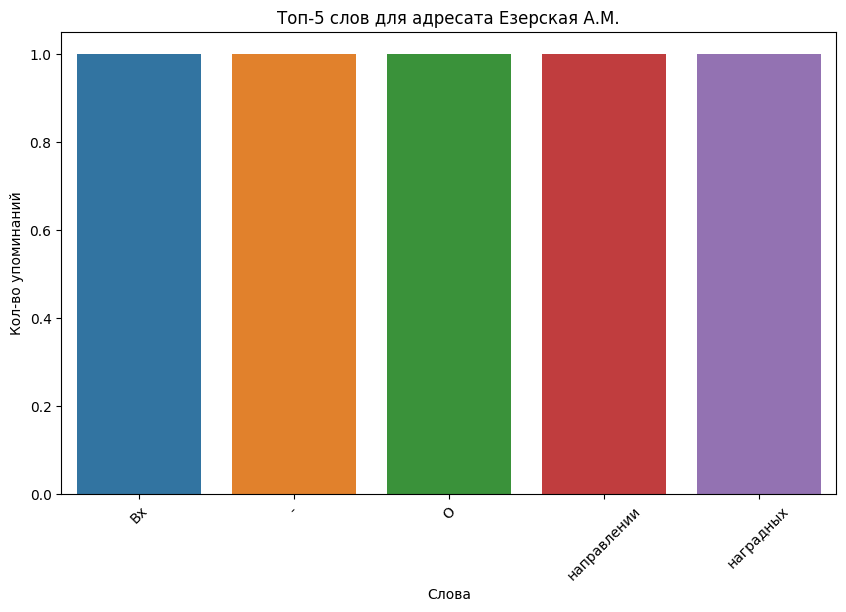

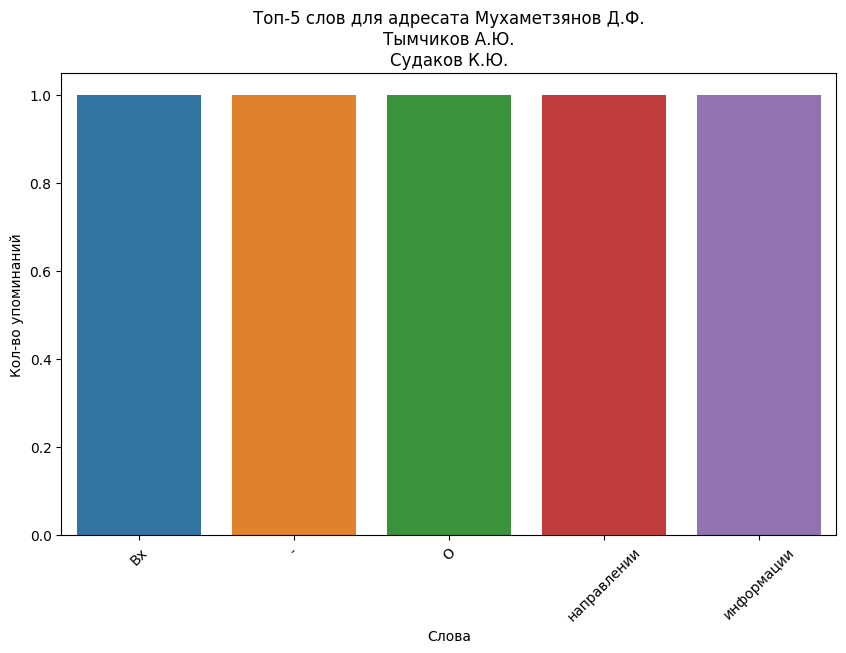

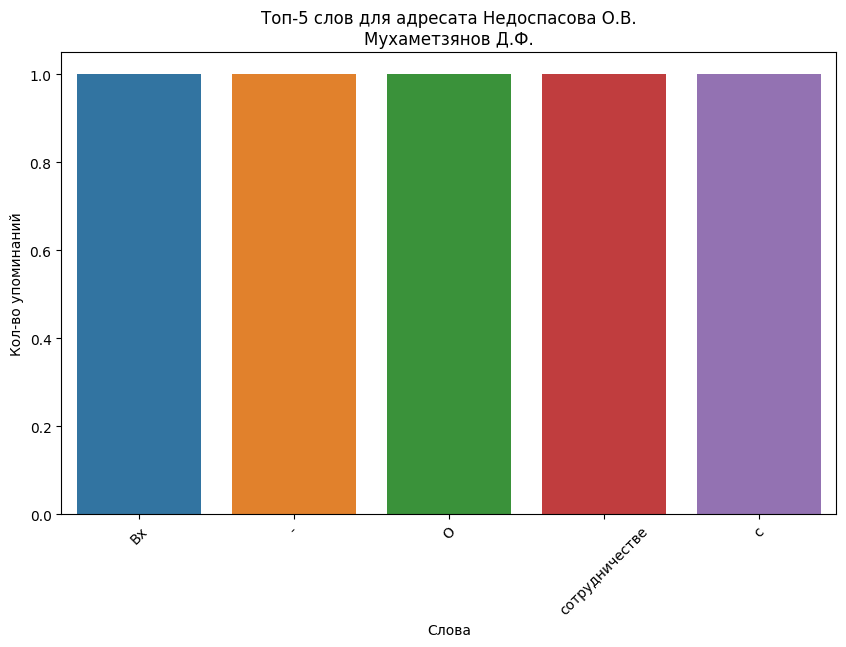

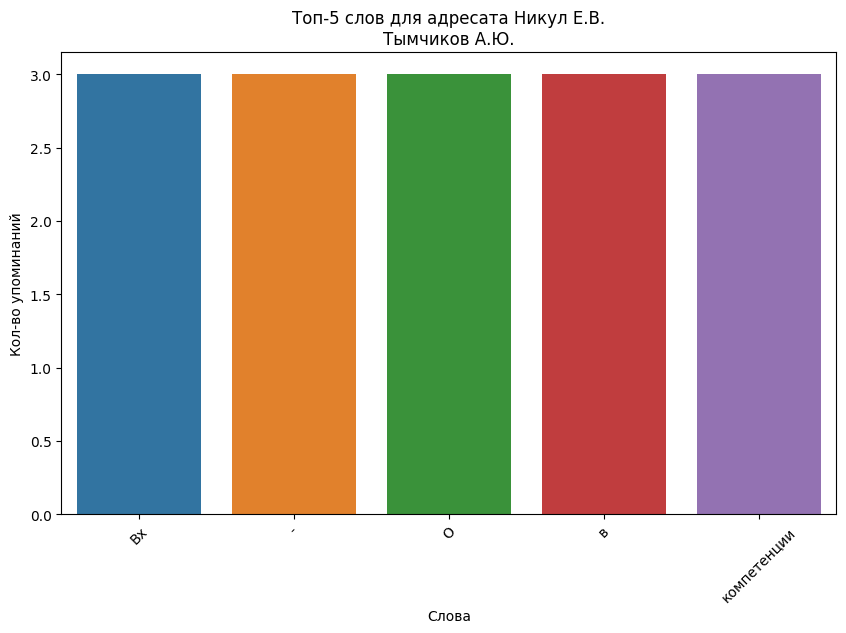

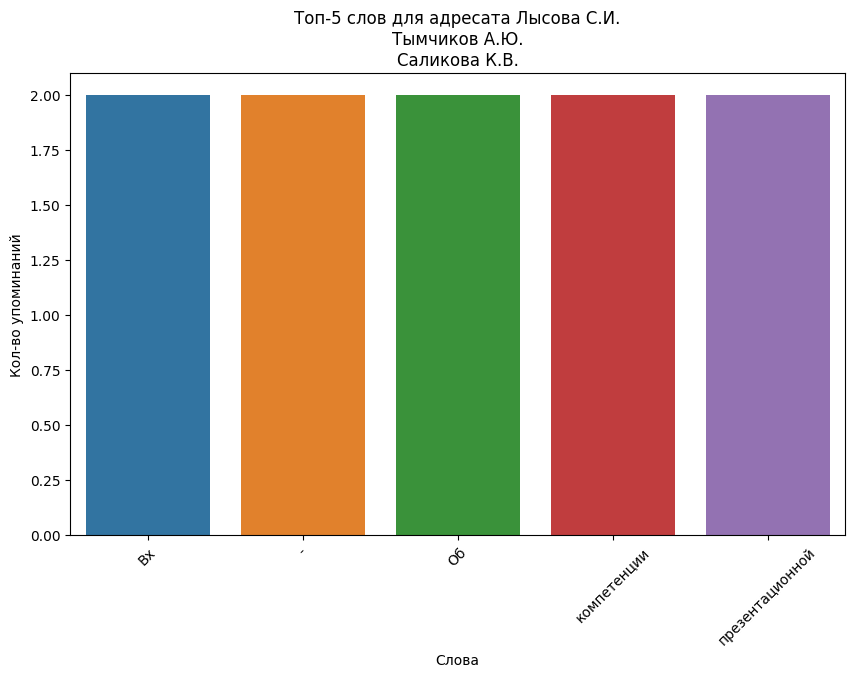

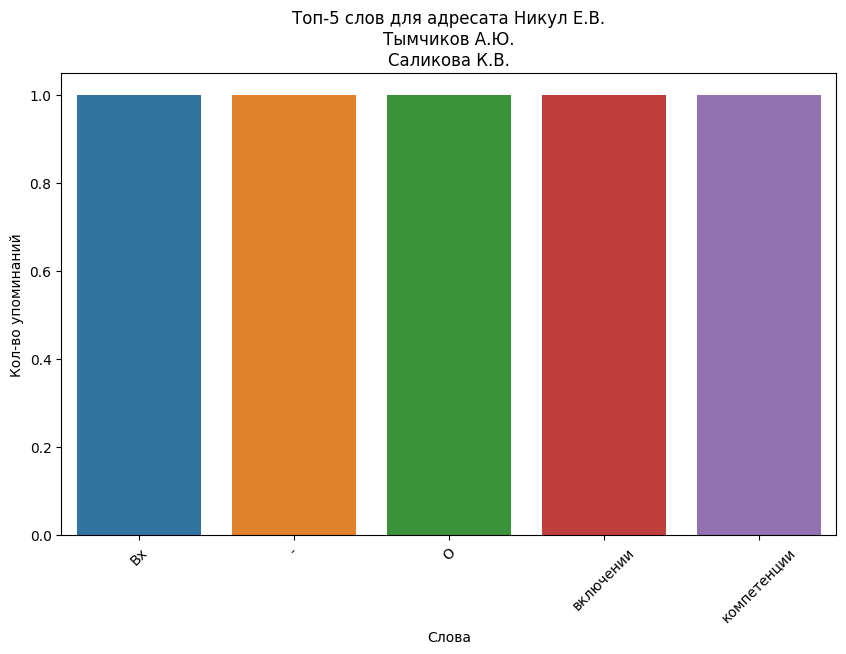

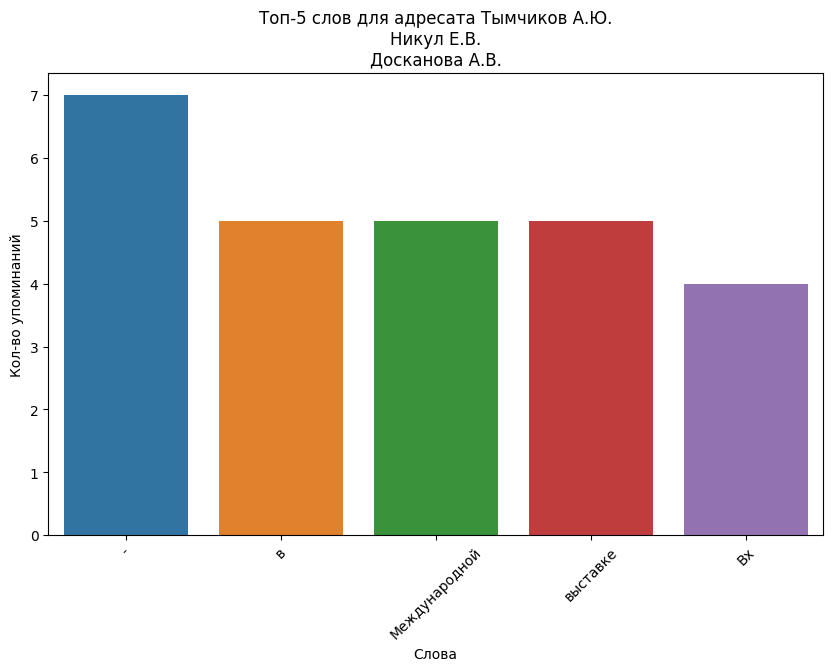

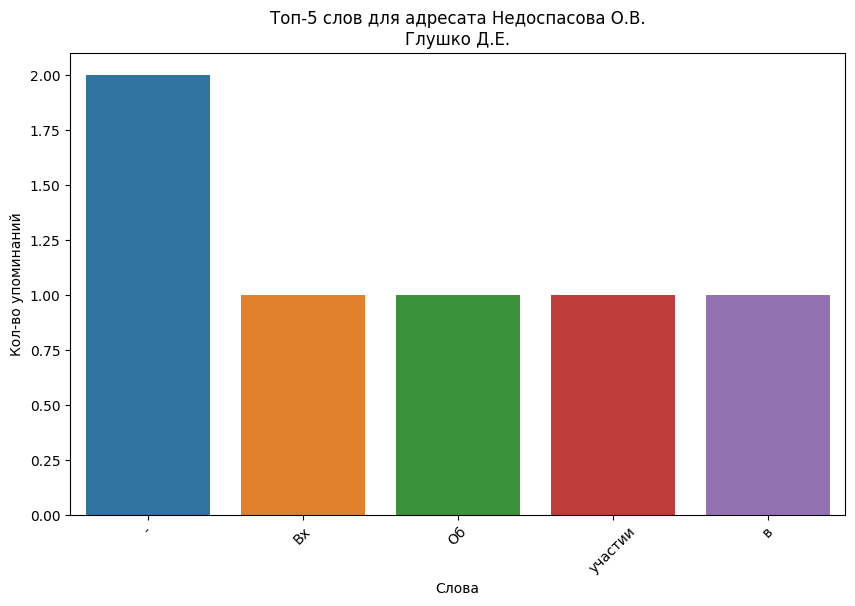

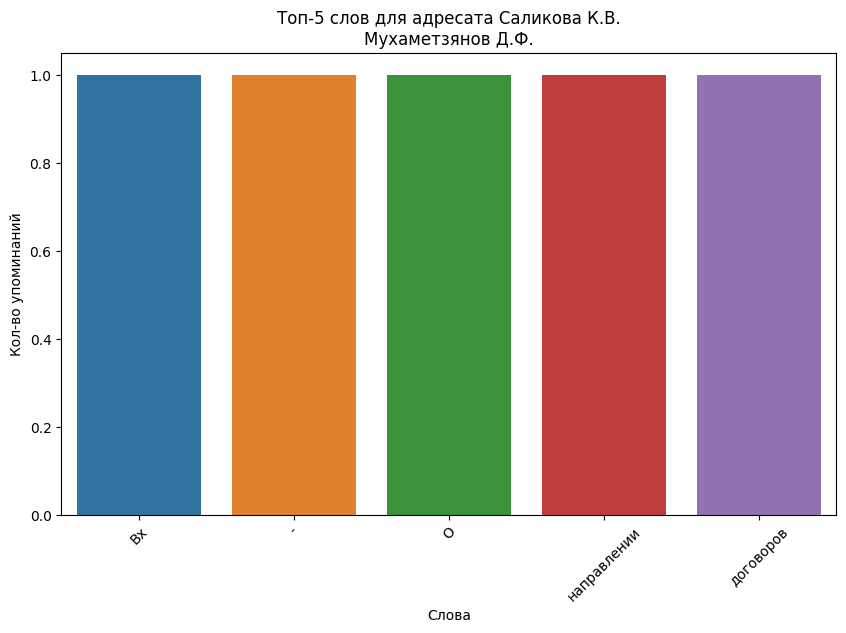

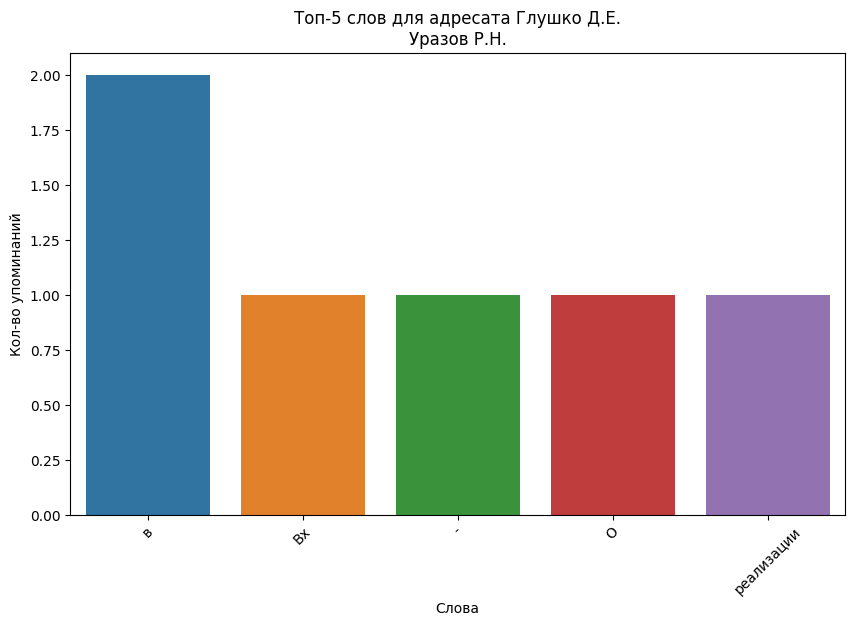

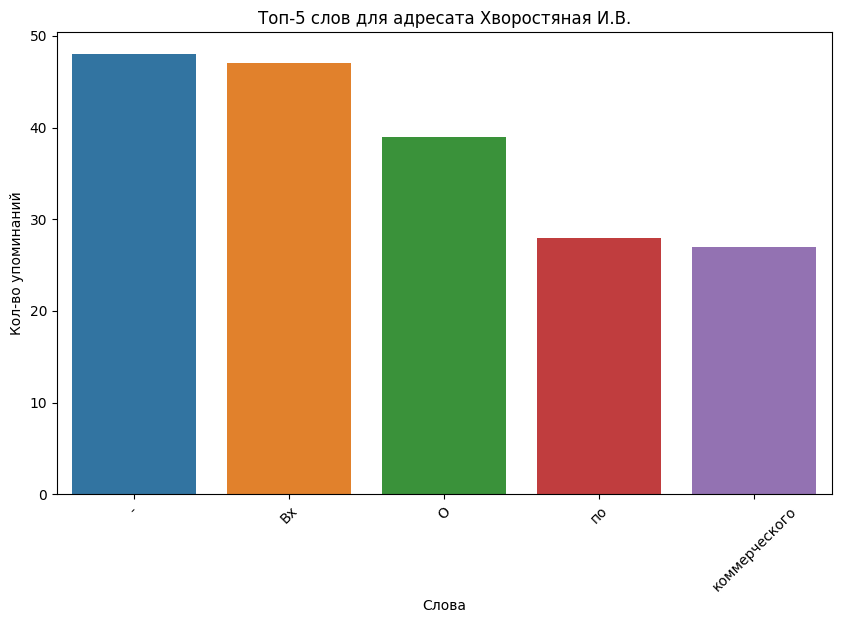

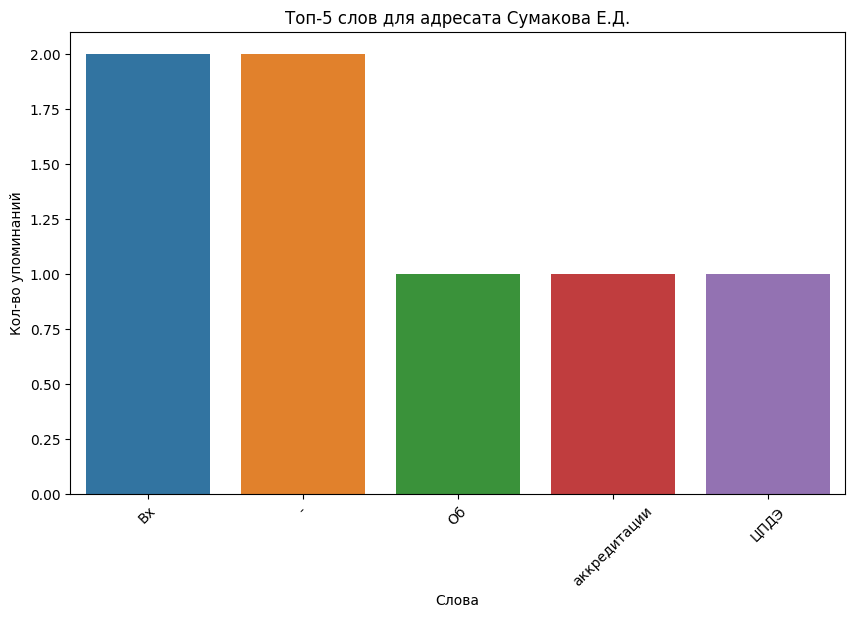

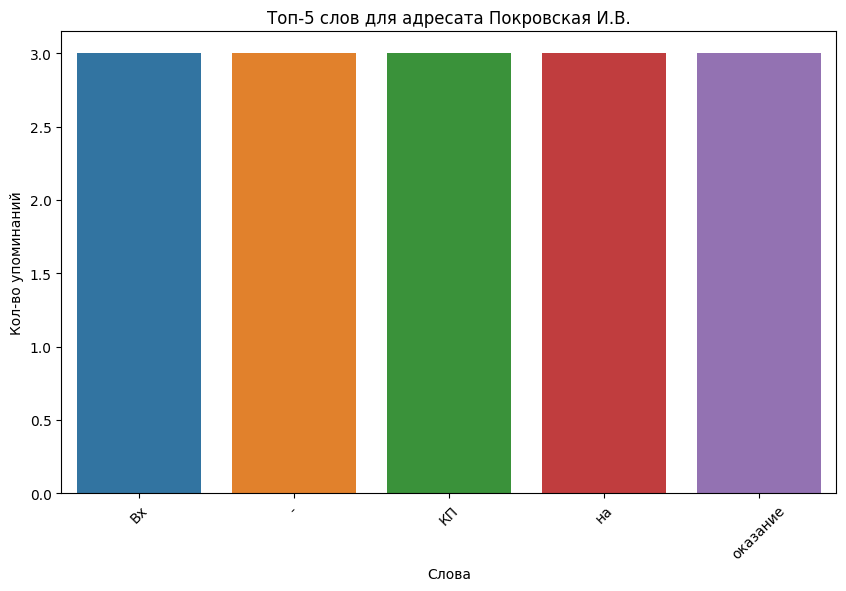

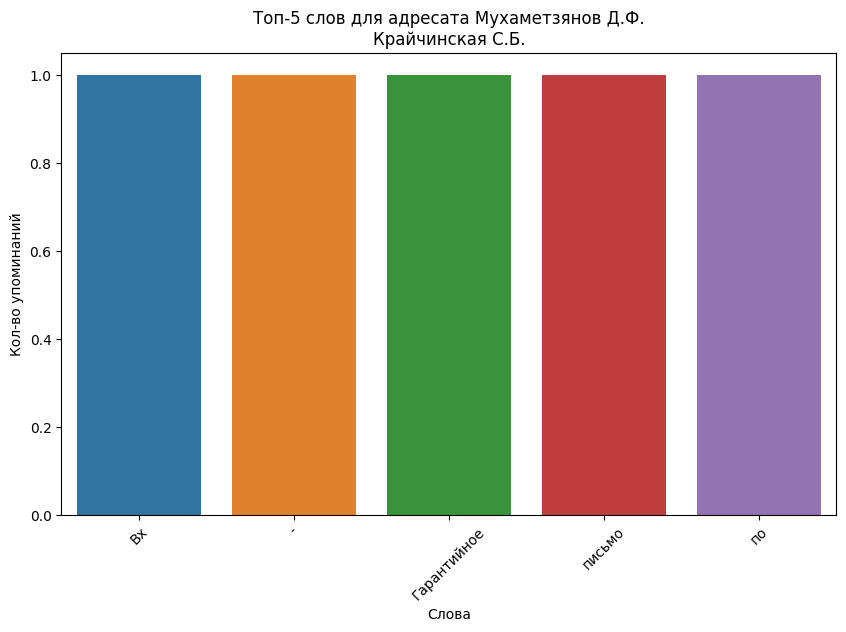

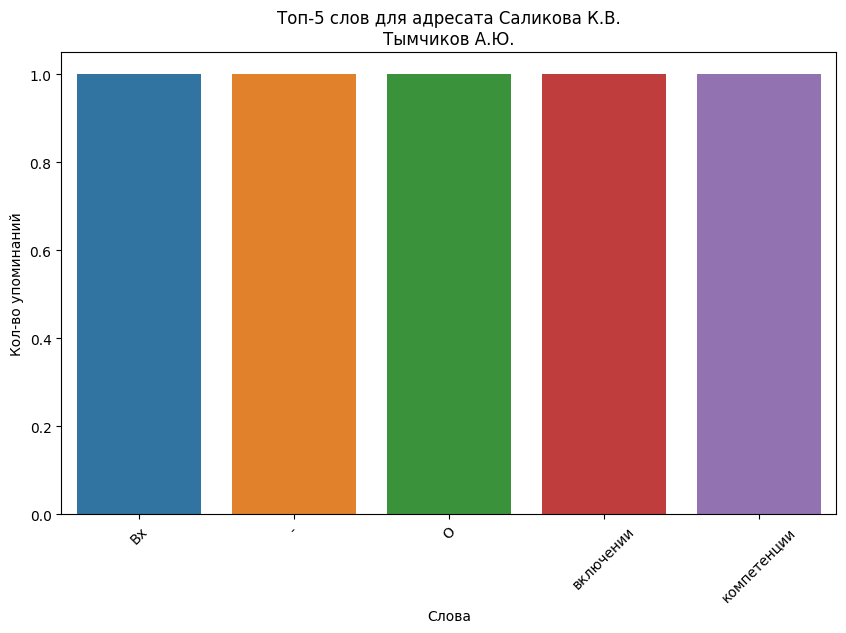

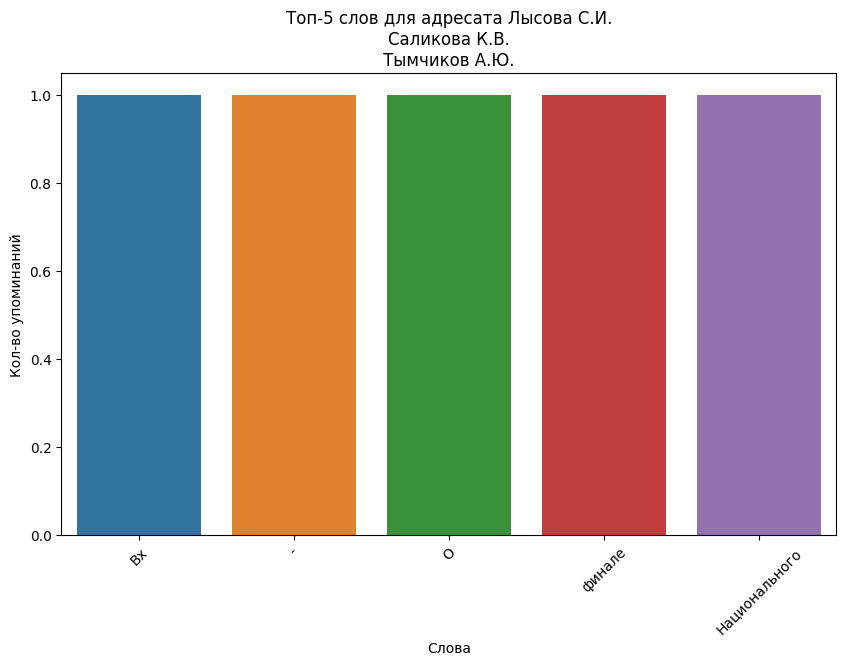

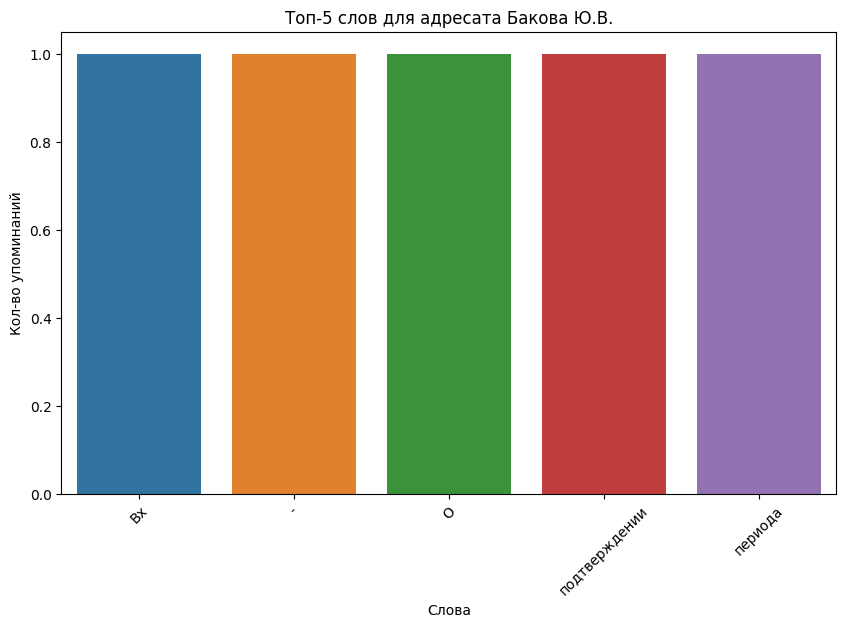

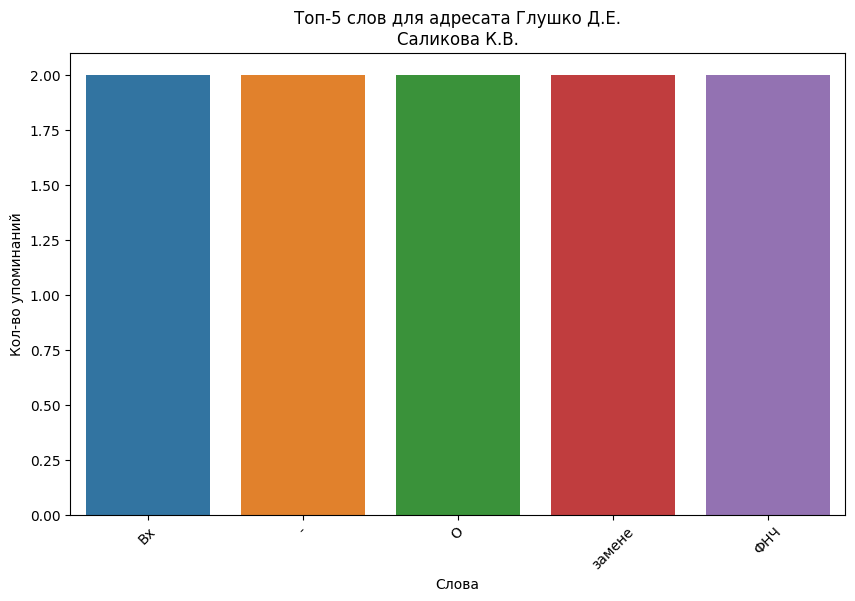

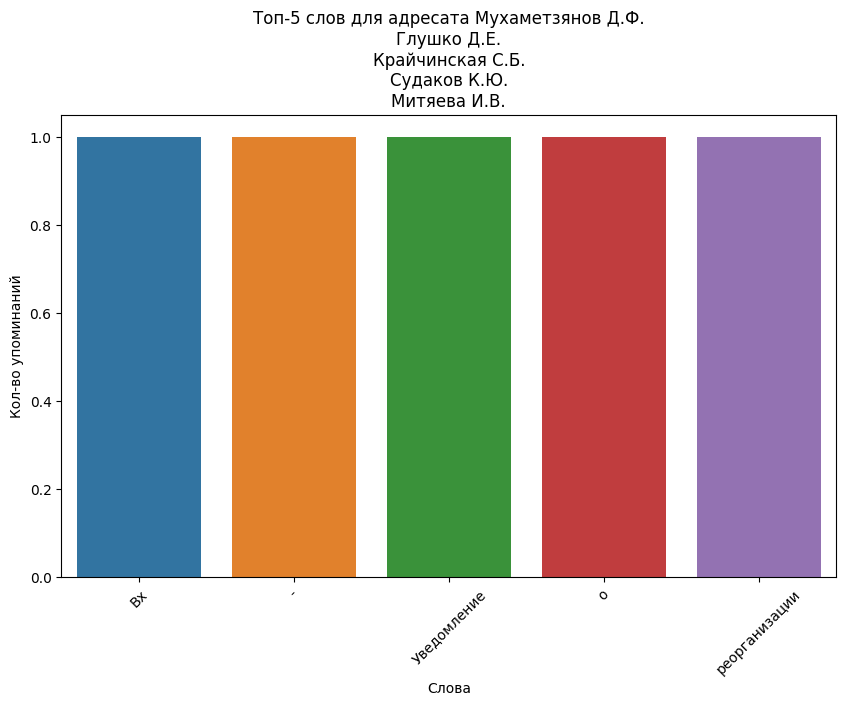

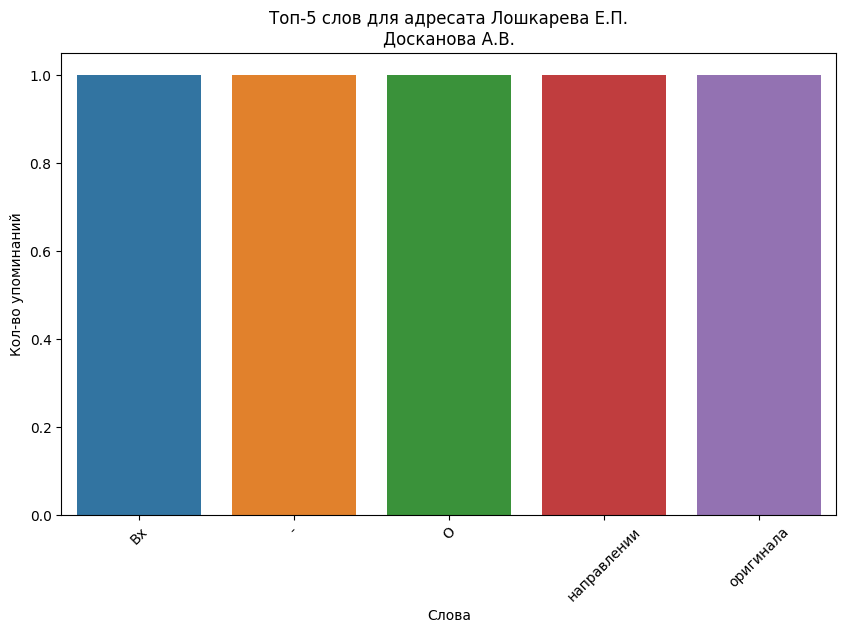

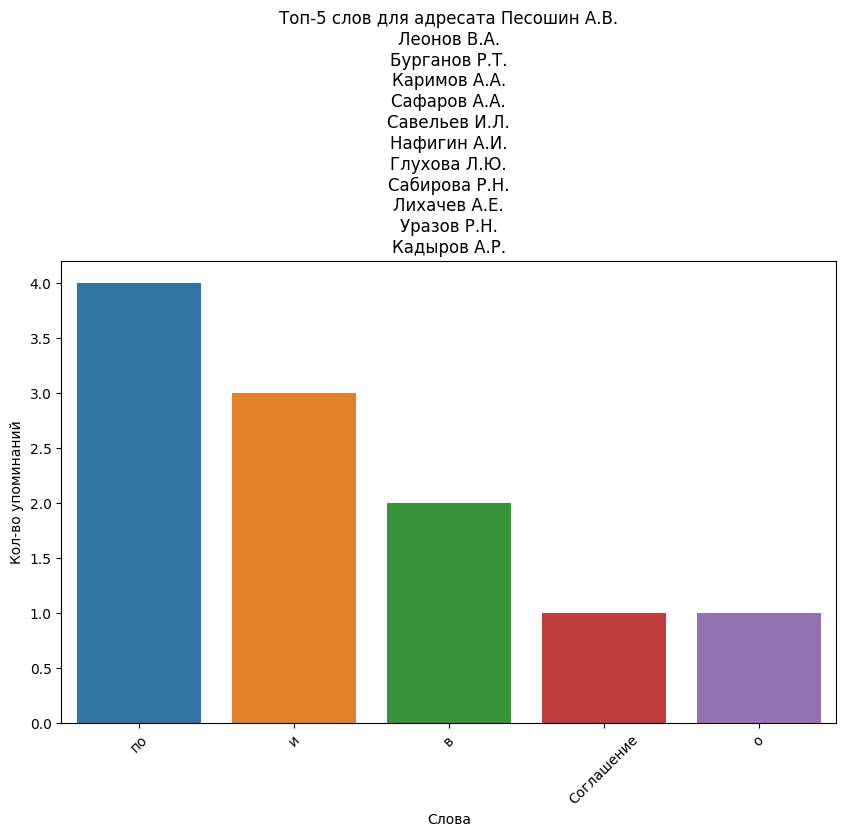

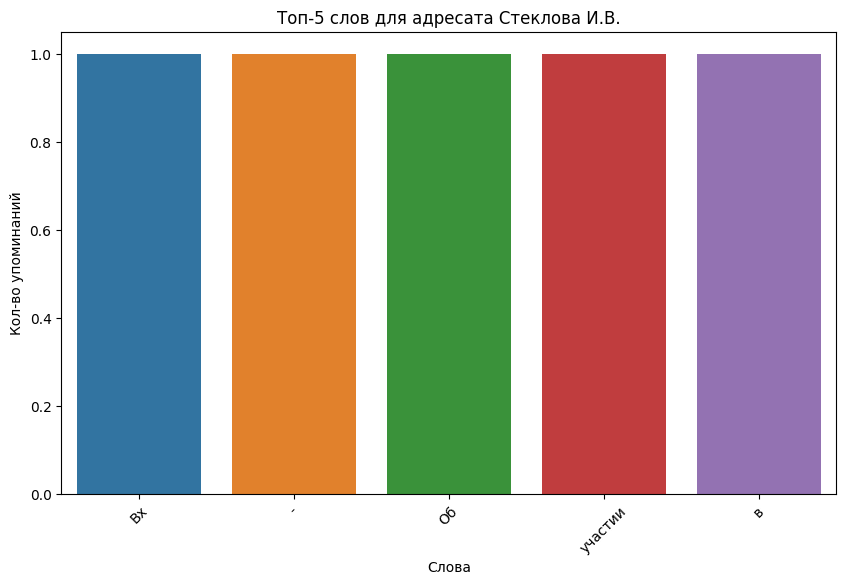

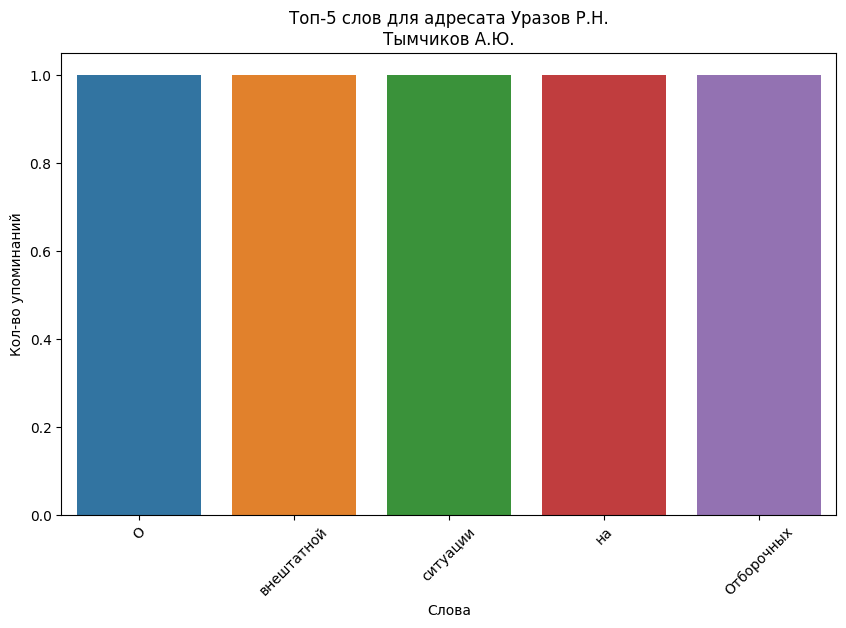

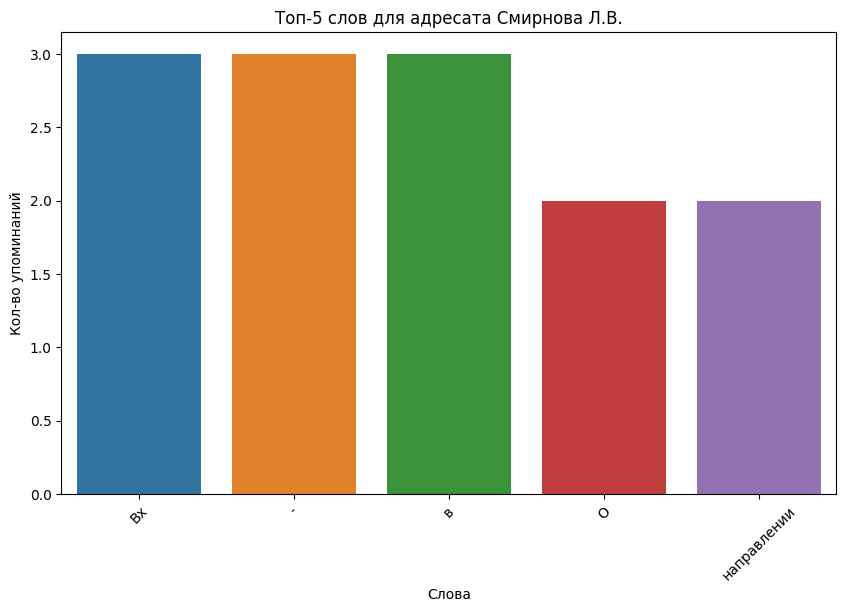

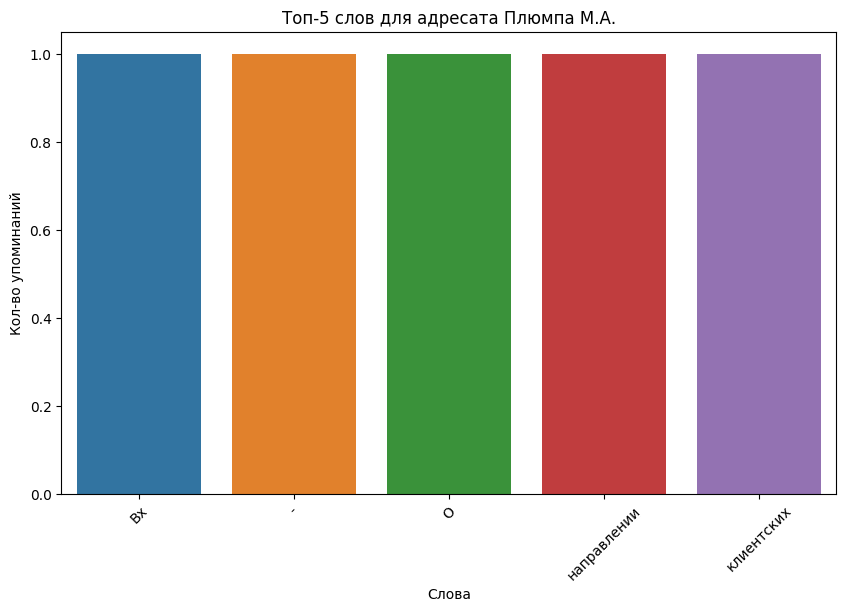

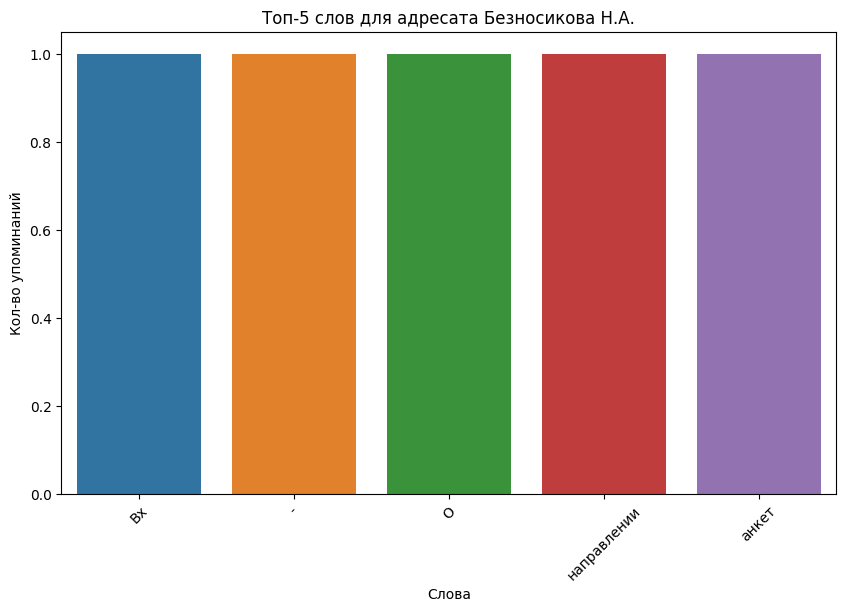

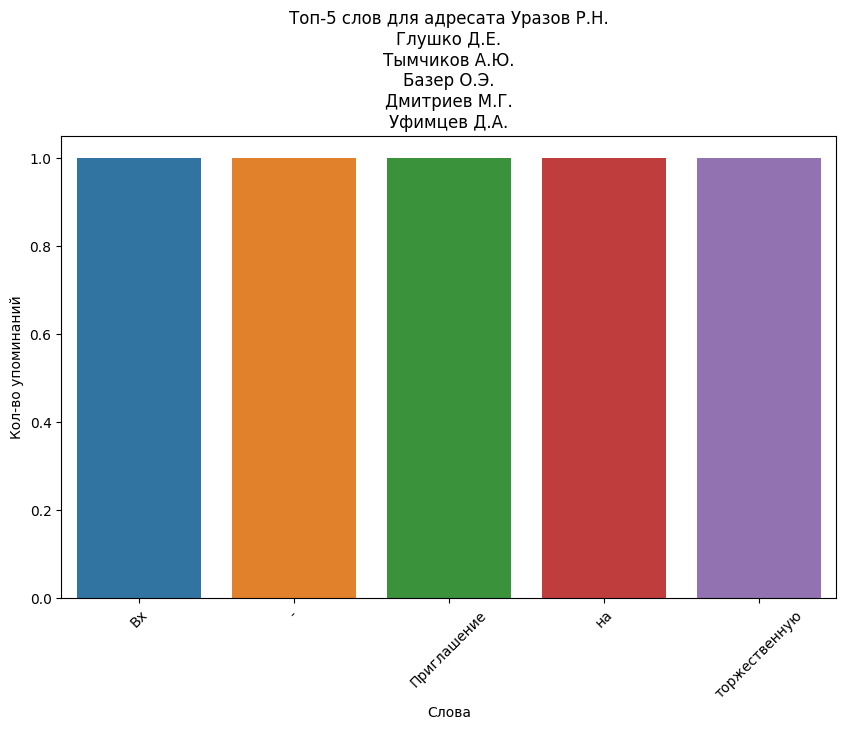

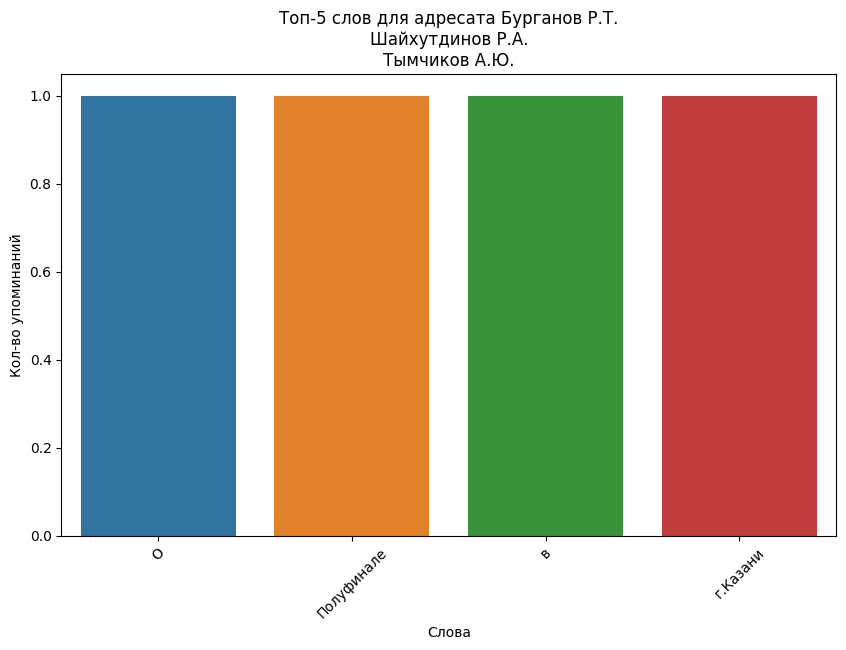

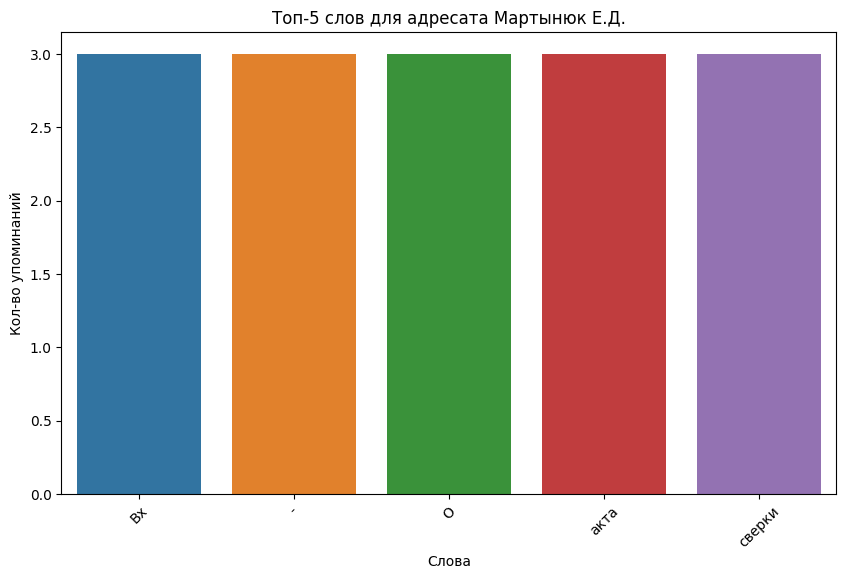

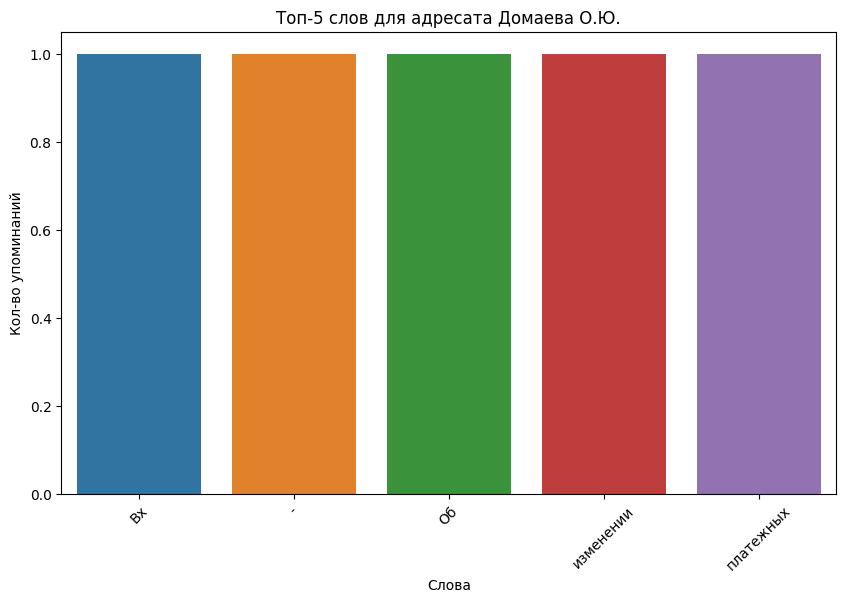

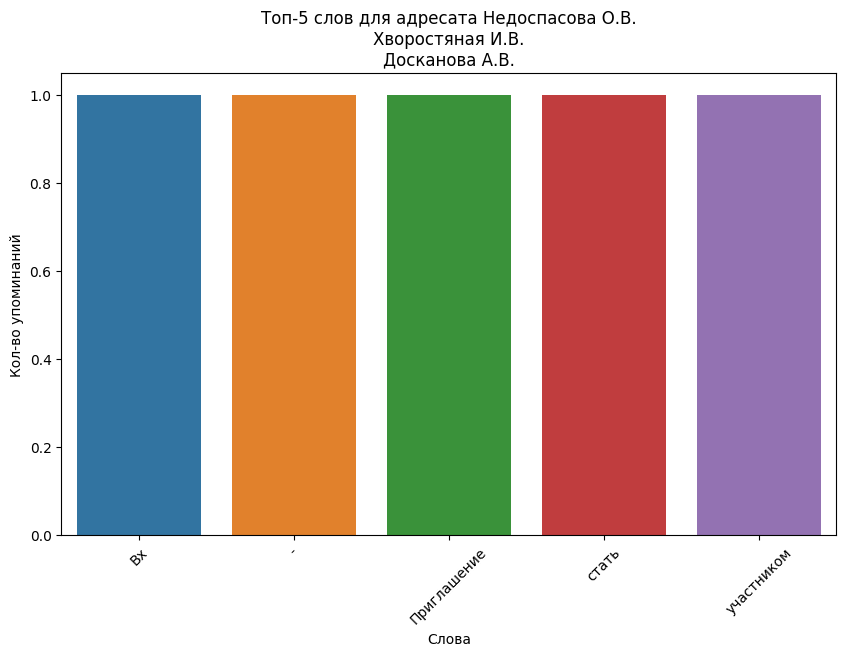

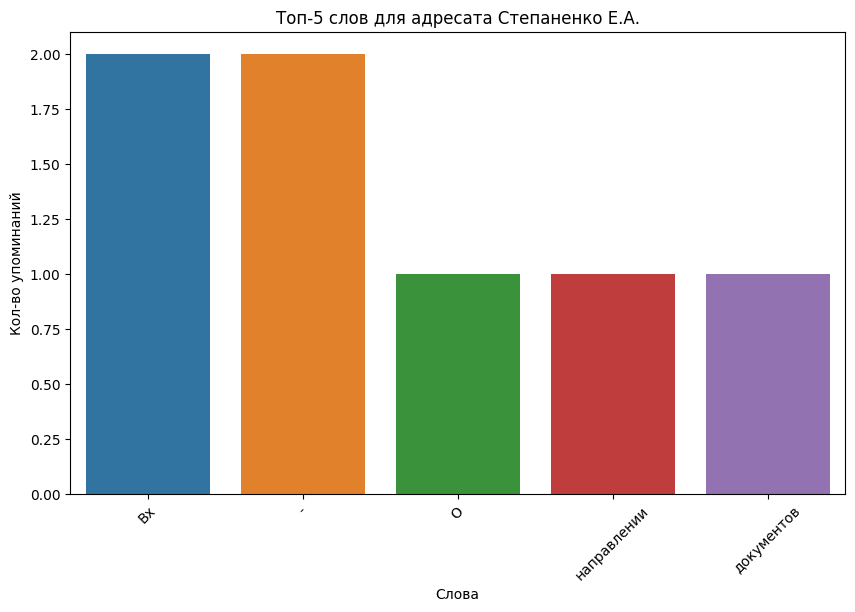

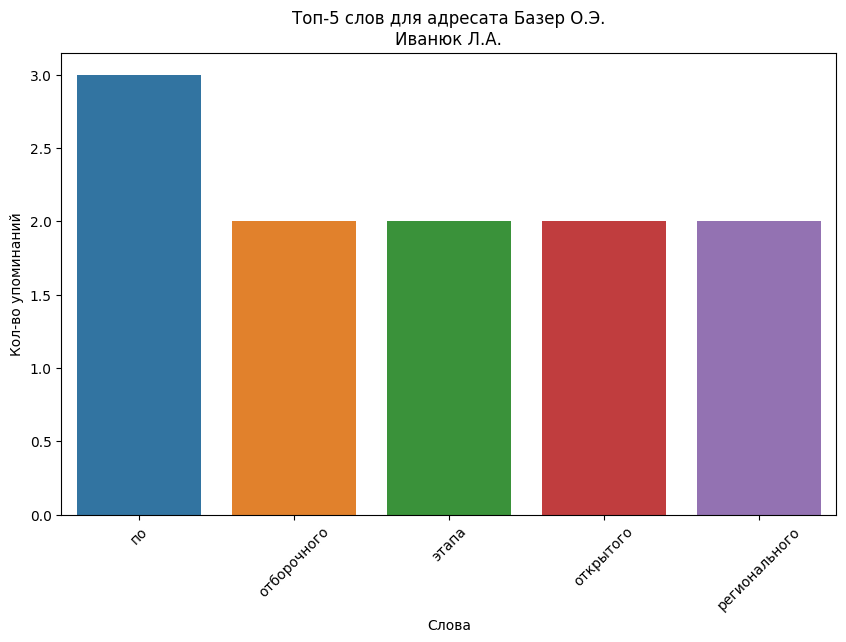

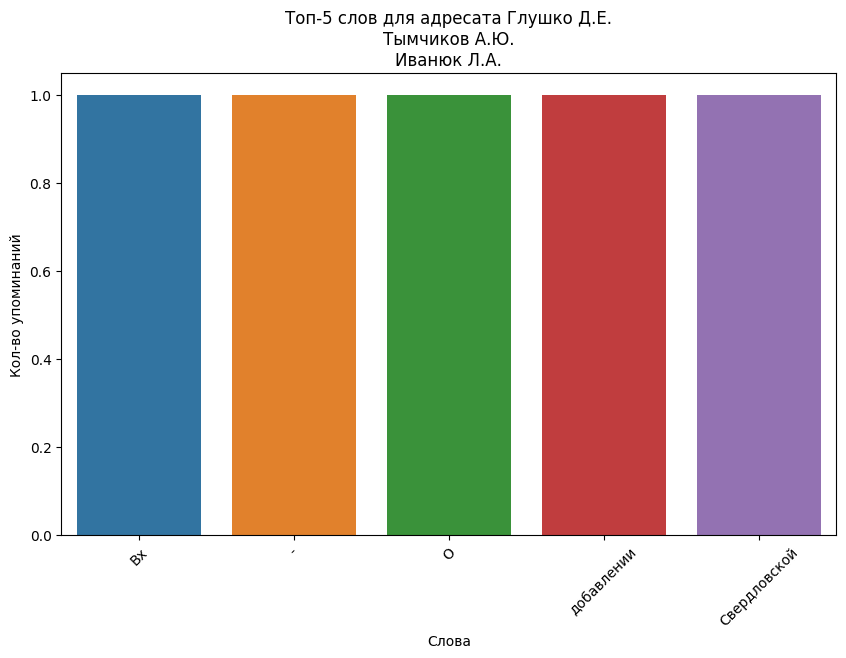

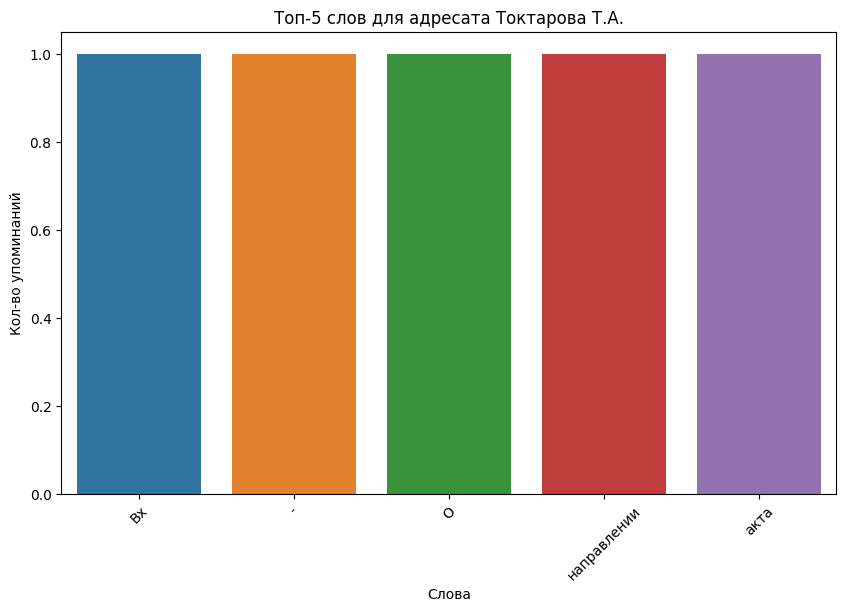

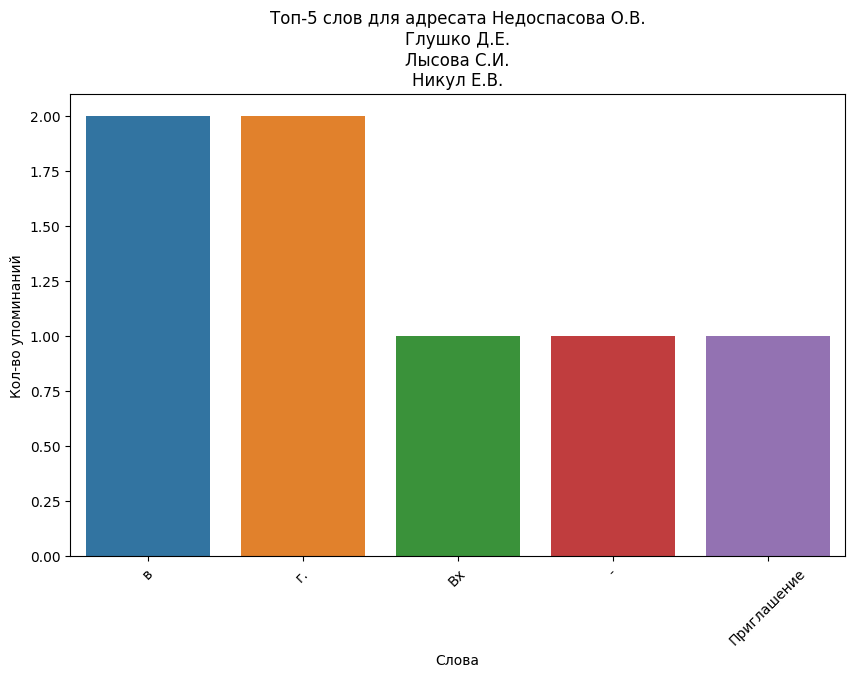

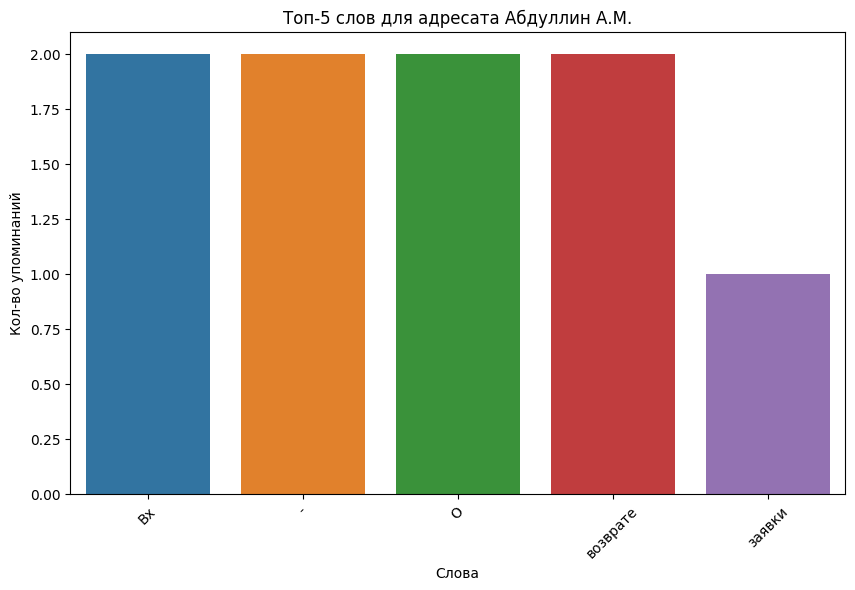

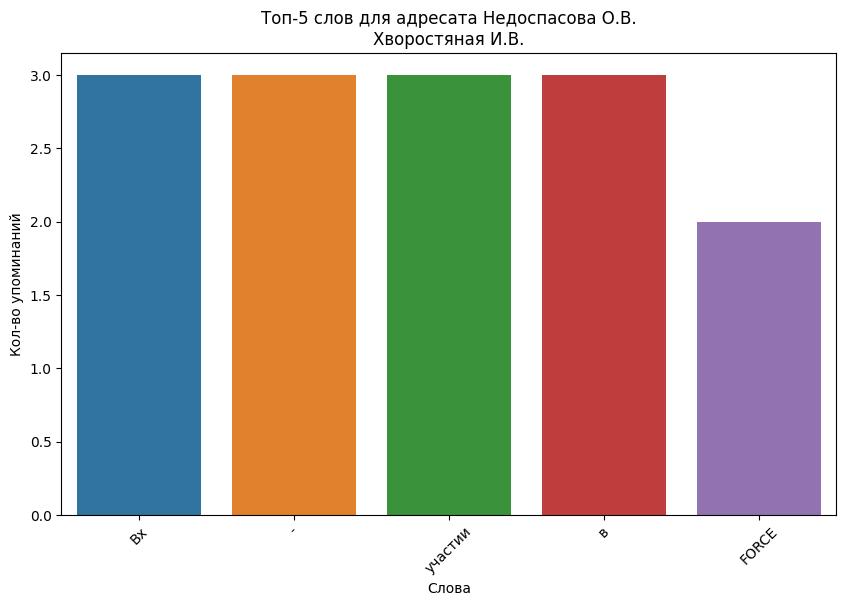

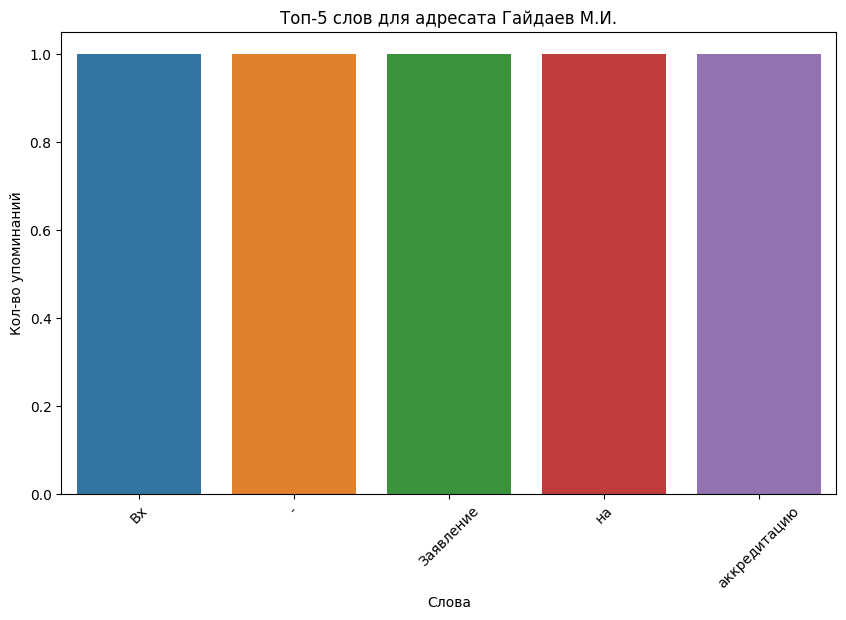

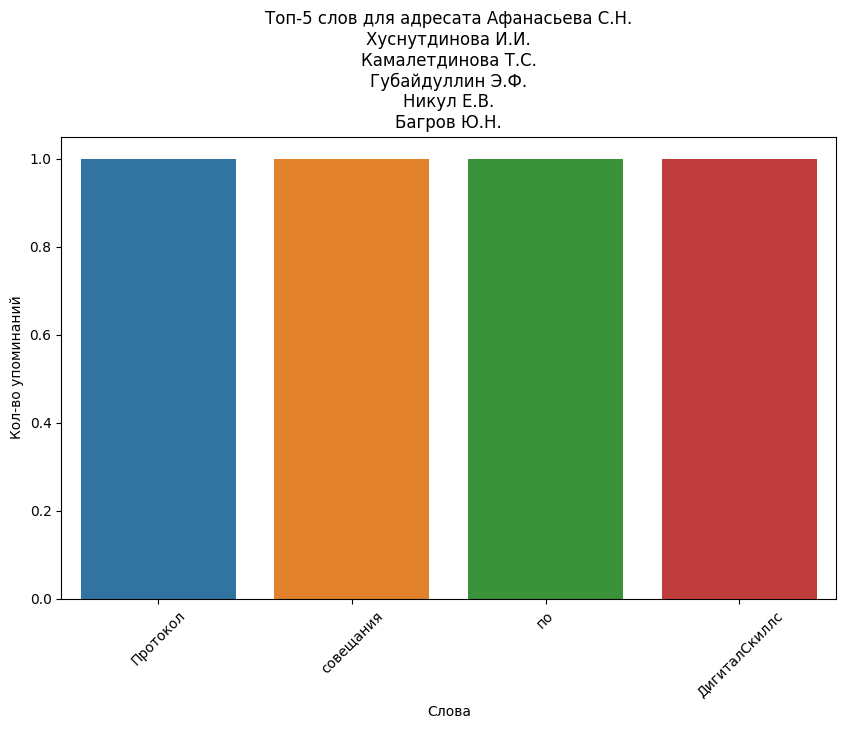

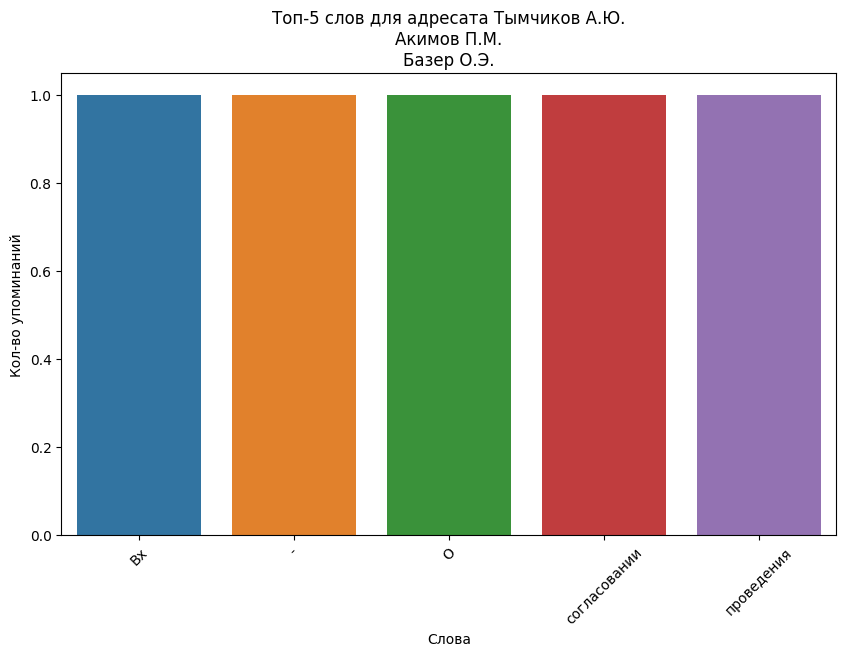

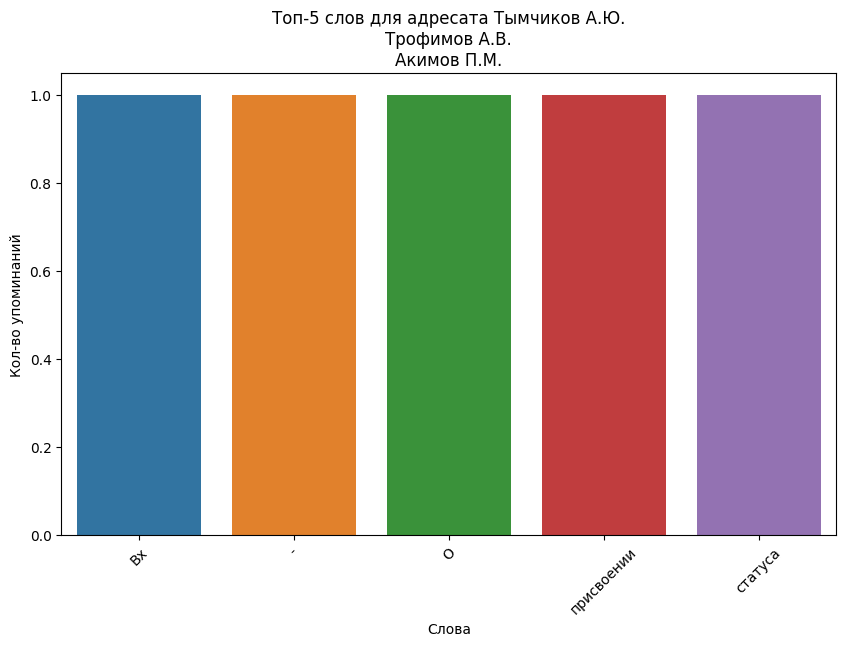

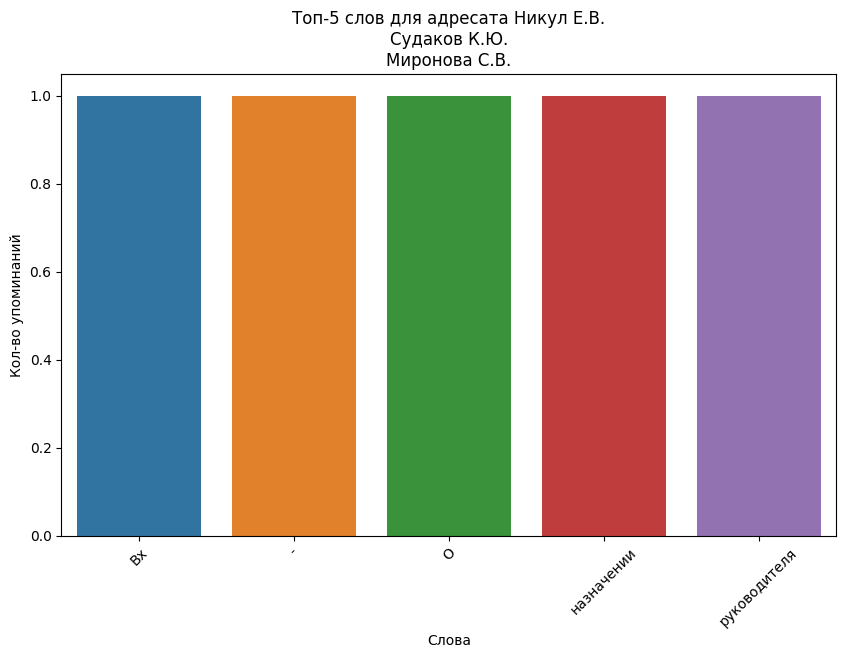

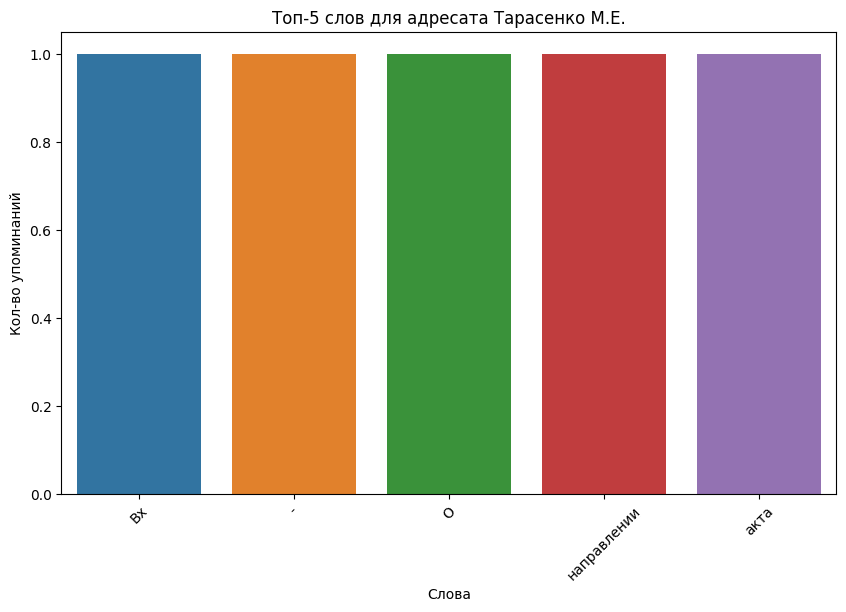

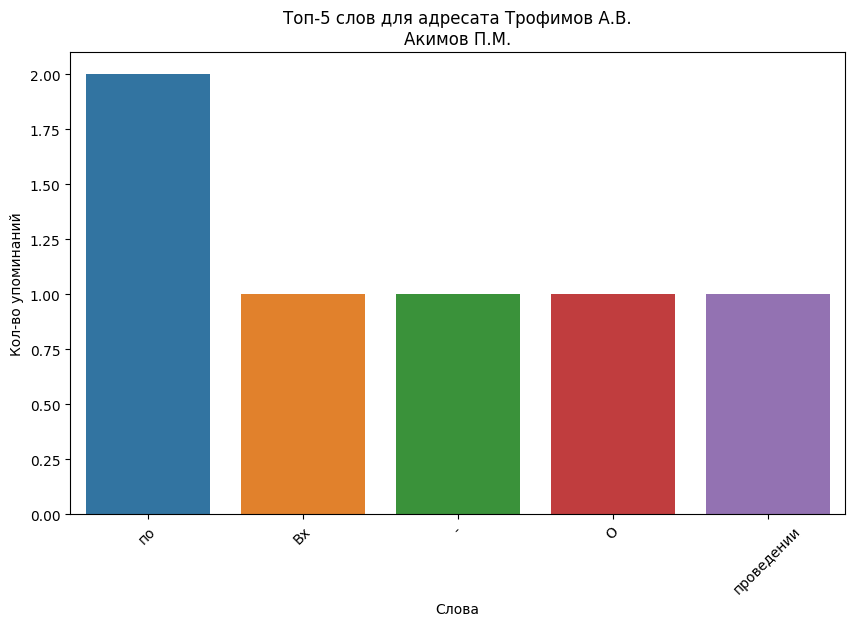

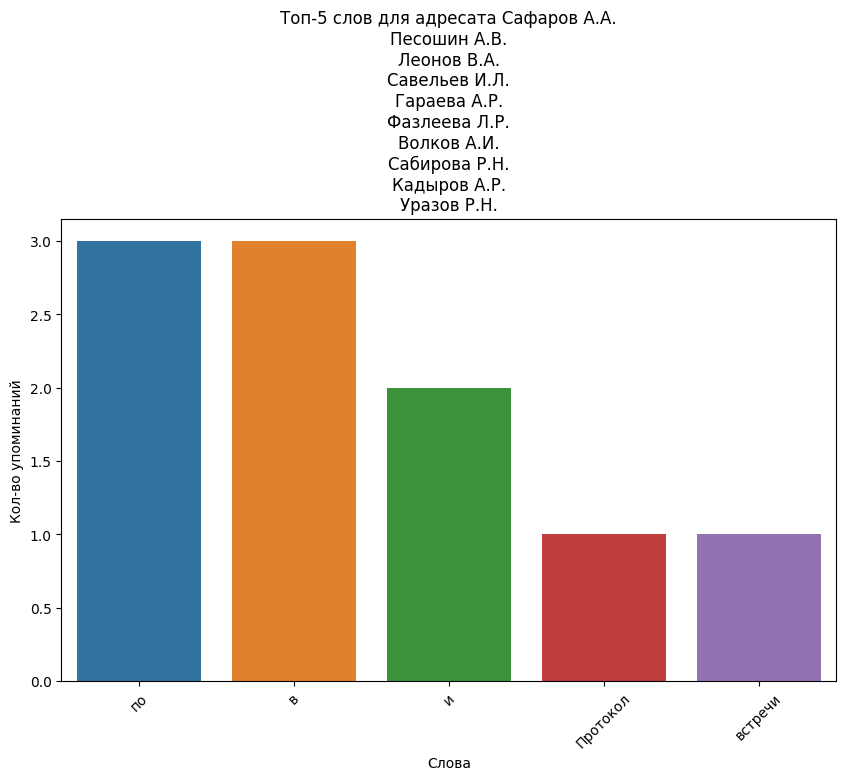

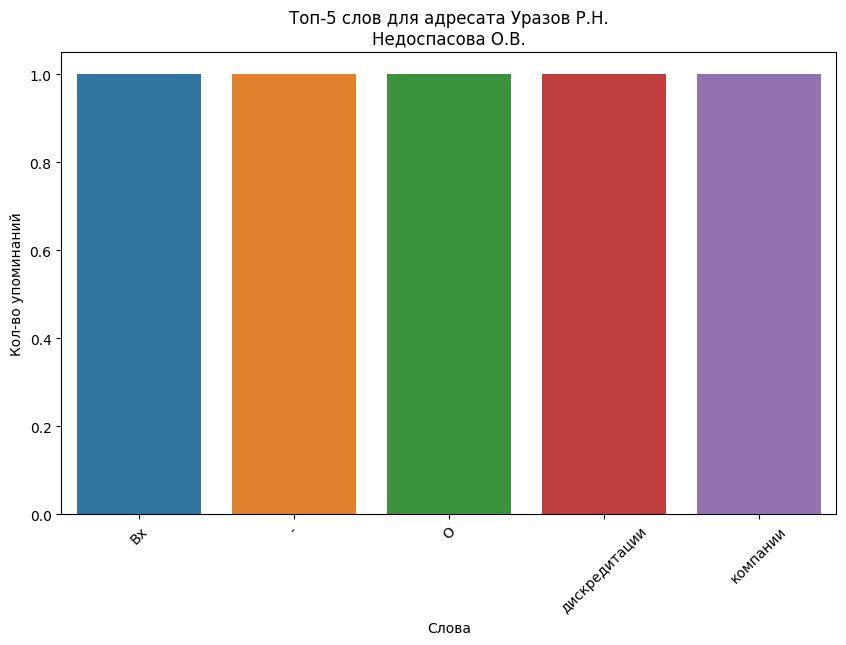

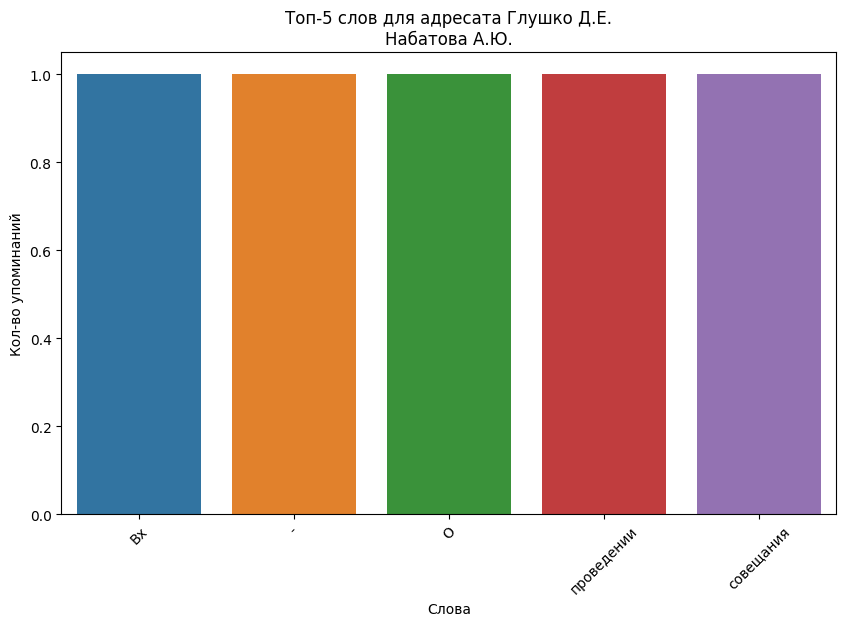

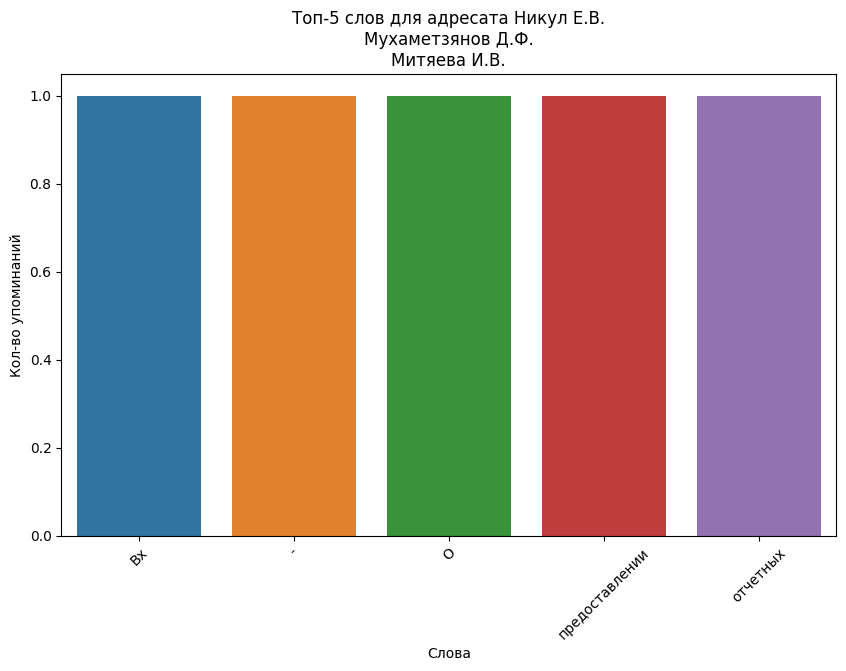

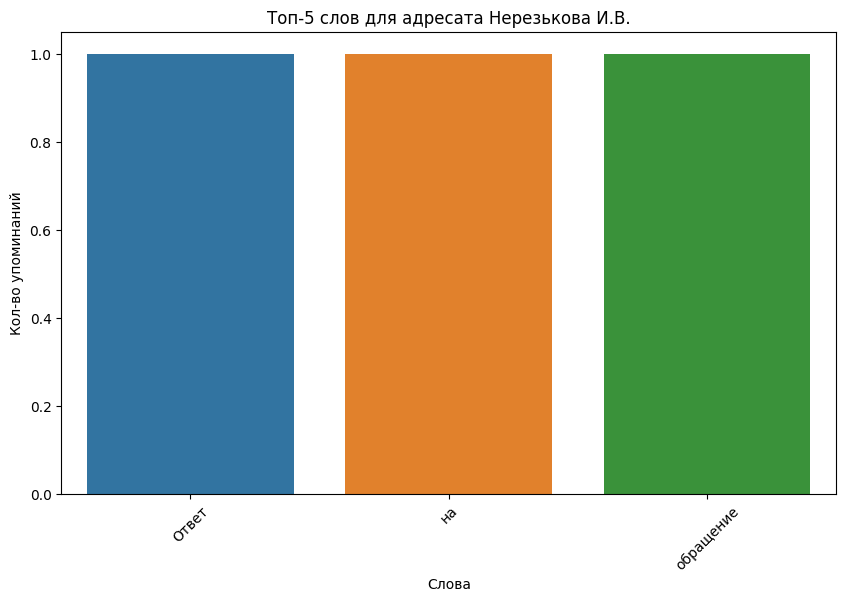

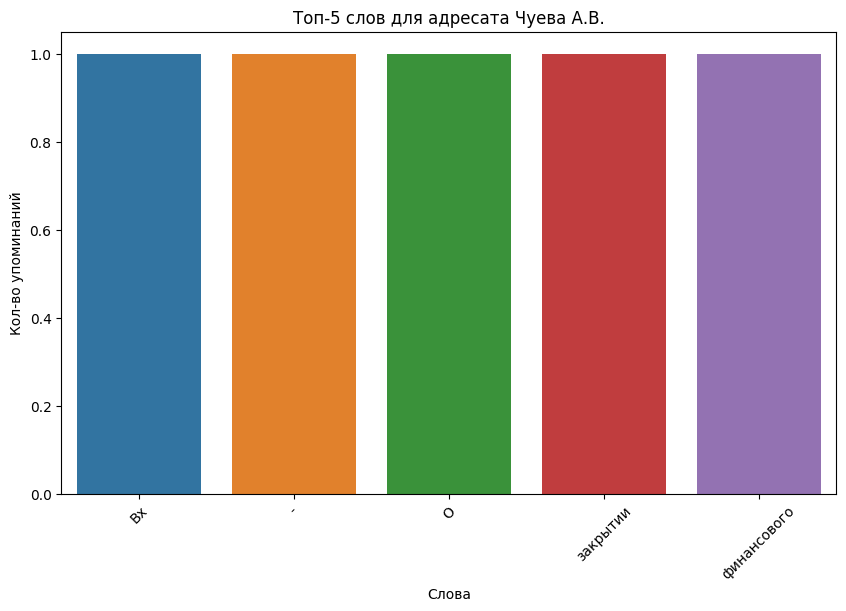

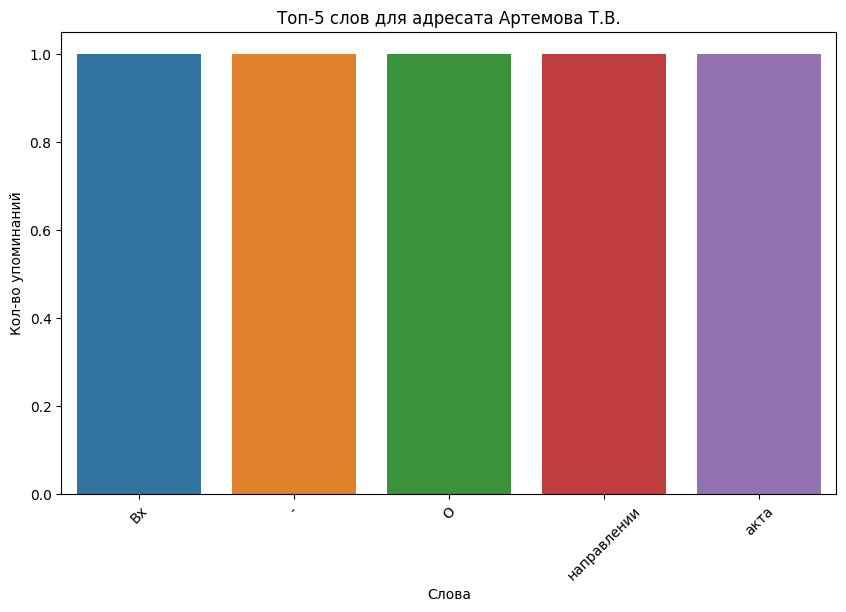

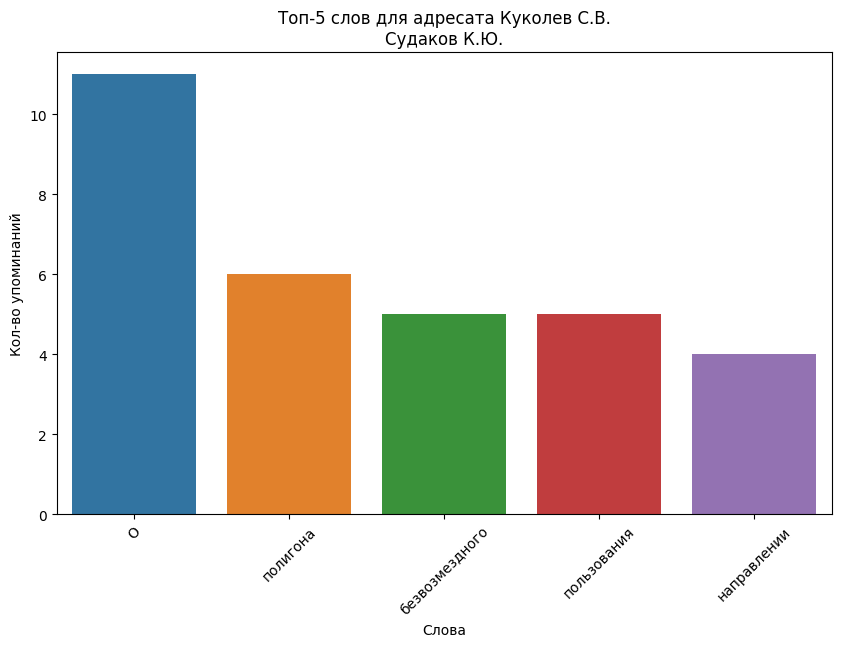

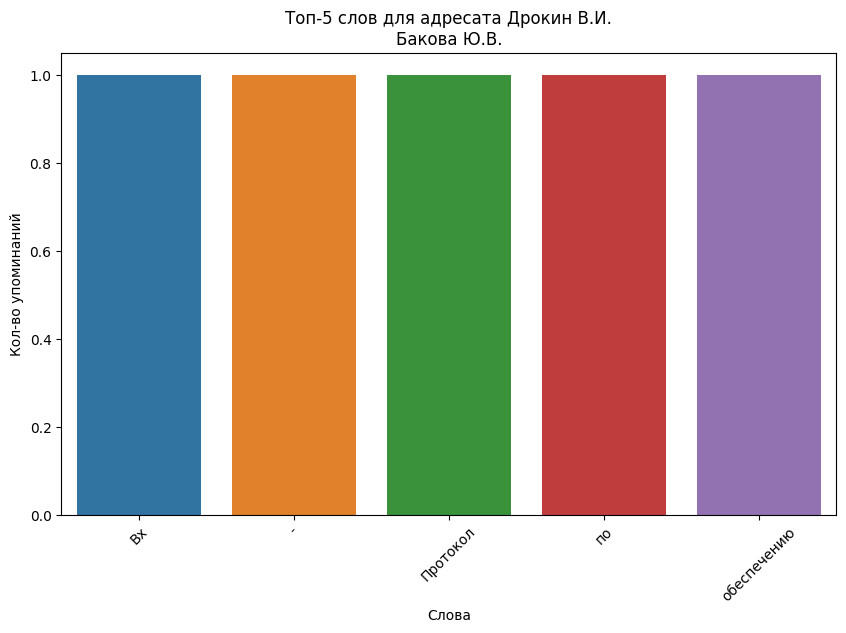

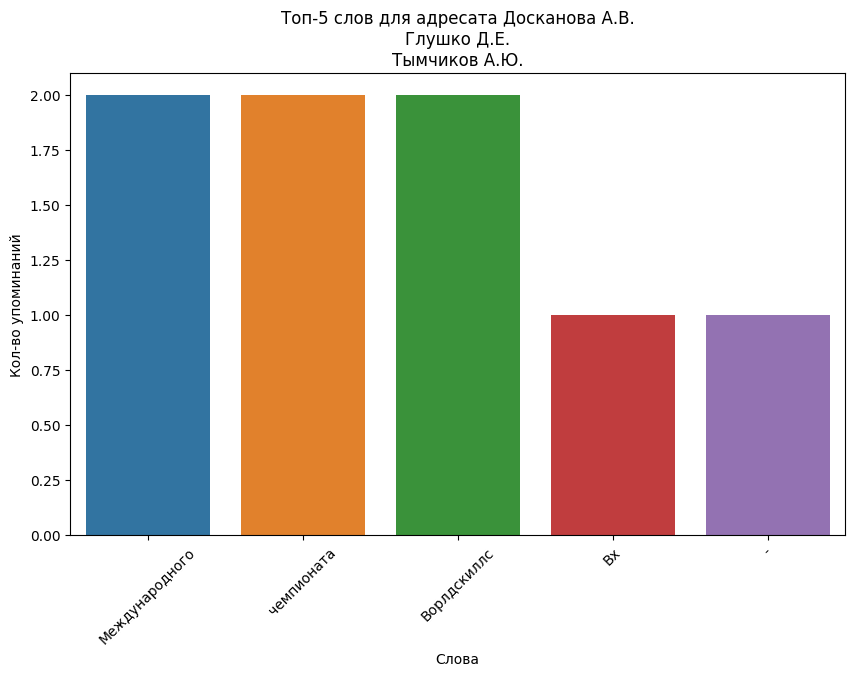

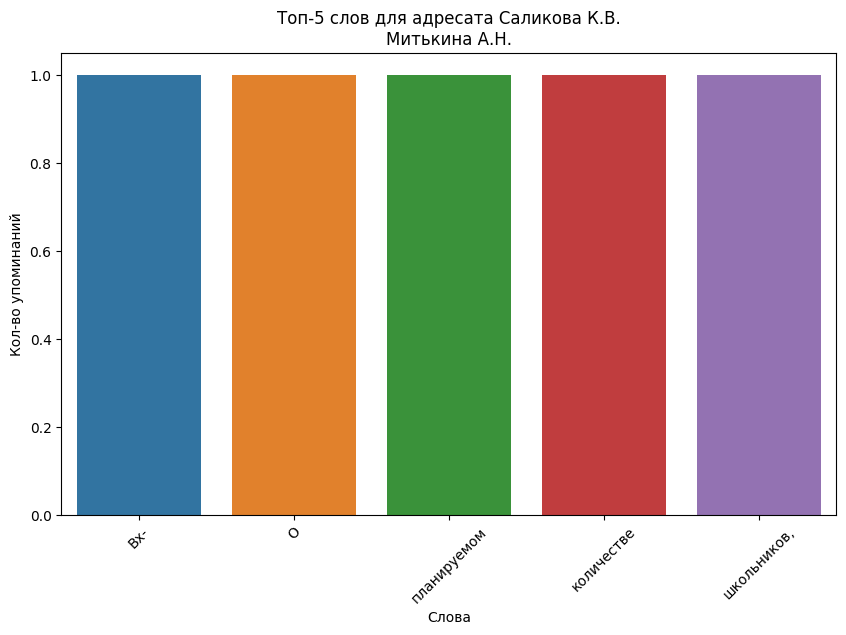

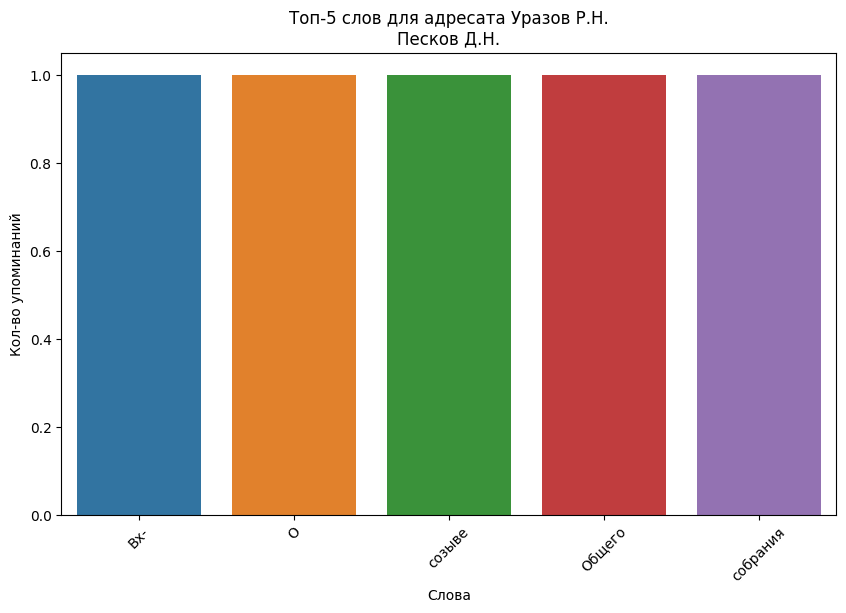

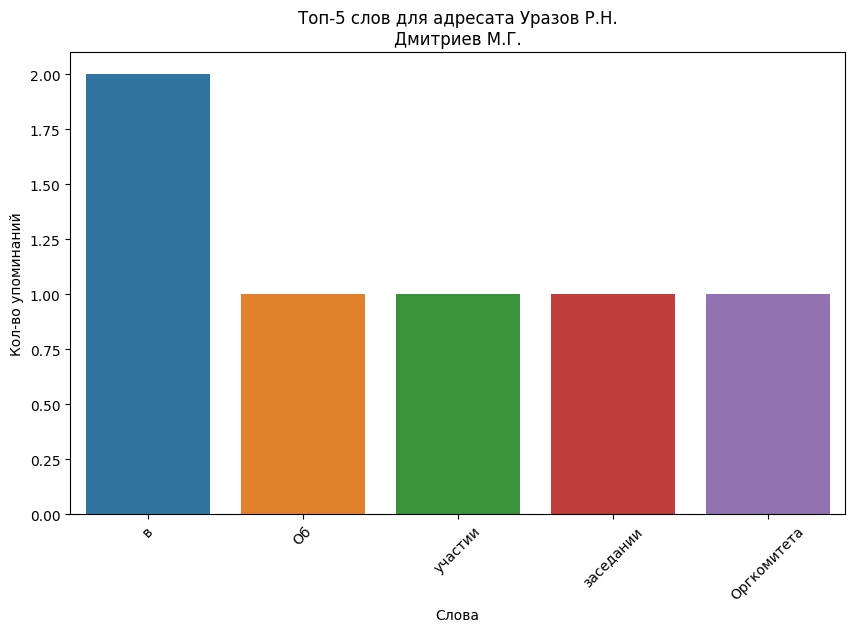

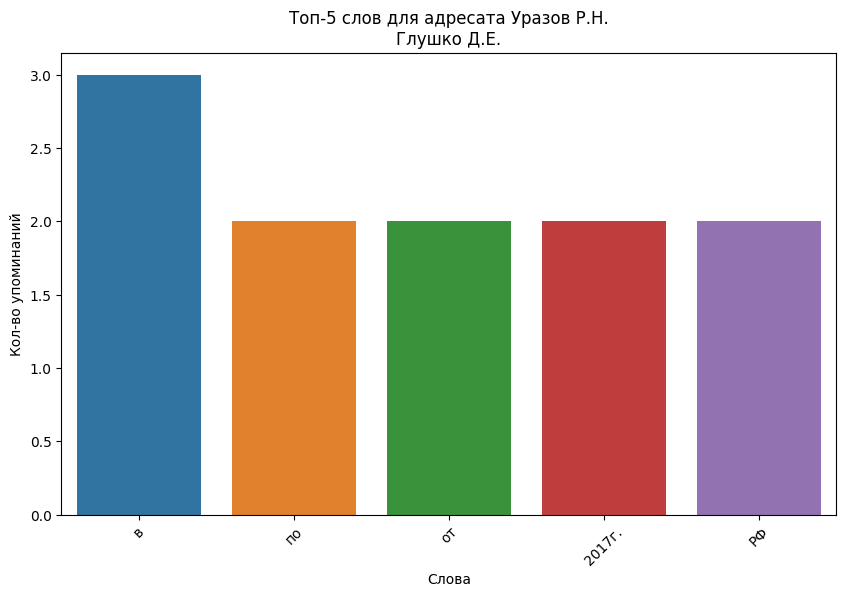

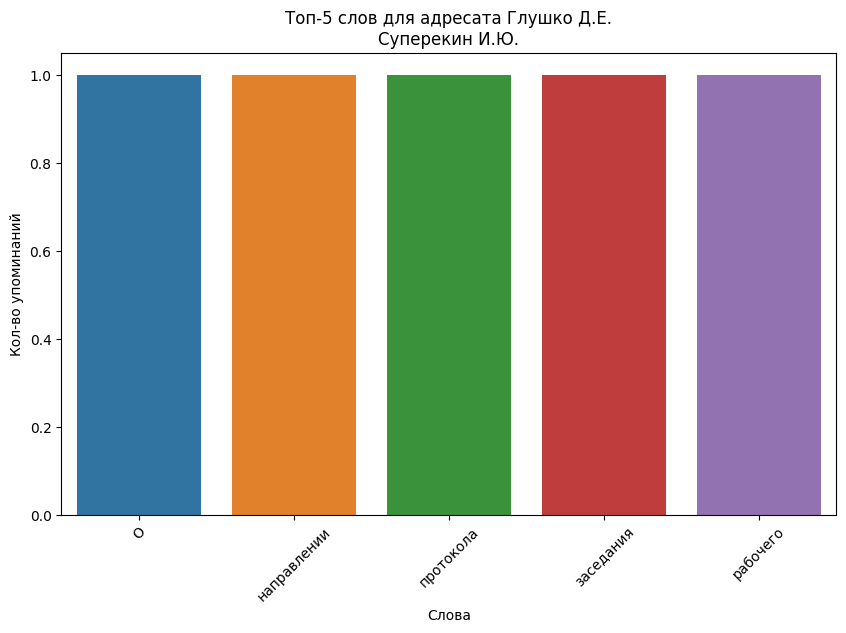

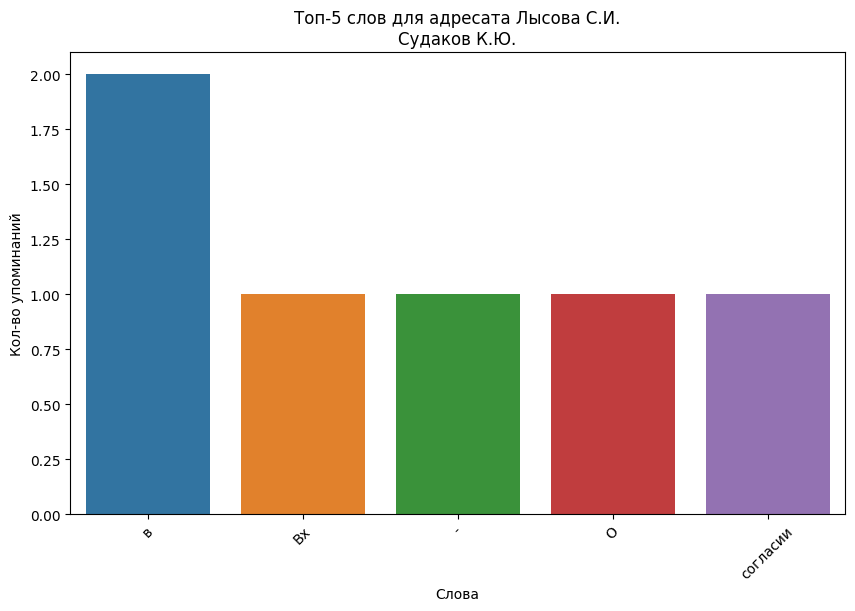

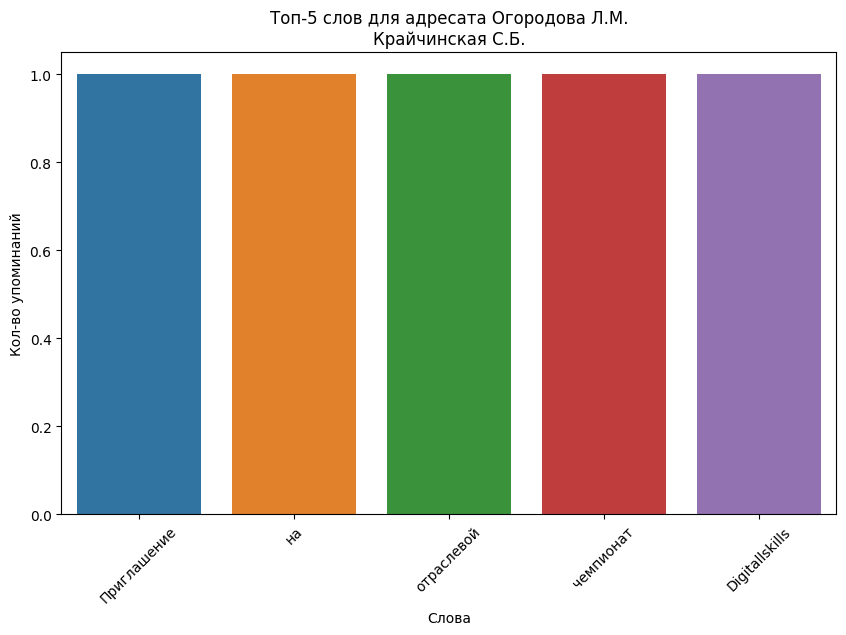

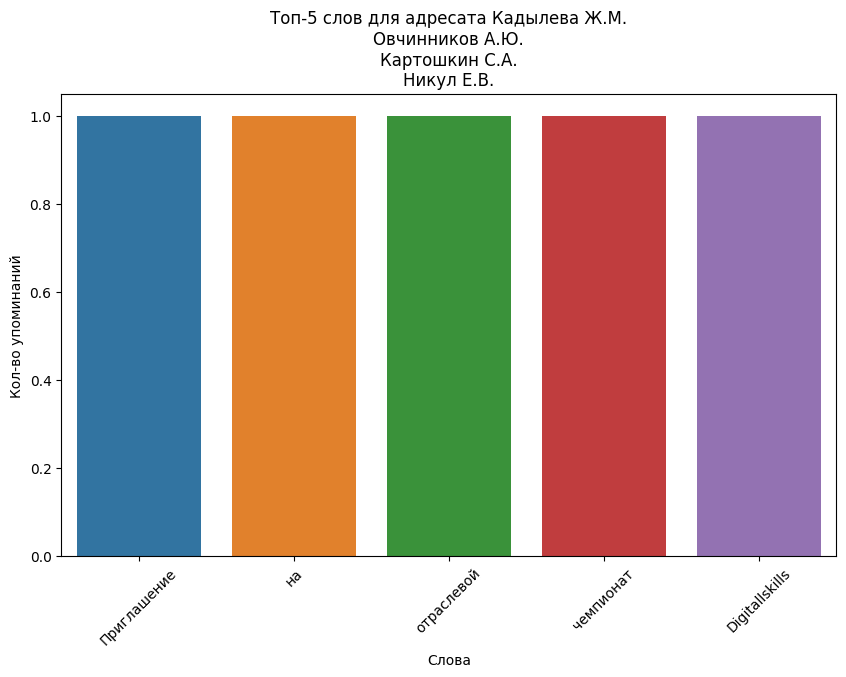

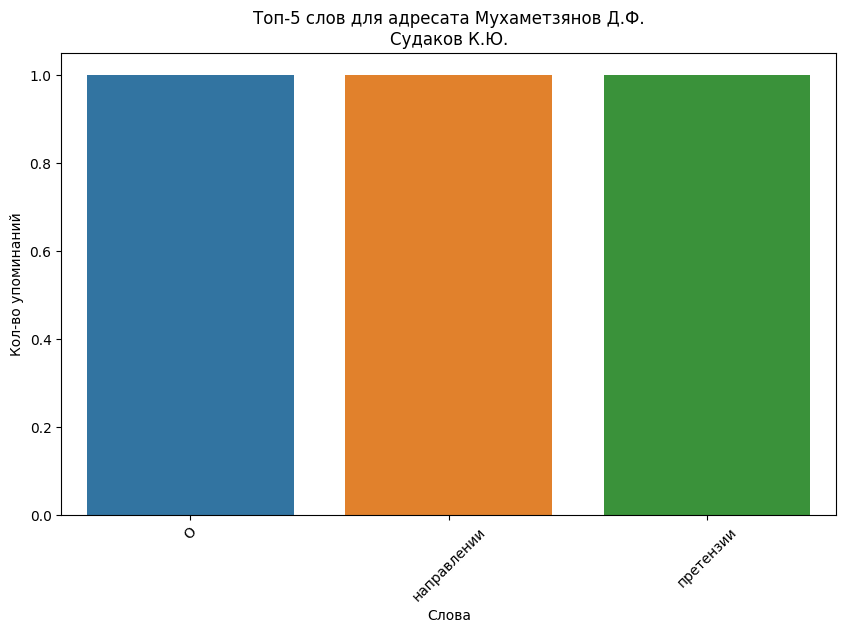

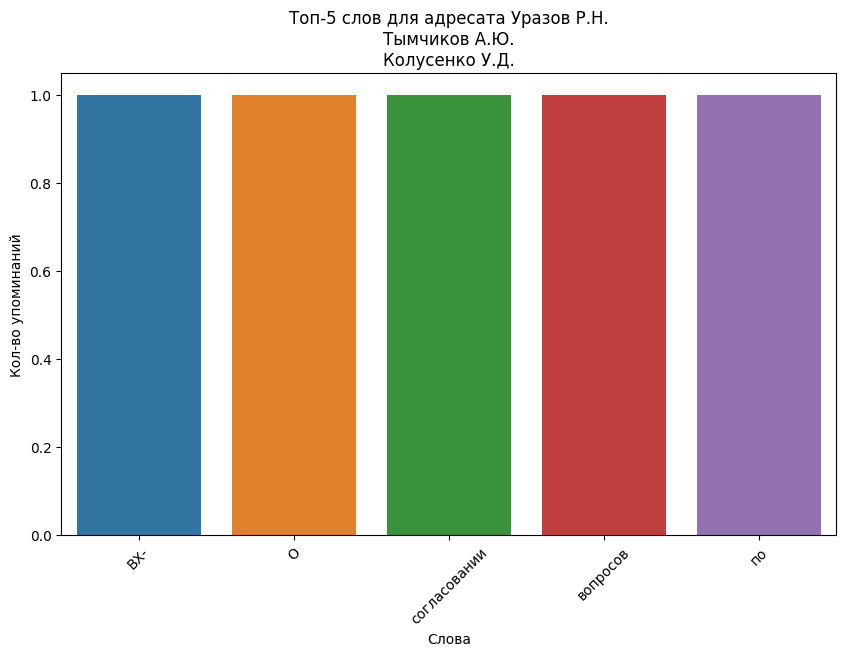

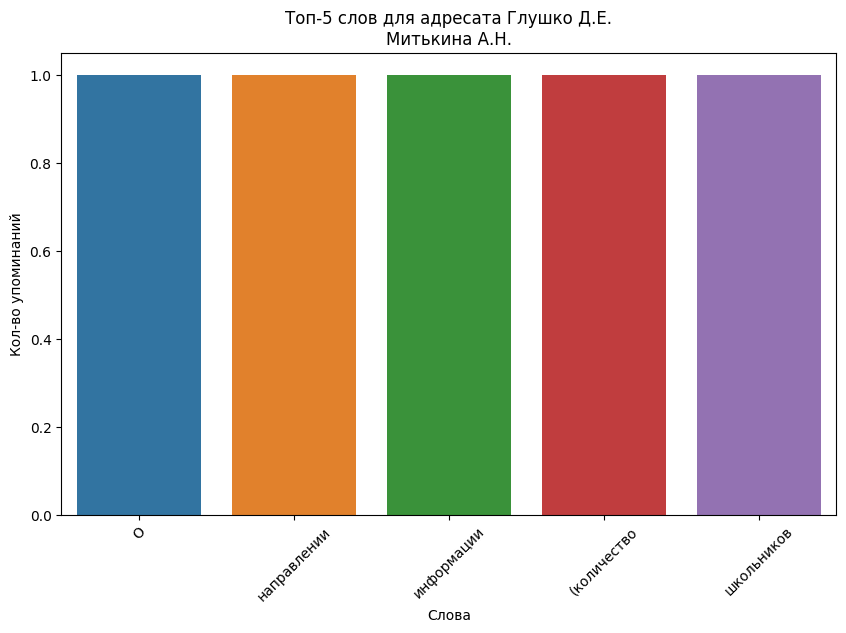

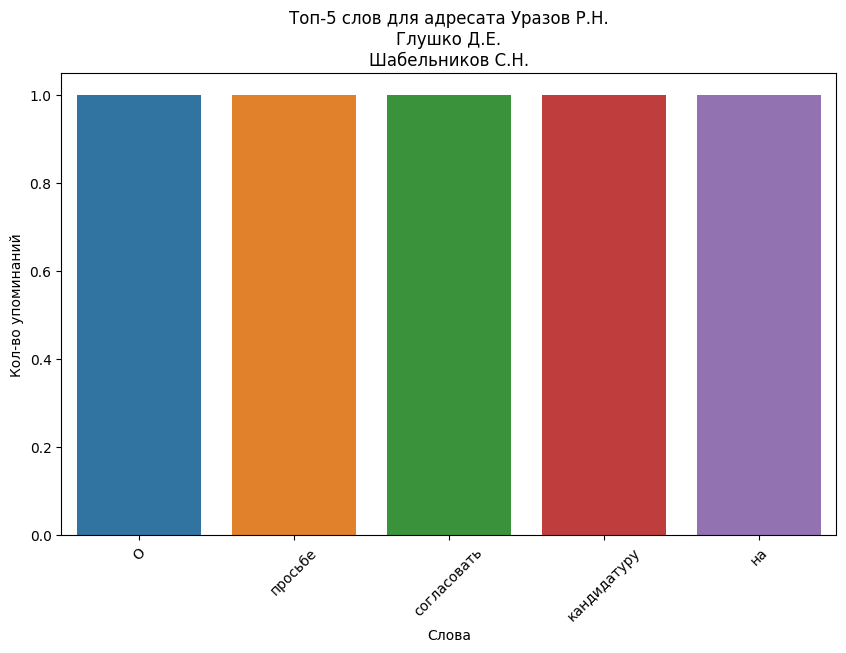

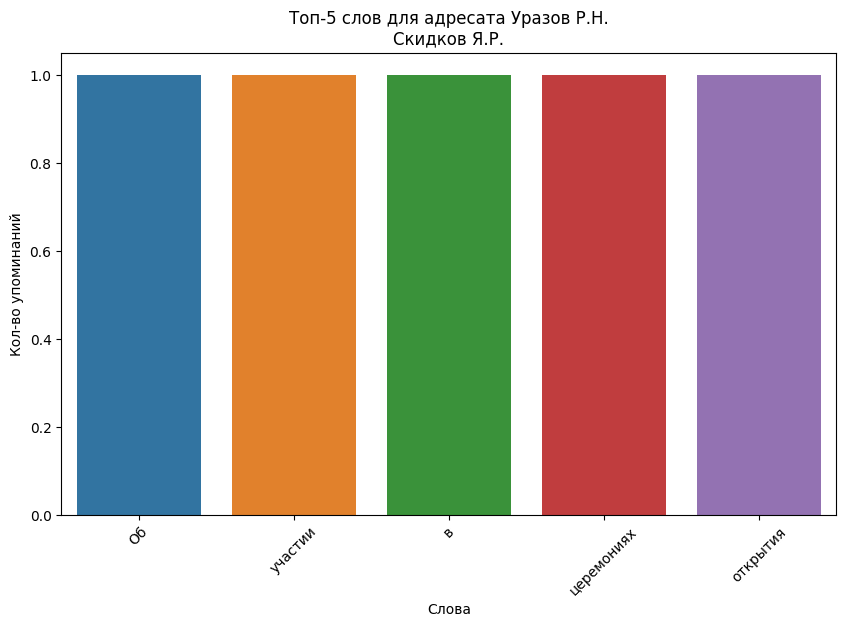

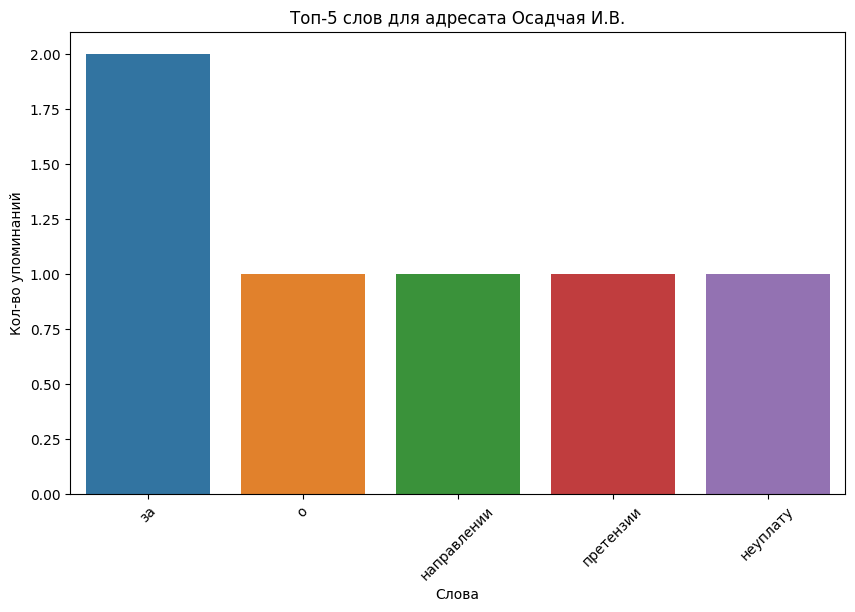

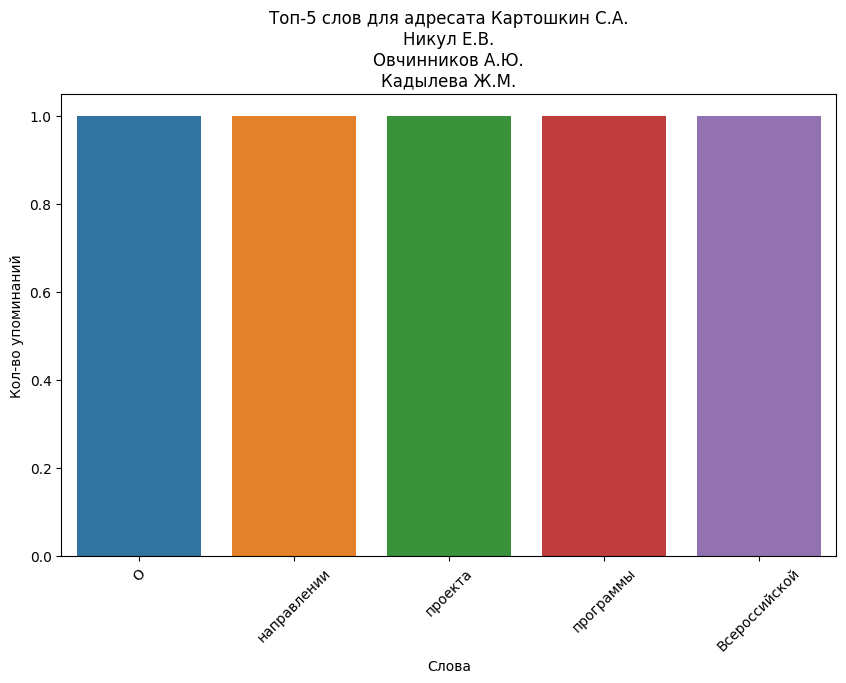

In [12]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

unique_adresses = df['target'].unique()
for item in unique_adresses:
    df_adressat = df[df['target'] == item]
    texts = df_adressat['brif'].tolist()
    concatenated_texts = ' '.join(texts)
    counter = Counter(concatenated_texts.split())  # split() для подсчета слов
    top_5_words = counter.most_common(5)

    top_words, word_counts = zip(*top_5_words)  # разделение слова и их количества

    # countplot для каждого адресата
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(top_words), y=list(word_counts))
    plt.title('Топ-5 слов для адресата ' + item)
    plt.xlabel('Слова')
    plt.ylabel('Кол-во упоминаний')
    plt.xticks(rotation=45)
    plt.show()

Вторая визуализация отображает топ-5 слов для каждого адресата.

**2 ЧАСТЬ**

Для выполнения 2 части задания будем использовать векторизированные данные столбца "Краткое описание". Сначала обработаем текст с помощью CountVectorizer:

In [15]:
import nltk
import re
from sklearn.feature_extraction.text import CountVectorizer
nltk.download("stopwords") #стоп-слова
nltk.download('punkt')
nltk.download('wordnet') #лемматизация

from nltk.corpus import stopwords

data_brif = df['brif']
new_data_brif = []
lemmatize = nltk.WordNetLemmatizer()

for i in data_brif:
    text = re.sub("[^a-zA-Z]"," ",i)
    text = nltk.word_tokenize(text,language = "russian") #токенизируем слова
    text = [lemmatize.lemmatize(word) for word in i] #лемматирзируем слова
    text = "".join(text) #соединяем слова
    new_data_brif.append(text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [16]:
from sklearn.feature_extraction.text import CountVectorizer
brief = CountVectorizer(stop_words="english")
# преобразование текста
matrix = brief.fit_transform(new_data_brif).toarray()

После обработки текста разделим полученные данные на две выборки, тестовую и обучающую, а затем проведем обучение на 3 моделях классификаций.

In [27]:
X=matrix
y = df_copy['target']
from sklearn.model_selection import train_test_split # делим на 2 выборки
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [30]:
from sklearn.linear_model import LogisticRegression #  Модель логистическая регрессия
logreg = LogisticRegression()
result_logreg = logreg.fit(x_train, y_train)
logreg.score(x_test,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.676829268292683

In [45]:
from sklearn.tree import DecisionTreeClassifier # Модель дерево принятия решений
from sklearn.model_selection import train_test_split

tree = DecisionTreeClassifier(max_depth=20)

result_tree = tree.fit(x_train, y_train)
tree.score(x_test,y_test)

0.5408536585365854

In [46]:
from sklearn.ensemble import RandomForestClassifier # Модель случайный лес

clf = RandomForestClassifier(n_estimators=100)
result_clf = clf.fit(x_train, y_train)
clf.score(x_test,y_test)

0.6932926829268292

Сравнив результаты трех моделей (логистическая регрессия, дерево принятий решений, случайный лес), можно сказать, что самый лучший результат у случайного дерева (RandomForestClassifier) с точностью 0.69. Самый худший результат вышел у дерева принятий решений.

Чтобы выполнить пункт 2.3 векторизируем данные способом TfidfVectorizer:

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words="english")# преобразование текста
tfidf_data = tfidf_vectorizer.fit_transform(new_data_brif)

In [52]:
x_another=tfidf_data
y_another = df_copy['target']
from sklearn.model_selection import train_test_split # делим на 2 выборки
x_train_another, x_test_another, y_train_another, y_test_another = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [55]:
from sklearn.linear_model import LogisticRegression #  Модель логистическая регрессия
logreg_2 = LogisticRegression()
result_logreg_2 = logreg_2.fit(x_train_another, y_train_another)
logreg_2.score(x_test_another,y_test_another)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.676829268292683

In [56]:
from sklearn.tree import DecisionTreeClassifier # Модель дерево принятия решений
from sklearn.model_selection import train_test_split

tree_2 = DecisionTreeClassifier(max_depth=20)

result_tree_2 = tree_2.fit(x_train_another, y_train_another)
tree_2.score(x_test_another,y_test_another)

0.5426829268292683

In [53]:
from sklearn.ensemble import RandomForestClassifier # Модель случайный лес

clf_2 = RandomForestClassifier(n_estimators=100)
result_clf_2 = clf_2.fit(x_train_another, y_train_another)
clf_2.score(x_test_another,y_test_another)

0.6853658536585366

Опираясь на вычисления данных, векторизированных TfidfVectorizer, можно сказать, что те же самые модели показали менее точные результаты.

Вывод: Самой лучшей моделью оказалась оказалась модель случайного дерева с точностью 0.69. Данный результат не является хорошим, но в условиях ограниченного времени это самый лучший вариант.

In [75]:
df.to_excel('edit_data.xlsx')